# 1. Import Libraries

In [45]:
import glob
import time
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#pd.set_option('display.max_columns', None)

import cv2

import Utility_functions as ut

#PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torchvision.models import resnet101, ResNet101_Weights

#Skorch
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping, LRScheduler, EpochScoring,ProgressBar, Checkpoint
from skorch.dataset import CVSplit, ValidSplit
from skorch.callbacks import TrainEndCheckpoint
from torch.utils.data import TensorDataset, DataLoader
from skorch.helper import SliceDataset

#model performance
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,top_k_accuracy_score, balanced_accuracy_score, f1_score, recall_score 

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Distnce Matrix
from scipy.spatial import distance_matrix, distance

#Supress warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

data_dir = 'C:/Dissertation/Data/'

In [5]:
%load_ext autoreload
%autoreload 2

# 2. Import Images & embeddings

antelope_10001.jpg , antelope - Image Loaded
antelope_10002.jpg , antelope - Image Loaded
antelope_10003.jpg , antelope - Image Loaded
antelope_10004.jpg , antelope - Image Loaded
antelope_10005.jpg , antelope - Image Loaded
antelope_10006.jpg , antelope - Image Loaded
antelope_10007.jpg , antelope - Image Loaded
antelope_10008.jpg , antelope - Image Loaded
antelope_10009.jpg , antelope - Image Loaded
antelope_10010.jpg , antelope - Image Loaded
antelope_10011.jpg , antelope - Image Loaded
antelope_10012.jpg , antelope - Image Loaded
antelope_10013.jpg , antelope - Image Loaded
antelope_10014.jpg , antelope - Image Loaded
antelope_10015.jpg , antelope - Image Loaded
antelope_10016.jpg , antelope - Image Loaded
antelope_10017.jpg , antelope - Image Loaded
antelope_10018.jpg , antelope - Image Loaded
antelope_10019.jpg , antelope - Image Loaded
antelope_10020.jpg , antelope - Image Loaded
antelope_10021.jpg , antelope - Image Loaded
antelope_10022.jpg , antelope - Image Loaded
antelope_1

antelope_10187.jpg , antelope - Image Loaded
antelope_10188.jpg , antelope - Image Loaded
antelope_10189.jpg , antelope - Image Loaded
antelope_10190.jpg , antelope - Image Loaded
antelope_10191.jpg , antelope - Image Loaded
antelope_10192.jpg , antelope - Image Loaded
antelope_10193.jpg , antelope - Image Loaded
antelope_10194.jpg , antelope - Image Loaded
antelope_10195.jpg , antelope - Image Loaded
antelope_10196.jpg , antelope - Image Loaded
antelope_10197.jpg , antelope - Image Loaded
antelope_10198.jpg , antelope - Image Loaded
antelope_10199.jpg , antelope - Image Loaded
antelope_10200.jpg , antelope - Image Loaded
antelope_10201.jpg , antelope - Image Loaded
antelope_10202.jpg , antelope - Image Loaded
antelope_10203.jpg , antelope - Image Loaded
antelope_10204.jpg , antelope - Image Loaded
antelope_10205.jpg , antelope - Image Loaded
antelope_10206.jpg , antelope - Image Loaded
antelope_10207.jpg , antelope - Image Loaded
antelope_10208.jpg , antelope - Image Loaded
antelope_1

antelope_10380.jpg , antelope - Image Loaded
antelope_10381.jpg , antelope - Image Loaded
antelope_10382.jpg , antelope - Image Loaded
antelope_10383.jpg , antelope - Image Loaded
antelope_10384.jpg , antelope - Image Loaded
antelope_10385.jpg , antelope - Image Loaded
antelope_10386.jpg , antelope - Image Loaded
antelope_10387.jpg , antelope - Image Loaded
antelope_10388.jpg , antelope - Image Loaded
antelope_10389.jpg , antelope - Image Loaded
antelope_10390.jpg , antelope - Image Loaded
antelope_10391.jpg , antelope - Image Loaded
antelope_10392.jpg , antelope - Image Loaded
antelope_10393.jpg , antelope - Image Loaded
antelope_10394.jpg , antelope - Image Loaded
antelope_10395.jpg , antelope - Image Loaded
antelope_10396.jpg , antelope - Image Loaded
antelope_10397.jpg , antelope - Image Loaded
antelope_10398.jpg , antelope - Image Loaded
antelope_10399.jpg , antelope - Image Loaded
antelope_10400.jpg , antelope - Image Loaded
antelope_10401.jpg , antelope - Image Loaded
antelope_1

antelope_10569.jpg , antelope - Image Loaded
antelope_10570.jpg , antelope - Image Loaded
antelope_10571.jpg , antelope - Image Loaded
antelope_10572.jpg , antelope - Image Loaded
antelope_10573.jpg , antelope - Image Loaded
antelope_10574.jpg , antelope - Image Loaded
antelope_10575.jpg , antelope - Image Loaded
antelope_10576.jpg , antelope - Image Loaded
antelope_10577.jpg , antelope - Image Loaded
antelope_10578.jpg , antelope - Image Loaded
antelope_10579.jpg , antelope - Image Loaded
antelope_10580.jpg , antelope - Image Loaded
antelope_10581.jpg , antelope - Image Loaded
antelope_10582.jpg , antelope - Image Loaded
antelope_10583.jpg , antelope - Image Loaded
antelope_10584.jpg , antelope - Image Loaded
antelope_10585.jpg , antelope - Image Loaded
antelope_10586.jpg , antelope - Image Loaded
antelope_10587.jpg , antelope - Image Loaded
antelope_10588.jpg , antelope - Image Loaded
antelope_10589.jpg , antelope - Image Loaded
antelope_10590.jpg , antelope - Image Loaded
antelope_1

antelope_10752.jpg , antelope - Image Loaded
antelope_10753.jpg , antelope - Image Loaded
antelope_10754.jpg , antelope - Image Loaded
antelope_10755.jpg , antelope - Image Loaded
antelope_10756.jpg , antelope - Image Loaded
antelope_10757.jpg , antelope - Image Loaded
antelope_10758.jpg , antelope - Image Loaded
antelope_10759.jpg , antelope - Image Loaded
antelope_10760.jpg , antelope - Image Loaded
antelope_10761.jpg , antelope - Image Loaded
antelope_10762.jpg , antelope - Image Loaded
antelope_10763.jpg , antelope - Image Loaded
antelope_10764.jpg , antelope - Image Loaded
antelope_10765.jpg , antelope - Image Loaded
antelope_10766.jpg , antelope - Image Loaded
antelope_10767.jpg , antelope - Image Loaded
antelope_10768.jpg , antelope - Image Loaded
antelope_10769.jpg , antelope - Image Loaded
antelope_10770.jpg , antelope - Image Loaded
antelope_10771.jpg , antelope - Image Loaded
antelope_10772.jpg , antelope - Image Loaded
antelope_10773.jpg , antelope - Image Loaded
antelope_1

antelope_10950.jpg , antelope - Image Loaded
antelope_10951.jpg , antelope - Image Loaded
antelope_10952.jpg , antelope - Image Loaded
antelope_10953.jpg , antelope - Image Loaded
antelope_10954.jpg , antelope - Image Loaded
antelope_10955.jpg , antelope - Image Loaded
antelope_10956.jpg , antelope - Image Loaded
antelope_10957.jpg , antelope - Image Loaded
antelope_10958.jpg , antelope - Image Loaded
antelope_10959.jpg , antelope - Image Loaded
antelope_10960.jpg , antelope - Image Loaded
antelope_10961.jpg , antelope - Image Loaded
antelope_10962.jpg , antelope - Image Loaded
antelope_10963.jpg , antelope - Image Loaded
antelope_10964.jpg , antelope - Image Loaded
antelope_10965.jpg , antelope - Image Loaded
antelope_10966.jpg , antelope - Image Loaded
antelope_10967.jpg , antelope - Image Loaded
antelope_10968.jpg , antelope - Image Loaded
antelope_10969.jpg , antelope - Image Loaded
antelope_10970.jpg , antelope - Image Loaded
antelope_10971.jpg , antelope - Image Loaded
antelope_1

bat_10124.jpg , bat - Image Loaded
bat_10125.jpg , bat - Image Loaded
bat_10126.jpg , bat - Image Loaded
bat_10127.jpg , bat - Image Loaded
bat_10128.jpg , bat - Image Loaded
bat_10129.jpg , bat - Image Loaded
bat_10130.jpg , bat - Image Loaded
bat_10131.jpg , bat - Image Loaded
bat_10132.jpg , bat - Image Loaded
bat_10133.jpg , bat - Image Loaded
bat_10134.jpg , bat - Image Loaded
bat_10135.jpg , bat - Image Loaded
bat_10136.jpg , bat - Image Loaded
bat_10137.jpg , bat - Image Loaded
bat_10138.jpg , bat - Image Loaded
bat_10139.jpg , bat - Image Loaded
bat_10140.jpg , bat - Image Loaded
bat_10141.jpg , bat - Image Loaded
bat_10142.jpg , bat - Image Loaded
bat_10143.jpg , bat - Image Loaded
bat_10144.jpg , bat - Image Loaded
bat_10145.jpg , bat - Image Loaded
bat_10146.jpg , bat - Image Loaded
bat_10147.jpg , bat - Image Loaded
bat_10148.jpg , bat - Image Loaded
bat_10149.jpg , bat - Image Loaded
bat_10150.jpg , bat - Image Loaded
bat_10151.jpg , bat - Image Loaded
bat_10152.jpg , bat 

bat_10380.jpg , bat - Image Loaded
bat_10381.jpg , bat - Image Loaded
bat_10382.jpg , bat - Image Loaded
bat_10383.jpg , bat - Image Loaded
beaver_10001.jpg , beaver - Image Loaded
beaver_10002.jpg , beaver - Image Loaded
beaver_10003.jpg , beaver - Image Loaded
beaver_10004.jpg , beaver - Image Loaded
beaver_10005.jpg , beaver - Image Loaded
beaver_10006.jpg , beaver - Image Loaded
beaver_10007.jpg , beaver - Image Loaded
beaver_10008.jpg , beaver - Image Loaded
beaver_10009.jpg , beaver - Image Loaded
beaver_10010.jpg , beaver - Image Loaded
beaver_10011.jpg , beaver - Image Loaded
beaver_10012.jpg , beaver - Image Loaded
beaver_10013.jpg , beaver - Image Loaded
beaver_10014.jpg , beaver - Image Loaded
beaver_10015.jpg , beaver - Image Loaded
beaver_10016.jpg , beaver - Image Loaded
beaver_10017.jpg , beaver - Image Loaded
beaver_10018.jpg , beaver - Image Loaded
beaver_10019.jpg , beaver - Image Loaded
beaver_10020.jpg , beaver - Image Loaded
beaver_10021.jpg , beaver - Image Loaded

blue+whale_10016.jpg , blue+whale - Image Loaded
blue+whale_10017.jpg , blue+whale - Image Loaded
blue+whale_10018.jpg , blue+whale - Image Loaded
blue+whale_10019.jpg , blue+whale - Image Loaded
blue+whale_10020.jpg , blue+whale - Image Loaded
blue+whale_10021.jpg , blue+whale - Image Loaded
blue+whale_10022.jpg , blue+whale - Image Loaded
blue+whale_10023.jpg , blue+whale - Image Loaded
blue+whale_10024.jpg , blue+whale - Image Loaded
blue+whale_10025.jpg , blue+whale - Image Loaded
blue+whale_10026.jpg , blue+whale - Image Loaded
blue+whale_10027.jpg , blue+whale - Image Loaded
blue+whale_10028.jpg , blue+whale - Image Loaded
blue+whale_10029.jpg , blue+whale - Image Loaded
blue+whale_10030.jpg , blue+whale - Image Loaded
blue+whale_10031.jpg , blue+whale - Image Loaded
blue+whale_10032.jpg , blue+whale - Image Loaded
blue+whale_10033.jpg , blue+whale - Image Loaded
blue+whale_10034.jpg , blue+whale - Image Loaded
blue+whale_10035.jpg , blue+whale - Image Loaded
blue+whale_10036.jpg

bobcat_10016.jpg , bobcat - Image Loaded
bobcat_10017.jpg , bobcat - Image Loaded
bobcat_10018.jpg , bobcat - Image Loaded
bobcat_10019.jpg , bobcat - Image Loaded
bobcat_10020.jpg , bobcat - Image Loaded
bobcat_10021.jpg , bobcat - Image Loaded
bobcat_10022.jpg , bobcat - Image Loaded
bobcat_10023.jpg , bobcat - Image Loaded
bobcat_10024.jpg , bobcat - Image Loaded
bobcat_10025.jpg , bobcat - Image Loaded
bobcat_10026.jpg , bobcat - Image Loaded
bobcat_10027.jpg , bobcat - Image Loaded
bobcat_10028.jpg , bobcat - Image Loaded
bobcat_10029.jpg , bobcat - Image Loaded
bobcat_10030.jpg , bobcat - Image Loaded
bobcat_10031.jpg , bobcat - Image Loaded
bobcat_10032.jpg , bobcat - Image Loaded
bobcat_10033.jpg , bobcat - Image Loaded
bobcat_10034.jpg , bobcat - Image Loaded
bobcat_10035.jpg , bobcat - Image Loaded
bobcat_10036.jpg , bobcat - Image Loaded
bobcat_10037.jpg , bobcat - Image Loaded
bobcat_10038.jpg , bobcat - Image Loaded
bobcat_10039.jpg , bobcat - Image Loaded
bobcat_10040.jpg

bobcat_10228.jpg , bobcat - Image Loaded
bobcat_10229.jpg , bobcat - Image Loaded
bobcat_10230.jpg , bobcat - Image Loaded
bobcat_10231.jpg , bobcat - Image Loaded
bobcat_10232.jpg , bobcat - Image Loaded
bobcat_10233.jpg , bobcat - Image Loaded
bobcat_10234.jpg , bobcat - Image Loaded
bobcat_10235.jpg , bobcat - Image Loaded
bobcat_10236.jpg , bobcat - Image Loaded
bobcat_10237.jpg , bobcat - Image Loaded
bobcat_10238.jpg , bobcat - Image Loaded
bobcat_10239.jpg , bobcat - Image Loaded
bobcat_10240.jpg , bobcat - Image Loaded
bobcat_10241.jpg , bobcat - Image Loaded
bobcat_10242.jpg , bobcat - Image Loaded
bobcat_10243.jpg , bobcat - Image Loaded
bobcat_10244.jpg , bobcat - Image Loaded
bobcat_10245.jpg , bobcat - Image Loaded
bobcat_10246.jpg , bobcat - Image Loaded
bobcat_10247.jpg , bobcat - Image Loaded
bobcat_10248.jpg , bobcat - Image Loaded
bobcat_10249.jpg , bobcat - Image Loaded
bobcat_10250.jpg , bobcat - Image Loaded
bobcat_10251.jpg , bobcat - Image Loaded
bobcat_10252.jpg

bobcat_10430.jpg , bobcat - Image Loaded
bobcat_10431.jpg , bobcat - Image Loaded
bobcat_10432.jpg , bobcat - Image Loaded
bobcat_10433.jpg , bobcat - Image Loaded
bobcat_10434.jpg , bobcat - Image Loaded
bobcat_10435.jpg , bobcat - Image Loaded
bobcat_10436.jpg , bobcat - Image Loaded
bobcat_10437.jpg , bobcat - Image Loaded
bobcat_10438.jpg , bobcat - Image Loaded
bobcat_10439.jpg , bobcat - Image Loaded
bobcat_10440.jpg , bobcat - Image Loaded
bobcat_10441.jpg , bobcat - Image Loaded
bobcat_10442.jpg , bobcat - Image Loaded
bobcat_10443.jpg , bobcat - Image Loaded
bobcat_10444.jpg , bobcat - Image Loaded
bobcat_10445.jpg , bobcat - Image Loaded
bobcat_10446.jpg , bobcat - Image Loaded
bobcat_10447.jpg , bobcat - Image Loaded
bobcat_10448.jpg , bobcat - Image Loaded
bobcat_10449.jpg , bobcat - Image Loaded
bobcat_10450.jpg , bobcat - Image Loaded
bobcat_10451.jpg , bobcat - Image Loaded
bobcat_10452.jpg , bobcat - Image Loaded
bobcat_10453.jpg , bobcat - Image Loaded
bobcat_10454.jpg

buffalo_10003.jpg , buffalo - Image Loaded
buffalo_10004.jpg , buffalo - Image Loaded
buffalo_10005.jpg , buffalo - Image Loaded
buffalo_10006.jpg , buffalo - Image Loaded
buffalo_10007.jpg , buffalo - Image Loaded
buffalo_10008.jpg , buffalo - Image Loaded
buffalo_10009.jpg , buffalo - Image Loaded
buffalo_10010.jpg , buffalo - Image Loaded
buffalo_10011.jpg , buffalo - Image Loaded
buffalo_10012.jpg , buffalo - Image Loaded
buffalo_10013.jpg , buffalo - Image Loaded
buffalo_10014.jpg , buffalo - Image Loaded
buffalo_10015.jpg , buffalo - Image Loaded
buffalo_10016.jpg , buffalo - Image Loaded
buffalo_10017.jpg , buffalo - Image Loaded
buffalo_10018.jpg , buffalo - Image Loaded
buffalo_10019.jpg , buffalo - Image Loaded
buffalo_10020.jpg , buffalo - Image Loaded
buffalo_10021.jpg , buffalo - Image Loaded
buffalo_10022.jpg , buffalo - Image Loaded
buffalo_10023.jpg , buffalo - Image Loaded
buffalo_10024.jpg , buffalo - Image Loaded
buffalo_10025.jpg , buffalo - Image Loaded
buffalo_100

buffalo_10194.jpg , buffalo - Image Loaded
buffalo_10195.jpg , buffalo - Image Loaded
buffalo_10196.jpg , buffalo - Image Loaded
buffalo_10197.jpg , buffalo - Image Loaded
buffalo_10198.jpg , buffalo - Image Loaded
buffalo_10199.jpg , buffalo - Image Loaded
buffalo_10200.jpg , buffalo - Image Loaded
buffalo_10201.jpg , buffalo - Image Loaded
buffalo_10202.jpg , buffalo - Image Loaded
buffalo_10203.jpg , buffalo - Image Loaded
buffalo_10204.jpg , buffalo - Image Loaded
buffalo_10205.jpg , buffalo - Image Loaded
buffalo_10206.jpg , buffalo - Image Loaded
buffalo_10207.jpg , buffalo - Image Loaded
buffalo_10208.jpg , buffalo - Image Loaded
buffalo_10209.jpg , buffalo - Image Loaded
buffalo_10210.jpg , buffalo - Image Loaded
buffalo_10211.jpg , buffalo - Image Loaded
buffalo_10212.jpg , buffalo - Image Loaded
buffalo_10213.jpg , buffalo - Image Loaded
buffalo_10214.jpg , buffalo - Image Loaded
buffalo_10215.jpg , buffalo - Image Loaded
buffalo_10216.jpg , buffalo - Image Loaded
buffalo_102

buffalo_10387.jpg , buffalo - Image Loaded
buffalo_10388.jpg , buffalo - Image Loaded
buffalo_10389.jpg , buffalo - Image Loaded
buffalo_10390.jpg , buffalo - Image Loaded
buffalo_10391.jpg , buffalo - Image Loaded
buffalo_10392.jpg , buffalo - Image Loaded
buffalo_10393.jpg , buffalo - Image Loaded
buffalo_10394.jpg , buffalo - Image Loaded
buffalo_10395.jpg , buffalo - Image Loaded
buffalo_10396.jpg , buffalo - Image Loaded
buffalo_10397.jpg , buffalo - Image Loaded
buffalo_10398.jpg , buffalo - Image Loaded
buffalo_10399.jpg , buffalo - Image Loaded
buffalo_10400.jpg , buffalo - Image Loaded
buffalo_10401.jpg , buffalo - Image Loaded
buffalo_10402.jpg , buffalo - Image Loaded
buffalo_10403.jpg , buffalo - Image Loaded
buffalo_10404.jpg , buffalo - Image Loaded
buffalo_10405.jpg , buffalo - Image Loaded
buffalo_10406.jpg , buffalo - Image Loaded
buffalo_10407.jpg , buffalo - Image Loaded
buffalo_10408.jpg , buffalo - Image Loaded
buffalo_10409.jpg , buffalo - Image Loaded
buffalo_104

buffalo_10581.jpg , buffalo - Image Loaded
buffalo_10582.jpg , buffalo - Image Loaded
buffalo_10583.jpg , buffalo - Image Loaded
buffalo_10584.jpg , buffalo - Image Loaded
buffalo_10585.jpg , buffalo - Image Loaded
buffalo_10586.jpg , buffalo - Image Loaded
buffalo_10587.jpg , buffalo - Image Loaded
buffalo_10588.jpg , buffalo - Image Loaded
buffalo_10589.jpg , buffalo - Image Loaded
buffalo_10590.jpg , buffalo - Image Loaded
buffalo_10591.jpg , buffalo - Image Loaded
buffalo_10592.jpg , buffalo - Image Loaded
buffalo_10593.jpg , buffalo - Image Loaded
buffalo_10594.jpg , buffalo - Image Loaded
buffalo_10595.jpg , buffalo - Image Loaded
buffalo_10596.jpg , buffalo - Image Loaded
buffalo_10597.jpg , buffalo - Image Loaded
buffalo_10598.jpg , buffalo - Image Loaded
buffalo_10599.jpg , buffalo - Image Loaded
buffalo_10600.jpg , buffalo - Image Loaded
buffalo_10601.jpg , buffalo - Image Loaded
buffalo_10602.jpg , buffalo - Image Loaded
buffalo_10603.jpg , buffalo - Image Loaded
buffalo_106

buffalo_10787.jpg , buffalo - Image Loaded
buffalo_10788.jpg , buffalo - Image Loaded
buffalo_10789.jpg , buffalo - Image Loaded
buffalo_10790.jpg , buffalo - Image Loaded
buffalo_10791.jpg , buffalo - Image Loaded
buffalo_10792.jpg , buffalo - Image Loaded
buffalo_10793.jpg , buffalo - Image Loaded
buffalo_10794.jpg , buffalo - Image Loaded
buffalo_10795.jpg , buffalo - Image Loaded
buffalo_10796.jpg , buffalo - Image Loaded
buffalo_10797.jpg , buffalo - Image Loaded
buffalo_10798.jpg , buffalo - Image Loaded
buffalo_10799.jpg , buffalo - Image Loaded
buffalo_10800.jpg , buffalo - Image Loaded
buffalo_10801.jpg , buffalo - Image Loaded
buffalo_10802.jpg , buffalo - Image Loaded
buffalo_10803.jpg , buffalo - Image Loaded
buffalo_10804.jpg , buffalo - Image Loaded
buffalo_10805.jpg , buffalo - Image Loaded
buffalo_10806.jpg , buffalo - Image Loaded
buffalo_10807.jpg , buffalo - Image Loaded
buffalo_10808.jpg , buffalo - Image Loaded
buffalo_10809.jpg , buffalo - Image Loaded
buffalo_108

chihuahua_10086.jpg , chihuahua - Image Loaded
chihuahua_10087.jpg , chihuahua - Image Loaded
chihuahua_10088.jpg , chihuahua - Image Loaded
chihuahua_10089.jpg , chihuahua - Image Loaded
chihuahua_10090.jpg , chihuahua - Image Loaded
chihuahua_10091.jpg , chihuahua - Image Loaded
chihuahua_10092.jpg , chihuahua - Image Loaded
chihuahua_10093.jpg , chihuahua - Image Loaded
chihuahua_10094.jpg , chihuahua - Image Loaded
chihuahua_10095.jpg , chihuahua - Image Loaded
chihuahua_10096.jpg , chihuahua - Image Loaded
chihuahua_10097.jpg , chihuahua - Image Loaded
chihuahua_10098.jpg , chihuahua - Image Loaded
chihuahua_10099.jpg , chihuahua - Image Loaded
chihuahua_10100.jpg , chihuahua - Image Loaded
chihuahua_10101.jpg , chihuahua - Image Loaded
chihuahua_10102.jpg , chihuahua - Image Loaded
chihuahua_10103.jpg , chihuahua - Image Loaded
chihuahua_10104.jpg , chihuahua - Image Loaded
chihuahua_10105.jpg , chihuahua - Image Loaded
chihuahua_10106.jpg , chihuahua - Image Loaded
chihuahua_101

chihuahua_10266.jpg , chihuahua - Image Loaded
chihuahua_10267.jpg , chihuahua - Image Loaded
chihuahua_10268.jpg , chihuahua - Image Loaded
chihuahua_10269.jpg , chihuahua - Image Loaded
chihuahua_10270.jpg , chihuahua - Image Loaded
chihuahua_10271.jpg , chihuahua - Image Loaded
chihuahua_10272.jpg , chihuahua - Image Loaded
chihuahua_10273.jpg , chihuahua - Image Loaded
chihuahua_10274.jpg , chihuahua - Image Loaded
chihuahua_10275.jpg , chihuahua - Image Loaded
chihuahua_10276.jpg , chihuahua - Image Loaded
chihuahua_10277.jpg , chihuahua - Image Loaded
chihuahua_10278.jpg , chihuahua - Image Loaded
chihuahua_10279.jpg , chihuahua - Image Loaded
chihuahua_10280.jpg , chihuahua - Image Loaded
chihuahua_10281.jpg , chihuahua - Image Loaded
chihuahua_10282.jpg , chihuahua - Image Loaded
chihuahua_10283.jpg , chihuahua - Image Loaded
chihuahua_10284.jpg , chihuahua - Image Loaded
chihuahua_10285.jpg , chihuahua - Image Loaded
chihuahua_10286.jpg , chihuahua - Image Loaded
chihuahua_102

chihuahua_10454.jpg , chihuahua - Image Loaded
chihuahua_10455.jpg , chihuahua - Image Loaded
chihuahua_10456.jpg , chihuahua - Image Loaded
chihuahua_10457.jpg , chihuahua - Image Loaded
chihuahua_10458.jpg , chihuahua - Image Loaded
chihuahua_10459.jpg , chihuahua - Image Loaded
chihuahua_10460.jpg , chihuahua - Image Loaded
chihuahua_10461.jpg , chihuahua - Image Loaded
chihuahua_10462.jpg , chihuahua - Image Loaded
chihuahua_10463.jpg , chihuahua - Image Loaded
chihuahua_10464.jpg , chihuahua - Image Loaded
chihuahua_10465.jpg , chihuahua - Image Loaded
chihuahua_10466.jpg , chihuahua - Image Loaded
chihuahua_10467.jpg , chihuahua - Image Loaded
chihuahua_10468.jpg , chihuahua - Image Loaded
chihuahua_10469.jpg , chihuahua - Image Loaded
chihuahua_10470.jpg , chihuahua - Image Loaded
chihuahua_10471.jpg , chihuahua - Image Loaded
chihuahua_10472.jpg , chihuahua - Image Loaded
chihuahua_10473.jpg , chihuahua - Image Loaded
chihuahua_10474.jpg , chihuahua - Image Loaded
chihuahua_104

chimpanzee_10073.jpg , chimpanzee - Image Loaded
chimpanzee_10074.jpg , chimpanzee - Image Loaded
chimpanzee_10075.jpg , chimpanzee - Image Loaded
chimpanzee_10076.jpg , chimpanzee - Image Loaded
chimpanzee_10077.jpg , chimpanzee - Image Loaded
chimpanzee_10078.jpg , chimpanzee - Image Loaded
chimpanzee_10079.jpg , chimpanzee - Image Loaded
chimpanzee_10080.jpg , chimpanzee - Image Loaded
chimpanzee_10081.jpg , chimpanzee - Image Loaded
chimpanzee_10082.jpg , chimpanzee - Image Loaded
chimpanzee_10083.jpg , chimpanzee - Image Loaded
chimpanzee_10084.jpg , chimpanzee - Image Loaded
chimpanzee_10085.jpg , chimpanzee - Image Loaded
chimpanzee_10086.jpg , chimpanzee - Image Loaded
chimpanzee_10087.jpg , chimpanzee - Image Loaded
chimpanzee_10088.jpg , chimpanzee - Image Loaded
chimpanzee_10089.jpg , chimpanzee - Image Loaded
chimpanzee_10090.jpg , chimpanzee - Image Loaded
chimpanzee_10091.jpg , chimpanzee - Image Loaded
chimpanzee_10092.jpg , chimpanzee - Image Loaded
chimpanzee_10093.jpg

chimpanzee_10253.jpg , chimpanzee - Image Loaded
chimpanzee_10254.jpg , chimpanzee - Image Loaded
chimpanzee_10255.jpg , chimpanzee - Image Loaded
chimpanzee_10256.jpg , chimpanzee - Image Loaded
chimpanzee_10257.jpg , chimpanzee - Image Loaded
chimpanzee_10258.jpg , chimpanzee - Image Loaded
chimpanzee_10259.jpg , chimpanzee - Image Loaded
chimpanzee_10260.jpg , chimpanzee - Image Loaded
chimpanzee_10261.jpg , chimpanzee - Image Loaded
chimpanzee_10262.jpg , chimpanzee - Image Loaded
chimpanzee_10263.jpg , chimpanzee - Image Loaded
chimpanzee_10264.jpg , chimpanzee - Image Loaded
chimpanzee_10265.jpg , chimpanzee - Image Loaded
chimpanzee_10266.jpg , chimpanzee - Image Loaded
chimpanzee_10267.jpg , chimpanzee - Image Loaded
chimpanzee_10268.jpg , chimpanzee - Image Loaded
chimpanzee_10269.jpg , chimpanzee - Image Loaded
chimpanzee_10270.jpg , chimpanzee - Image Loaded
chimpanzee_10271.jpg , chimpanzee - Image Loaded
chimpanzee_10272.jpg , chimpanzee - Image Loaded
chimpanzee_10273.jpg

chimpanzee_10441.jpg , chimpanzee - Image Loaded
chimpanzee_10442.jpg , chimpanzee - Image Loaded
chimpanzee_10443.jpg , chimpanzee - Image Loaded
chimpanzee_10444.jpg , chimpanzee - Image Loaded
chimpanzee_10445.jpg , chimpanzee - Image Loaded
chimpanzee_10446.jpg , chimpanzee - Image Loaded
chimpanzee_10447.jpg , chimpanzee - Image Loaded
chimpanzee_10448.jpg , chimpanzee - Image Loaded
chimpanzee_10449.jpg , chimpanzee - Image Loaded
chimpanzee_10450.jpg , chimpanzee - Image Loaded
chimpanzee_10451.jpg , chimpanzee - Image Loaded
chimpanzee_10452.jpg , chimpanzee - Image Loaded
chimpanzee_10453.jpg , chimpanzee - Image Loaded
chimpanzee_10454.jpg , chimpanzee - Image Loaded
chimpanzee_10455.jpg , chimpanzee - Image Loaded
chimpanzee_10456.jpg , chimpanzee - Image Loaded
chimpanzee_10457.jpg , chimpanzee - Image Loaded
chimpanzee_10458.jpg , chimpanzee - Image Loaded
chimpanzee_10459.jpg , chimpanzee - Image Loaded
chimpanzee_10460.jpg , chimpanzee - Image Loaded
chimpanzee_10461.jpg

chimpanzee_10615.jpg , chimpanzee - Image Loaded
chimpanzee_10616.jpg , chimpanzee - Image Loaded
chimpanzee_10617.jpg , chimpanzee - Image Loaded
chimpanzee_10618.jpg , chimpanzee - Image Loaded
chimpanzee_10619.jpg , chimpanzee - Image Loaded
chimpanzee_10620.jpg , chimpanzee - Image Loaded
chimpanzee_10621.jpg , chimpanzee - Image Loaded
chimpanzee_10622.jpg , chimpanzee - Image Loaded
chimpanzee_10623.jpg , chimpanzee - Image Loaded
chimpanzee_10624.jpg , chimpanzee - Image Loaded
chimpanzee_10625.jpg , chimpanzee - Image Loaded
chimpanzee_10626.jpg , chimpanzee - Image Loaded
chimpanzee_10627.jpg , chimpanzee - Image Loaded
chimpanzee_10628.jpg , chimpanzee - Image Loaded
chimpanzee_10629.jpg , chimpanzee - Image Loaded
chimpanzee_10630.jpg , chimpanzee - Image Loaded
chimpanzee_10631.jpg , chimpanzee - Image Loaded
chimpanzee_10632.jpg , chimpanzee - Image Loaded
chimpanzee_10633.jpg , chimpanzee - Image Loaded
chimpanzee_10634.jpg , chimpanzee - Image Loaded
chimpanzee_10635.jpg

collie_10067.jpg , collie - Image Loaded
collie_10068.jpg , collie - Image Loaded
collie_10069.jpg , collie - Image Loaded
collie_10070.jpg , collie - Image Loaded
collie_10071.jpg , collie - Image Loaded
collie_10072.jpg , collie - Image Loaded
collie_10073.jpg , collie - Image Loaded
collie_10074.jpg , collie - Image Loaded
collie_10075.jpg , collie - Image Loaded
collie_10076.jpg , collie - Image Loaded
collie_10077.jpg , collie - Image Loaded
collie_10078.jpg , collie - Image Loaded
collie_10079.jpg , collie - Image Loaded
collie_10080.jpg , collie - Image Loaded
collie_10081.jpg , collie - Image Loaded
collie_10082.jpg , collie - Image Loaded
collie_10083.jpg , collie - Image Loaded
collie_10084.jpg , collie - Image Loaded
collie_10085.jpg , collie - Image Loaded
collie_10086.jpg , collie - Image Loaded
collie_10087.jpg , collie - Image Loaded
collie_10088.jpg , collie - Image Loaded
collie_10089.jpg , collie - Image Loaded
collie_10090.jpg , collie - Image Loaded
collie_10091.jpg

collie_10282.jpg , collie - Image Loaded
collie_10283.jpg , collie - Image Loaded
collie_10284.jpg , collie - Image Loaded
collie_10285.jpg , collie - Image Loaded
collie_10286.jpg , collie - Image Loaded
collie_10287.jpg , collie - Image Loaded
collie_10288.jpg , collie - Image Loaded
collie_10289.jpg , collie - Image Loaded
collie_10290.jpg , collie - Image Loaded
collie_10291.jpg , collie - Image Loaded
collie_10292.jpg , collie - Image Loaded
collie_10293.jpg , collie - Image Loaded
collie_10294.jpg , collie - Image Loaded
collie_10295.jpg , collie - Image Loaded
collie_10296.jpg , collie - Image Loaded
collie_10297.jpg , collie - Image Loaded
collie_10298.jpg , collie - Image Loaded
collie_10299.jpg , collie - Image Loaded
collie_10300.jpg , collie - Image Loaded
collie_10301.jpg , collie - Image Loaded
collie_10302.jpg , collie - Image Loaded
collie_10303.jpg , collie - Image Loaded
collie_10304.jpg , collie - Image Loaded
collie_10305.jpg , collie - Image Loaded
collie_10306.jpg

collie_10482.jpg , collie - Image Loaded
collie_10483.jpg , collie - Image Loaded
collie_10484.jpg , collie - Image Loaded
collie_10485.jpg , collie - Image Loaded
collie_10486.jpg , collie - Image Loaded
collie_10487.jpg , collie - Image Loaded
collie_10488.jpg , collie - Image Loaded
collie_10489.jpg , collie - Image Loaded
collie_10490.jpg , collie - Image Loaded
collie_10491.jpg , collie - Image Loaded
collie_10492.jpg , collie - Image Loaded
collie_10493.jpg , collie - Image Loaded
collie_10494.jpg , collie - Image Loaded
collie_10495.jpg , collie - Image Loaded
collie_10496.jpg , collie - Image Loaded
collie_10497.jpg , collie - Image Loaded
collie_10498.jpg , collie - Image Loaded
collie_10499.jpg , collie - Image Loaded
collie_10500.jpg , collie - Image Loaded
collie_10501.jpg , collie - Image Loaded
collie_10502.jpg , collie - Image Loaded
collie_10503.jpg , collie - Image Loaded
collie_10504.jpg , collie - Image Loaded
collie_10505.jpg , collie - Image Loaded
collie_10506.jpg

collie_10694.jpg , collie - Image Loaded
collie_10695.jpg , collie - Image Loaded
collie_10696.jpg , collie - Image Loaded
collie_10697.jpg , collie - Image Loaded
collie_10698.jpg , collie - Image Loaded
collie_10699.jpg , collie - Image Loaded
collie_10700.jpg , collie - Image Loaded
collie_10701.jpg , collie - Image Loaded
collie_10702.jpg , collie - Image Loaded
collie_10703.jpg , collie - Image Loaded
collie_10704.jpg , collie - Image Loaded
collie_10705.jpg , collie - Image Loaded
collie_10706.jpg , collie - Image Loaded
collie_10707.jpg , collie - Image Loaded
collie_10708.jpg , collie - Image Loaded
collie_10709.jpg , collie - Image Loaded
collie_10710.jpg , collie - Image Loaded
collie_10711.jpg , collie - Image Loaded
collie_10712.jpg , collie - Image Loaded
collie_10713.jpg , collie - Image Loaded
collie_10714.jpg , collie - Image Loaded
collie_10715.jpg , collie - Image Loaded
collie_10716.jpg , collie - Image Loaded
collie_10717.jpg , collie - Image Loaded
collie_10718.jpg

collie_10920.jpg , collie - Image Loaded
collie_10921.jpg , collie - Image Loaded
collie_10922.jpg , collie - Image Loaded
collie_10923.jpg , collie - Image Loaded
collie_10924.jpg , collie - Image Loaded
collie_10925.jpg , collie - Image Loaded
collie_10926.jpg , collie - Image Loaded
collie_10927.jpg , collie - Image Loaded
collie_10928.jpg , collie - Image Loaded
collie_10929.jpg , collie - Image Loaded
collie_10930.jpg , collie - Image Loaded
collie_10931.jpg , collie - Image Loaded
collie_10932.jpg , collie - Image Loaded
collie_10933.jpg , collie - Image Loaded
collie_10934.jpg , collie - Image Loaded
collie_10935.jpg , collie - Image Loaded
collie_10936.jpg , collie - Image Loaded
collie_10937.jpg , collie - Image Loaded
collie_10938.jpg , collie - Image Loaded
collie_10939.jpg , collie - Image Loaded
collie_10940.jpg , collie - Image Loaded
collie_10941.jpg , collie - Image Loaded
collie_10942.jpg , collie - Image Loaded
collie_10943.jpg , collie - Image Loaded
collie_10944.jpg

cow_10117.jpg , cow - Image Loaded
cow_10118.jpg , cow - Image Loaded
cow_10119.jpg , cow - Image Loaded
cow_10120.jpg , cow - Image Loaded
cow_10121.jpg , cow - Image Loaded
cow_10122.jpg , cow - Image Loaded
cow_10123.jpg , cow - Image Loaded
cow_10124.jpg , cow - Image Loaded
cow_10125.jpg , cow - Image Loaded
cow_10126.jpg , cow - Image Loaded
cow_10127.jpg , cow - Image Loaded
cow_10128.jpg , cow - Image Loaded
cow_10129.jpg , cow - Image Loaded
cow_10130.jpg , cow - Image Loaded
cow_10131.jpg , cow - Image Loaded
cow_10132.jpg , cow - Image Loaded
cow_10133.jpg , cow - Image Loaded
cow_10134.jpg , cow - Image Loaded
cow_10135.jpg , cow - Image Loaded
cow_10136.jpg , cow - Image Loaded
cow_10137.jpg , cow - Image Loaded
cow_10138.jpg , cow - Image Loaded
cow_10139.jpg , cow - Image Loaded
cow_10140.jpg , cow - Image Loaded
cow_10141.jpg , cow - Image Loaded
cow_10142.jpg , cow - Image Loaded
cow_10143.jpg , cow - Image Loaded
cow_10144.jpg , cow - Image Loaded
cow_10145.jpg , cow 

cow_10358.jpg , cow - Image Loaded
cow_10359.jpg , cow - Image Loaded
cow_10360.jpg , cow - Image Loaded
cow_10361.jpg , cow - Image Loaded
cow_10362.jpg , cow - Image Loaded
cow_10363.jpg , cow - Image Loaded
cow_10364.jpg , cow - Image Loaded
cow_10365.jpg , cow - Image Loaded
cow_10366.jpg , cow - Image Loaded
cow_10367.jpg , cow - Image Loaded
cow_10368.jpg , cow - Image Loaded
cow_10369.jpg , cow - Image Loaded
cow_10370.jpg , cow - Image Loaded
cow_10371.jpg , cow - Image Loaded
cow_10372.jpg , cow - Image Loaded
cow_10373.jpg , cow - Image Loaded
cow_10374.jpg , cow - Image Loaded
cow_10375.jpg , cow - Image Loaded
cow_10376.jpg , cow - Image Loaded
cow_10377.jpg , cow - Image Loaded
cow_10378.jpg , cow - Image Loaded
cow_10379.jpg , cow - Image Loaded
cow_10380.jpg , cow - Image Loaded
cow_10381.jpg , cow - Image Loaded
cow_10382.jpg , cow - Image Loaded
cow_10383.jpg , cow - Image Loaded
cow_10384.jpg , cow - Image Loaded
cow_10385.jpg , cow - Image Loaded
cow_10386.jpg , cow 

cow_10595.jpg , cow - Image Loaded
cow_10596.jpg , cow - Image Loaded
cow_10597.jpg , cow - Image Loaded
cow_10598.jpg , cow - Image Loaded
cow_10599.jpg , cow - Image Loaded
cow_10600.jpg , cow - Image Loaded
cow_10601.jpg , cow - Image Loaded
cow_10602.jpg , cow - Image Loaded
cow_10603.jpg , cow - Image Loaded
cow_10604.jpg , cow - Image Loaded
cow_10605.jpg , cow - Image Loaded
cow_10606.jpg , cow - Image Loaded
cow_10607.jpg , cow - Image Loaded
cow_10608.jpg , cow - Image Loaded
cow_10609.jpg , cow - Image Loaded
cow_10610.jpg , cow - Image Loaded
cow_10611.jpg , cow - Image Loaded
cow_10612.jpg , cow - Image Loaded
cow_10613.jpg , cow - Image Loaded
cow_10614.jpg , cow - Image Loaded
cow_10615.jpg , cow - Image Loaded
cow_10616.jpg , cow - Image Loaded
cow_10617.jpg , cow - Image Loaded
cow_10618.jpg , cow - Image Loaded
cow_10619.jpg , cow - Image Loaded
cow_10620.jpg , cow - Image Loaded
cow_10621.jpg , cow - Image Loaded
cow_10622.jpg , cow - Image Loaded
cow_10623.jpg , cow 

cow_10837.jpg , cow - Image Loaded
cow_10838.jpg , cow - Image Loaded
cow_10839.jpg , cow - Image Loaded
cow_10840.jpg , cow - Image Loaded
cow_10841.jpg , cow - Image Loaded
cow_10842.jpg , cow - Image Loaded
cow_10843.jpg , cow - Image Loaded
cow_10844.jpg , cow - Image Loaded
cow_10845.jpg , cow - Image Loaded
cow_10846.jpg , cow - Image Loaded
cow_10847.jpg , cow - Image Loaded
cow_10848.jpg , cow - Image Loaded
cow_10849.jpg , cow - Image Loaded
cow_10850.jpg , cow - Image Loaded
cow_10851.jpg , cow - Image Loaded
cow_10852.jpg , cow - Image Loaded
cow_10853.jpg , cow - Image Loaded
cow_10854.jpg , cow - Image Loaded
cow_10855.jpg , cow - Image Loaded
cow_10856.jpg , cow - Image Loaded
cow_10857.jpg , cow - Image Loaded
cow_10858.jpg , cow - Image Loaded
cow_10859.jpg , cow - Image Loaded
cow_10860.jpg , cow - Image Loaded
cow_10861.jpg , cow - Image Loaded
cow_10862.jpg , cow - Image Loaded
cow_10863.jpg , cow - Image Loaded
cow_10864.jpg , cow - Image Loaded
cow_10865.jpg , cow 

cow_11086.jpg , cow - Image Loaded
cow_11087.jpg , cow - Image Loaded
cow_11088.jpg , cow - Image Loaded
cow_11089.jpg , cow - Image Loaded
cow_11090.jpg , cow - Image Loaded
cow_11091.jpg , cow - Image Loaded
cow_11092.jpg , cow - Image Loaded
cow_11093.jpg , cow - Image Loaded
cow_11094.jpg , cow - Image Loaded
cow_11095.jpg , cow - Image Loaded
cow_11096.jpg , cow - Image Loaded
cow_11097.jpg , cow - Image Loaded
cow_11098.jpg , cow - Image Loaded
cow_11099.jpg , cow - Image Loaded
cow_11100.jpg , cow - Image Loaded
cow_11101.jpg , cow - Image Loaded
cow_11102.jpg , cow - Image Loaded
cow_11103.jpg , cow - Image Loaded
cow_11104.jpg , cow - Image Loaded
cow_11105.jpg , cow - Image Loaded
cow_11106.jpg , cow - Image Loaded
cow_11107.jpg , cow - Image Loaded
cow_11108.jpg , cow - Image Loaded
cow_11109.jpg , cow - Image Loaded
cow_11110.jpg , cow - Image Loaded
cow_11111.jpg , cow - Image Loaded
cow_11112.jpg , cow - Image Loaded
cow_11113.jpg , cow - Image Loaded
cow_11114.jpg , cow 

cow_11323.jpg , cow - Image Loaded
cow_11324.jpg , cow - Image Loaded
cow_11325.jpg , cow - Image Loaded
cow_11326.jpg , cow - Image Loaded
cow_11327.jpg , cow - Image Loaded
cow_11328.jpg , cow - Image Loaded
cow_11329.jpg , cow - Image Loaded
cow_11330.jpg , cow - Image Loaded
cow_11331.jpg , cow - Image Loaded
cow_11332.jpg , cow - Image Loaded
cow_11333.jpg , cow - Image Loaded
cow_11334.jpg , cow - Image Loaded
cow_11335.jpg , cow - Image Loaded
cow_11336.jpg , cow - Image Loaded
cow_11337.jpg , cow - Image Loaded
cow_11338.jpg , cow - Image Loaded
dalmatian_10001.jpg , dalmatian - Image Loaded
dalmatian_10002.jpg , dalmatian - Image Loaded
dalmatian_10003.jpg , dalmatian - Image Loaded
dalmatian_10004.jpg , dalmatian - Image Loaded
dalmatian_10005.jpg , dalmatian - Image Loaded
dalmatian_10006.jpg , dalmatian - Image Loaded
dalmatian_10007.jpg , dalmatian - Image Loaded
dalmatian_10008.jpg , dalmatian - Image Loaded
dalmatian_10009.jpg , dalmatian - Image Loaded
dalmatian_10010.j

dalmatian_10170.jpg , dalmatian - Image Loaded
dalmatian_10171.jpg , dalmatian - Image Loaded
dalmatian_10172.jpg , dalmatian - Image Loaded
dalmatian_10173.jpg , dalmatian - Image Loaded
dalmatian_10174.jpg , dalmatian - Image Loaded
dalmatian_10175.jpg , dalmatian - Image Loaded
dalmatian_10176.jpg , dalmatian - Image Loaded
dalmatian_10177.jpg , dalmatian - Image Loaded
dalmatian_10178.jpg , dalmatian - Image Loaded
dalmatian_10179.jpg , dalmatian - Image Loaded
dalmatian_10180.jpg , dalmatian - Image Loaded
dalmatian_10181.jpg , dalmatian - Image Loaded
dalmatian_10182.jpg , dalmatian - Image Loaded
dalmatian_10183.jpg , dalmatian - Image Loaded
dalmatian_10184.jpg , dalmatian - Image Loaded
dalmatian_10185.jpg , dalmatian - Image Loaded
dalmatian_10186.jpg , dalmatian - Image Loaded
dalmatian_10187.jpg , dalmatian - Image Loaded
dalmatian_10188.jpg , dalmatian - Image Loaded
dalmatian_10189.jpg , dalmatian - Image Loaded
dalmatian_10190.jpg , dalmatian - Image Loaded
dalmatian_101

dalmatian_10354.jpg , dalmatian - Image Loaded
dalmatian_10355.jpg , dalmatian - Image Loaded
dalmatian_10356.jpg , dalmatian - Image Loaded
dalmatian_10357.jpg , dalmatian - Image Loaded
dalmatian_10358.jpg , dalmatian - Image Loaded
dalmatian_10359.jpg , dalmatian - Image Loaded
dalmatian_10360.jpg , dalmatian - Image Loaded
dalmatian_10361.jpg , dalmatian - Image Loaded
dalmatian_10362.jpg , dalmatian - Image Loaded
dalmatian_10363.jpg , dalmatian - Image Loaded
dalmatian_10364.jpg , dalmatian - Image Loaded
dalmatian_10365.jpg , dalmatian - Image Loaded
dalmatian_10366.jpg , dalmatian - Image Loaded
dalmatian_10367.jpg , dalmatian - Image Loaded
dalmatian_10368.jpg , dalmatian - Image Loaded
dalmatian_10369.jpg , dalmatian - Image Loaded
dalmatian_10370.jpg , dalmatian - Image Loaded
dalmatian_10371.jpg , dalmatian - Image Loaded
dalmatian_10372.jpg , dalmatian - Image Loaded
dalmatian_10373.jpg , dalmatian - Image Loaded
dalmatian_10374.jpg , dalmatian - Image Loaded
dalmatian_103

dalmatian_10540.jpg , dalmatian - Image Loaded
dalmatian_10541.jpg , dalmatian - Image Loaded
dalmatian_10542.jpg , dalmatian - Image Loaded
dalmatian_10543.jpg , dalmatian - Image Loaded
dalmatian_10544.jpg , dalmatian - Image Loaded
dalmatian_10545.jpg , dalmatian - Image Loaded
dalmatian_10546.jpg , dalmatian - Image Loaded
dalmatian_10547.jpg , dalmatian - Image Loaded
dalmatian_10548.jpg , dalmatian - Image Loaded
dalmatian_10549.jpg , dalmatian - Image Loaded
deer_10001.jpg , deer - Image Loaded
deer_10002.jpg , deer - Image Loaded
deer_10003.jpg , deer - Image Loaded
deer_10004.jpg , deer - Image Loaded
deer_10005.jpg , deer - Image Loaded
deer_10006.jpg , deer - Image Loaded
deer_10007.jpg , deer - Image Loaded
deer_10008.jpg , deer - Image Loaded
deer_10009.jpg , deer - Image Loaded
deer_10010.jpg , deer - Image Loaded
deer_10011.jpg , deer - Image Loaded
deer_10012.jpg , deer - Image Loaded
deer_10013.jpg , deer - Image Loaded
deer_10014.jpg , deer - Image Loaded
deer_10015.j

deer_10214.jpg , deer - Image Loaded
deer_10215.jpg , deer - Image Loaded
deer_10216.jpg , deer - Image Loaded
deer_10217.jpg , deer - Image Loaded
deer_10218.jpg , deer - Image Loaded
deer_10219.jpg , deer - Image Loaded
deer_10220.jpg , deer - Image Loaded
deer_10221.jpg , deer - Image Loaded
deer_10222.jpg , deer - Image Loaded
deer_10223.jpg , deer - Image Loaded
deer_10224.jpg , deer - Image Loaded
deer_10225.jpg , deer - Image Loaded
deer_10226.jpg , deer - Image Loaded
deer_10227.jpg , deer - Image Loaded
deer_10228.jpg , deer - Image Loaded
deer_10229.jpg , deer - Image Loaded
deer_10230.jpg , deer - Image Loaded
deer_10231.jpg , deer - Image Loaded
deer_10232.jpg , deer - Image Loaded
deer_10233.jpg , deer - Image Loaded
deer_10234.jpg , deer - Image Loaded
deer_10235.jpg , deer - Image Loaded
deer_10236.jpg , deer - Image Loaded
deer_10237.jpg , deer - Image Loaded
deer_10238.jpg , deer - Image Loaded
deer_10239.jpg , deer - Image Loaded
deer_10240.jpg , deer - Image Loaded
d

deer_10439.jpg , deer - Image Loaded
deer_10440.jpg , deer - Image Loaded
deer_10441.jpg , deer - Image Loaded
deer_10442.jpg , deer - Image Loaded
deer_10443.jpg , deer - Image Loaded
deer_10444.jpg , deer - Image Loaded
deer_10445.jpg , deer - Image Loaded
deer_10446.jpg , deer - Image Loaded
deer_10447.jpg , deer - Image Loaded
deer_10448.jpg , deer - Image Loaded
deer_10449.jpg , deer - Image Loaded
deer_10450.jpg , deer - Image Loaded
deer_10451.jpg , deer - Image Loaded
deer_10452.jpg , deer - Image Loaded
deer_10453.jpg , deer - Image Loaded
deer_10454.jpg , deer - Image Loaded
deer_10455.jpg , deer - Image Loaded
deer_10456.jpg , deer - Image Loaded
deer_10457.jpg , deer - Image Loaded
deer_10458.jpg , deer - Image Loaded
deer_10459.jpg , deer - Image Loaded
deer_10460.jpg , deer - Image Loaded
deer_10461.jpg , deer - Image Loaded
deer_10462.jpg , deer - Image Loaded
deer_10463.jpg , deer - Image Loaded
deer_10464.jpg , deer - Image Loaded
deer_10465.jpg , deer - Image Loaded
d

deer_10668.jpg , deer - Image Loaded
deer_10669.jpg , deer - Image Loaded
deer_10670.jpg , deer - Image Loaded
deer_10671.jpg , deer - Image Loaded
deer_10672.jpg , deer - Image Loaded
deer_10673.jpg , deer - Image Loaded
deer_10674.jpg , deer - Image Loaded
deer_10675.jpg , deer - Image Loaded
deer_10676.jpg , deer - Image Loaded
deer_10677.jpg , deer - Image Loaded
deer_10678.jpg , deer - Image Loaded
deer_10679.jpg , deer - Image Loaded
deer_10680.jpg , deer - Image Loaded
deer_10681.jpg , deer - Image Loaded
deer_10682.jpg , deer - Image Loaded
deer_10683.jpg , deer - Image Loaded
deer_10684.jpg , deer - Image Loaded
deer_10685.jpg , deer - Image Loaded
deer_10686.jpg , deer - Image Loaded
deer_10687.jpg , deer - Image Loaded
deer_10688.jpg , deer - Image Loaded
deer_10689.jpg , deer - Image Loaded
deer_10690.jpg , deer - Image Loaded
deer_10691.jpg , deer - Image Loaded
deer_10692.jpg , deer - Image Loaded
deer_10693.jpg , deer - Image Loaded
deer_10694.jpg , deer - Image Loaded
d

deer_10892.jpg , deer - Image Loaded
deer_10893.jpg , deer - Image Loaded
deer_10894.jpg , deer - Image Loaded
deer_10895.jpg , deer - Image Loaded
deer_10896.jpg , deer - Image Loaded
deer_10897.jpg , deer - Image Loaded
deer_10898.jpg , deer - Image Loaded
deer_10899.jpg , deer - Image Loaded
deer_10900.jpg , deer - Image Loaded
deer_10901.jpg , deer - Image Loaded
deer_10902.jpg , deer - Image Loaded
deer_10903.jpg , deer - Image Loaded
deer_10904.jpg , deer - Image Loaded
deer_10905.jpg , deer - Image Loaded
deer_10906.jpg , deer - Image Loaded
deer_10907.jpg , deer - Image Loaded
deer_10908.jpg , deer - Image Loaded
deer_10909.jpg , deer - Image Loaded
deer_10910.jpg , deer - Image Loaded
deer_10911.jpg , deer - Image Loaded
deer_10912.jpg , deer - Image Loaded
deer_10913.jpg , deer - Image Loaded
deer_10914.jpg , deer - Image Loaded
deer_10915.jpg , deer - Image Loaded
deer_10916.jpg , deer - Image Loaded
deer_10917.jpg , deer - Image Loaded
deer_10918.jpg , deer - Image Loaded
d

deer_11120.jpg , deer - Image Loaded
deer_11121.jpg , deer - Image Loaded
deer_11122.jpg , deer - Image Loaded
deer_11123.jpg , deer - Image Loaded
deer_11124.jpg , deer - Image Loaded
deer_11125.jpg , deer - Image Loaded
deer_11126.jpg , deer - Image Loaded
deer_11127.jpg , deer - Image Loaded
deer_11128.jpg , deer - Image Loaded
deer_11129.jpg , deer - Image Loaded
deer_11130.jpg , deer - Image Loaded
deer_11131.jpg , deer - Image Loaded
deer_11132.jpg , deer - Image Loaded
deer_11133.jpg , deer - Image Loaded
deer_11134.jpg , deer - Image Loaded
deer_11135.jpg , deer - Image Loaded
deer_11136.jpg , deer - Image Loaded
deer_11137.jpg , deer - Image Loaded
deer_11138.jpg , deer - Image Loaded
deer_11139.jpg , deer - Image Loaded
deer_11140.jpg , deer - Image Loaded
deer_11141.jpg , deer - Image Loaded
deer_11142.jpg , deer - Image Loaded
deer_11143.jpg , deer - Image Loaded
deer_11144.jpg , deer - Image Loaded
deer_11145.jpg , deer - Image Loaded
deer_11146.jpg , deer - Image Loaded
d

deer_11343.jpg , deer - Image Loaded
deer_11344.jpg , deer - Image Loaded
dolphin_10001.jpg , dolphin - Image Loaded
dolphin_10002.jpg , dolphin - Image Loaded
dolphin_10003.jpg , dolphin - Image Loaded
dolphin_10004.jpg , dolphin - Image Loaded
dolphin_10005.jpg , dolphin - Image Loaded
dolphin_10006.jpg , dolphin - Image Loaded
dolphin_10007.jpg , dolphin - Image Loaded
dolphin_10008.jpg , dolphin - Image Loaded
dolphin_10009.jpg , dolphin - Image Loaded
dolphin_10010.jpg , dolphin - Image Loaded
dolphin_10011.jpg , dolphin - Image Loaded
dolphin_10012.jpg , dolphin - Image Loaded
dolphin_10013.jpg , dolphin - Image Loaded
dolphin_10014.jpg , dolphin - Image Loaded
dolphin_10015.jpg , dolphin - Image Loaded
dolphin_10016.jpg , dolphin - Image Loaded
dolphin_10017.jpg , dolphin - Image Loaded
dolphin_10018.jpg , dolphin - Image Loaded
dolphin_10019.jpg , dolphin - Image Loaded
dolphin_10020.jpg , dolphin - Image Loaded
dolphin_10021.jpg , dolphin - Image Loaded
dolphin_10022.jpg , dol

dolphin_10196.jpg , dolphin - Image Loaded
dolphin_10197.jpg , dolphin - Image Loaded
dolphin_10198.jpg , dolphin - Image Loaded
dolphin_10199.jpg , dolphin - Image Loaded
dolphin_10200.jpg , dolphin - Image Loaded
dolphin_10201.jpg , dolphin - Image Loaded
dolphin_10202.jpg , dolphin - Image Loaded
dolphin_10203.jpg , dolphin - Image Loaded
dolphin_10204.jpg , dolphin - Image Loaded
dolphin_10205.jpg , dolphin - Image Loaded
dolphin_10206.jpg , dolphin - Image Loaded
dolphin_10207.jpg , dolphin - Image Loaded
dolphin_10208.jpg , dolphin - Image Loaded
dolphin_10209.jpg , dolphin - Image Loaded
dolphin_10210.jpg , dolphin - Image Loaded
dolphin_10211.jpg , dolphin - Image Loaded
dolphin_10212.jpg , dolphin - Image Loaded
dolphin_10213.jpg , dolphin - Image Loaded
dolphin_10214.jpg , dolphin - Image Loaded
dolphin_10215.jpg , dolphin - Image Loaded
dolphin_10216.jpg , dolphin - Image Loaded
dolphin_10217.jpg , dolphin - Image Loaded
dolphin_10218.jpg , dolphin - Image Loaded
dolphin_102

dolphin_10393.jpg , dolphin - Image Loaded
dolphin_10394.jpg , dolphin - Image Loaded
dolphin_10395.jpg , dolphin - Image Loaded
dolphin_10396.jpg , dolphin - Image Loaded
dolphin_10397.jpg , dolphin - Image Loaded
dolphin_10398.jpg , dolphin - Image Loaded
dolphin_10399.jpg , dolphin - Image Loaded
dolphin_10400.jpg , dolphin - Image Loaded
dolphin_10401.jpg , dolphin - Image Loaded
dolphin_10402.jpg , dolphin - Image Loaded
dolphin_10403.jpg , dolphin - Image Loaded
dolphin_10404.jpg , dolphin - Image Loaded
dolphin_10405.jpg , dolphin - Image Loaded
dolphin_10406.jpg , dolphin - Image Loaded
dolphin_10407.jpg , dolphin - Image Loaded
dolphin_10408.jpg , dolphin - Image Loaded
dolphin_10409.jpg , dolphin - Image Loaded
dolphin_10410.jpg , dolphin - Image Loaded
dolphin_10411.jpg , dolphin - Image Loaded
dolphin_10412.jpg , dolphin - Image Loaded
dolphin_10413.jpg , dolphin - Image Loaded
dolphin_10414.jpg , dolphin - Image Loaded
dolphin_10415.jpg , dolphin - Image Loaded
dolphin_104

dolphin_10592.jpg , dolphin - Image Loaded
dolphin_10593.jpg , dolphin - Image Loaded
dolphin_10594.jpg , dolphin - Image Loaded
dolphin_10595.jpg , dolphin - Image Loaded
dolphin_10596.jpg , dolphin - Image Loaded
dolphin_10597.jpg , dolphin - Image Loaded
dolphin_10598.jpg , dolphin - Image Loaded
dolphin_10599.jpg , dolphin - Image Loaded
dolphin_10600.jpg , dolphin - Image Loaded
dolphin_10601.jpg , dolphin - Image Loaded
dolphin_10602.jpg , dolphin - Image Loaded
dolphin_10603.jpg , dolphin - Image Loaded
dolphin_10604.jpg , dolphin - Image Loaded
dolphin_10605.jpg , dolphin - Image Loaded
dolphin_10606.jpg , dolphin - Image Loaded
dolphin_10607.jpg , dolphin - Image Loaded
dolphin_10608.jpg , dolphin - Image Loaded
dolphin_10609.jpg , dolphin - Image Loaded
dolphin_10610.jpg , dolphin - Image Loaded
dolphin_10611.jpg , dolphin - Image Loaded
dolphin_10612.jpg , dolphin - Image Loaded
dolphin_10613.jpg , dolphin - Image Loaded
dolphin_10614.jpg , dolphin - Image Loaded
dolphin_106

dolphin_10788.jpg , dolphin - Image Loaded
dolphin_10789.jpg , dolphin - Image Loaded
dolphin_10790.jpg , dolphin - Image Loaded
dolphin_10791.jpg , dolphin - Image Loaded
dolphin_10792.jpg , dolphin - Image Loaded
dolphin_10793.jpg , dolphin - Image Loaded
dolphin_10794.jpg , dolphin - Image Loaded
dolphin_10795.jpg , dolphin - Image Loaded
dolphin_10796.jpg , dolphin - Image Loaded
dolphin_10797.jpg , dolphin - Image Loaded
dolphin_10798.jpg , dolphin - Image Loaded
dolphin_10799.jpg , dolphin - Image Loaded
dolphin_10800.jpg , dolphin - Image Loaded
dolphin_10801.jpg , dolphin - Image Loaded
dolphin_10802.jpg , dolphin - Image Loaded
dolphin_10803.jpg , dolphin - Image Loaded
dolphin_10804.jpg , dolphin - Image Loaded
dolphin_10805.jpg , dolphin - Image Loaded
dolphin_10806.jpg , dolphin - Image Loaded
dolphin_10807.jpg , dolphin - Image Loaded
dolphin_10808.jpg , dolphin - Image Loaded
dolphin_10809.jpg , dolphin - Image Loaded
dolphin_10810.jpg , dolphin - Image Loaded
dolphin_108

elephant_10038.jpg , elephant - Image Loaded
elephant_10039.jpg , elephant - Image Loaded
elephant_10040.jpg , elephant - Image Loaded
elephant_10041.jpg , elephant - Image Loaded
elephant_10042.jpg , elephant - Image Loaded
elephant_10043.jpg , elephant - Image Loaded
elephant_10044.jpg , elephant - Image Loaded
elephant_10045.jpg , elephant - Image Loaded
elephant_10046.jpg , elephant - Image Loaded
elephant_10047.jpg , elephant - Image Loaded
elephant_10048.jpg , elephant - Image Loaded
elephant_10049.jpg , elephant - Image Loaded
elephant_10050.jpg , elephant - Image Loaded
elephant_10051.jpg , elephant - Image Loaded
elephant_10052.jpg , elephant - Image Loaded
elephant_10053.jpg , elephant - Image Loaded
elephant_10054.jpg , elephant - Image Loaded
elephant_10055.jpg , elephant - Image Loaded
elephant_10056.jpg , elephant - Image Loaded
elephant_10057.jpg , elephant - Image Loaded
elephant_10058.jpg , elephant - Image Loaded
elephant_10059.jpg , elephant - Image Loaded
elephant_1

elephant_10232.jpg , elephant - Image Loaded
elephant_10233.jpg , elephant - Image Loaded
elephant_10234.jpg , elephant - Image Loaded
elephant_10235.jpg , elephant - Image Loaded
elephant_10236.jpg , elephant - Image Loaded
elephant_10237.jpg , elephant - Image Loaded
elephant_10238.jpg , elephant - Image Loaded
elephant_10239.jpg , elephant - Image Loaded
elephant_10240.jpg , elephant - Image Loaded
elephant_10241.jpg , elephant - Image Loaded
elephant_10242.jpg , elephant - Image Loaded
elephant_10243.jpg , elephant - Image Loaded
elephant_10244.jpg , elephant - Image Loaded
elephant_10245.jpg , elephant - Image Loaded
elephant_10246.jpg , elephant - Image Loaded
elephant_10247.jpg , elephant - Image Loaded
elephant_10248.jpg , elephant - Image Loaded
elephant_10249.jpg , elephant - Image Loaded
elephant_10250.jpg , elephant - Image Loaded
elephant_10251.jpg , elephant - Image Loaded
elephant_10252.jpg , elephant - Image Loaded
elephant_10253.jpg , elephant - Image Loaded
elephant_1

elephant_10427.jpg , elephant - Image Loaded
elephant_10428.jpg , elephant - Image Loaded
elephant_10429.jpg , elephant - Image Loaded
elephant_10430.jpg , elephant - Image Loaded
elephant_10431.jpg , elephant - Image Loaded
elephant_10432.jpg , elephant - Image Loaded
elephant_10433.jpg , elephant - Image Loaded
elephant_10434.jpg , elephant - Image Loaded
elephant_10435.jpg , elephant - Image Loaded
elephant_10436.jpg , elephant - Image Loaded
elephant_10437.jpg , elephant - Image Loaded
elephant_10438.jpg , elephant - Image Loaded
elephant_10439.jpg , elephant - Image Loaded
elephant_10440.jpg , elephant - Image Loaded
elephant_10441.jpg , elephant - Image Loaded
elephant_10442.jpg , elephant - Image Loaded
elephant_10443.jpg , elephant - Image Loaded
elephant_10444.jpg , elephant - Image Loaded
elephant_10445.jpg , elephant - Image Loaded
elephant_10446.jpg , elephant - Image Loaded
elephant_10447.jpg , elephant - Image Loaded
elephant_10448.jpg , elephant - Image Loaded
elephant_1

elephant_10621.jpg , elephant - Image Loaded
elephant_10622.jpg , elephant - Image Loaded
elephant_10623.jpg , elephant - Image Loaded
elephant_10624.jpg , elephant - Image Loaded
elephant_10625.jpg , elephant - Image Loaded
elephant_10626.jpg , elephant - Image Loaded
elephant_10627.jpg , elephant - Image Loaded
elephant_10628.jpg , elephant - Image Loaded
elephant_10629.jpg , elephant - Image Loaded
elephant_10630.jpg , elephant - Image Loaded
elephant_10631.jpg , elephant - Image Loaded
elephant_10632.jpg , elephant - Image Loaded
elephant_10633.jpg , elephant - Image Loaded
elephant_10634.jpg , elephant - Image Loaded
elephant_10635.jpg , elephant - Image Loaded
elephant_10636.jpg , elephant - Image Loaded
elephant_10637.jpg , elephant - Image Loaded
elephant_10638.jpg , elephant - Image Loaded
elephant_10639.jpg , elephant - Image Loaded
elephant_10640.jpg , elephant - Image Loaded
elephant_10641.jpg , elephant - Image Loaded
elephant_10642.jpg , elephant - Image Loaded
elephant_1

elephant_10808.jpg , elephant - Image Loaded
elephant_10809.jpg , elephant - Image Loaded
elephant_10810.jpg , elephant - Image Loaded
elephant_10811.jpg , elephant - Image Loaded
elephant_10812.jpg , elephant - Image Loaded
elephant_10813.jpg , elephant - Image Loaded
elephant_10814.jpg , elephant - Image Loaded
elephant_10815.jpg , elephant - Image Loaded
elephant_10816.jpg , elephant - Image Loaded
elephant_10817.jpg , elephant - Image Loaded
elephant_10818.jpg , elephant - Image Loaded
elephant_10819.jpg , elephant - Image Loaded
elephant_10820.jpg , elephant - Image Loaded
elephant_10821.jpg , elephant - Image Loaded
elephant_10822.jpg , elephant - Image Loaded
elephant_10823.jpg , elephant - Image Loaded
elephant_10824.jpg , elephant - Image Loaded
elephant_10825.jpg , elephant - Image Loaded
elephant_10826.jpg , elephant - Image Loaded
elephant_10827.jpg , elephant - Image Loaded
elephant_10828.jpg , elephant - Image Loaded
elephant_10829.jpg , elephant - Image Loaded
elephant_1

elephant_11003.jpg , elephant - Image Loaded
elephant_11004.jpg , elephant - Image Loaded
elephant_11005.jpg , elephant - Image Loaded
elephant_11006.jpg , elephant - Image Loaded
elephant_11007.jpg , elephant - Image Loaded
elephant_11008.jpg , elephant - Image Loaded
elephant_11009.jpg , elephant - Image Loaded
elephant_11010.jpg , elephant - Image Loaded
elephant_11011.jpg , elephant - Image Loaded
elephant_11012.jpg , elephant - Image Loaded
elephant_11013.jpg , elephant - Image Loaded
elephant_11014.jpg , elephant - Image Loaded
elephant_11015.jpg , elephant - Image Loaded
elephant_11016.jpg , elephant - Image Loaded
elephant_11017.jpg , elephant - Image Loaded
elephant_11018.jpg , elephant - Image Loaded
elephant_11019.jpg , elephant - Image Loaded
elephant_11020.jpg , elephant - Image Loaded
elephant_11021.jpg , elephant - Image Loaded
elephant_11022.jpg , elephant - Image Loaded
elephant_11023.jpg , elephant - Image Loaded
elephant_11024.jpg , elephant - Image Loaded
elephant_1

fox_10194.jpg , fox - Image Loaded
fox_10195.jpg , fox - Image Loaded
fox_10196.jpg , fox - Image Loaded
fox_10197.jpg , fox - Image Loaded
fox_10198.jpg , fox - Image Loaded
fox_10199.jpg , fox - Image Loaded
fox_10200.jpg , fox - Image Loaded
fox_10201.jpg , fox - Image Loaded
fox_10202.jpg , fox - Image Loaded
fox_10203.jpg , fox - Image Loaded
fox_10204.jpg , fox - Image Loaded
fox_10205.jpg , fox - Image Loaded
fox_10206.jpg , fox - Image Loaded
fox_10207.jpg , fox - Image Loaded
fox_10208.jpg , fox - Image Loaded
fox_10209.jpg , fox - Image Loaded
fox_10210.jpg , fox - Image Loaded
fox_10211.jpg , fox - Image Loaded
fox_10212.jpg , fox - Image Loaded
fox_10213.jpg , fox - Image Loaded
fox_10214.jpg , fox - Image Loaded
fox_10215.jpg , fox - Image Loaded
fox_10216.jpg , fox - Image Loaded
fox_10217.jpg , fox - Image Loaded
fox_10218.jpg , fox - Image Loaded
fox_10219.jpg , fox - Image Loaded
fox_10220.jpg , fox - Image Loaded
fox_10221.jpg , fox - Image Loaded
fox_10222.jpg , fox 

fox_10429.jpg , fox - Image Loaded
fox_10430.jpg , fox - Image Loaded
fox_10431.jpg , fox - Image Loaded
fox_10432.jpg , fox - Image Loaded
fox_10433.jpg , fox - Image Loaded
fox_10434.jpg , fox - Image Loaded
fox_10435.jpg , fox - Image Loaded
fox_10436.jpg , fox - Image Loaded
fox_10437.jpg , fox - Image Loaded
fox_10438.jpg , fox - Image Loaded
fox_10439.jpg , fox - Image Loaded
fox_10440.jpg , fox - Image Loaded
fox_10441.jpg , fox - Image Loaded
fox_10442.jpg , fox - Image Loaded
fox_10443.jpg , fox - Image Loaded
fox_10444.jpg , fox - Image Loaded
fox_10445.jpg , fox - Image Loaded
fox_10446.jpg , fox - Image Loaded
fox_10447.jpg , fox - Image Loaded
fox_10448.jpg , fox - Image Loaded
fox_10449.jpg , fox - Image Loaded
fox_10450.jpg , fox - Image Loaded
fox_10451.jpg , fox - Image Loaded
fox_10452.jpg , fox - Image Loaded
fox_10453.jpg , fox - Image Loaded
fox_10454.jpg , fox - Image Loaded
fox_10455.jpg , fox - Image Loaded
fox_10456.jpg , fox - Image Loaded
fox_10457.jpg , fox 

german+shepherd_10008.jpg , german+shepherd - Image Loaded
german+shepherd_10009.jpg , german+shepherd - Image Loaded
german+shepherd_10010.jpg , german+shepherd - Image Loaded
german+shepherd_10011.jpg , german+shepherd - Image Loaded
german+shepherd_10012.jpg , german+shepherd - Image Loaded
german+shepherd_10013.jpg , german+shepherd - Image Loaded
german+shepherd_10014.jpg , german+shepherd - Image Loaded
german+shepherd_10015.jpg , german+shepherd - Image Loaded
german+shepherd_10016.jpg , german+shepherd - Image Loaded
german+shepherd_10017.jpg , german+shepherd - Image Loaded
german+shepherd_10018.jpg , german+shepherd - Image Loaded
german+shepherd_10019.jpg , german+shepherd - Image Loaded
german+shepherd_10020.jpg , german+shepherd - Image Loaded
german+shepherd_10021.jpg , german+shepherd - Image Loaded
german+shepherd_10022.jpg , german+shepherd - Image Loaded
german+shepherd_10023.jpg , german+shepherd - Image Loaded
german+shepherd_10024.jpg , german+shepherd - Image Load

german+shepherd_10159.jpg , german+shepherd - Image Loaded
german+shepherd_10160.jpg , german+shepherd - Image Loaded
german+shepherd_10161.jpg , german+shepherd - Image Loaded
german+shepherd_10162.jpg , german+shepherd - Image Loaded
german+shepherd_10163.jpg , german+shepherd - Image Loaded
german+shepherd_10164.jpg , german+shepherd - Image Loaded
german+shepherd_10165.jpg , german+shepherd - Image Loaded
german+shepherd_10166.jpg , german+shepherd - Image Loaded
german+shepherd_10167.jpg , german+shepherd - Image Loaded
german+shepherd_10168.jpg , german+shepherd - Image Loaded
german+shepherd_10169.jpg , german+shepherd - Image Loaded
german+shepherd_10170.jpg , german+shepherd - Image Loaded
german+shepherd_10171.jpg , german+shepherd - Image Loaded
german+shepherd_10172.jpg , german+shepherd - Image Loaded
german+shepherd_10173.jpg , german+shepherd - Image Loaded
german+shepherd_10174.jpg , german+shepherd - Image Loaded
german+shepherd_10175.jpg , german+shepherd - Image Load

german+shepherd_10309.jpg , german+shepherd - Image Loaded
german+shepherd_10310.jpg , german+shepherd - Image Loaded
german+shepherd_10311.jpg , german+shepherd - Image Loaded
german+shepherd_10312.jpg , german+shepherd - Image Loaded
german+shepherd_10313.jpg , german+shepherd - Image Loaded
german+shepherd_10314.jpg , german+shepherd - Image Loaded
german+shepherd_10315.jpg , german+shepherd - Image Loaded
german+shepherd_10316.jpg , german+shepherd - Image Loaded
german+shepherd_10317.jpg , german+shepherd - Image Loaded
german+shepherd_10318.jpg , german+shepherd - Image Loaded
german+shepherd_10319.jpg , german+shepherd - Image Loaded
german+shepherd_10320.jpg , german+shepherd - Image Loaded
german+shepherd_10321.jpg , german+shepherd - Image Loaded
german+shepherd_10322.jpg , german+shepherd - Image Loaded
german+shepherd_10323.jpg , german+shepherd - Image Loaded
german+shepherd_10324.jpg , german+shepherd - Image Loaded
german+shepherd_10325.jpg , german+shepherd - Image Load

german+shepherd_10451.jpg , german+shepherd - Image Loaded
german+shepherd_10452.jpg , german+shepherd - Image Loaded
german+shepherd_10453.jpg , german+shepherd - Image Loaded
german+shepherd_10454.jpg , german+shepherd - Image Loaded
german+shepherd_10455.jpg , german+shepherd - Image Loaded
german+shepherd_10456.jpg , german+shepherd - Image Loaded
german+shepherd_10457.jpg , german+shepherd - Image Loaded
german+shepherd_10458.jpg , german+shepherd - Image Loaded
german+shepherd_10459.jpg , german+shepherd - Image Loaded
german+shepherd_10460.jpg , german+shepherd - Image Loaded
german+shepherd_10461.jpg , german+shepherd - Image Loaded
german+shepherd_10462.jpg , german+shepherd - Image Loaded
german+shepherd_10463.jpg , german+shepherd - Image Loaded
german+shepherd_10464.jpg , german+shepherd - Image Loaded
german+shepherd_10465.jpg , german+shepherd - Image Loaded
german+shepherd_10466.jpg , german+shepherd - Image Loaded
german+shepherd_10467.jpg , german+shepherd - Image Load

german+shepherd_10602.jpg , german+shepherd - Image Loaded
german+shepherd_10603.jpg , german+shepherd - Image Loaded
german+shepherd_10604.jpg , german+shepherd - Image Loaded
german+shepherd_10605.jpg , german+shepherd - Image Loaded
german+shepherd_10606.jpg , german+shepherd - Image Loaded
german+shepherd_10607.jpg , german+shepherd - Image Loaded
german+shepherd_10608.jpg , german+shepherd - Image Loaded
german+shepherd_10609.jpg , german+shepherd - Image Loaded
german+shepherd_10610.jpg , german+shepherd - Image Loaded
german+shepherd_10611.jpg , german+shepherd - Image Loaded
german+shepherd_10612.jpg , german+shepherd - Image Loaded
german+shepherd_10613.jpg , german+shepherd - Image Loaded
german+shepherd_10614.jpg , german+shepherd - Image Loaded
german+shepherd_10615.jpg , german+shepherd - Image Loaded
german+shepherd_10616.jpg , german+shepherd - Image Loaded
german+shepherd_10617.jpg , german+shepherd - Image Loaded
german+shepherd_10618.jpg , german+shepherd - Image Load

german+shepherd_10755.jpg , german+shepherd - Image Loaded
german+shepherd_10756.jpg , german+shepherd - Image Loaded
german+shepherd_10757.jpg , german+shepherd - Image Loaded
german+shepherd_10758.jpg , german+shepherd - Image Loaded
german+shepherd_10759.jpg , german+shepherd - Image Loaded
german+shepherd_10760.jpg , german+shepherd - Image Loaded
german+shepherd_10761.jpg , german+shepherd - Image Loaded
german+shepherd_10762.jpg , german+shepherd - Image Loaded
german+shepherd_10763.jpg , german+shepherd - Image Loaded
german+shepherd_10764.jpg , german+shepherd - Image Loaded
german+shepherd_10765.jpg , german+shepherd - Image Loaded
german+shepherd_10766.jpg , german+shepherd - Image Loaded
german+shepherd_10767.jpg , german+shepherd - Image Loaded
german+shepherd_10768.jpg , german+shepherd - Image Loaded
german+shepherd_10769.jpg , german+shepherd - Image Loaded
german+shepherd_10770.jpg , german+shepherd - Image Loaded
german+shepherd_10771.jpg , german+shepherd - Image Load

german+shepherd_10908.jpg , german+shepherd - Image Loaded
german+shepherd_10909.jpg , german+shepherd - Image Loaded
german+shepherd_10910.jpg , german+shepherd - Image Loaded
german+shepherd_10911.jpg , german+shepherd - Image Loaded
german+shepherd_10912.jpg , german+shepherd - Image Loaded
german+shepherd_10913.jpg , german+shepherd - Image Loaded
german+shepherd_10914.jpg , german+shepherd - Image Loaded
german+shepherd_10915.jpg , german+shepherd - Image Loaded
german+shepherd_10916.jpg , german+shepherd - Image Loaded
german+shepherd_10917.jpg , german+shepherd - Image Loaded
german+shepherd_10918.jpg , german+shepherd - Image Loaded
german+shepherd_10919.jpg , german+shepherd - Image Loaded
german+shepherd_10920.jpg , german+shepherd - Image Loaded
german+shepherd_10921.jpg , german+shepherd - Image Loaded
german+shepherd_10922.jpg , german+shepherd - Image Loaded
german+shepherd_10923.jpg , german+shepherd - Image Loaded
german+shepherd_10924.jpg , german+shepherd - Image Load

giant+panda_10023.jpg , giant+panda - Image Loaded
giant+panda_10024.jpg , giant+panda - Image Loaded
giant+panda_10025.jpg , giant+panda - Image Loaded
giant+panda_10026.jpg , giant+panda - Image Loaded
giant+panda_10027.jpg , giant+panda - Image Loaded
giant+panda_10028.jpg , giant+panda - Image Loaded
giant+panda_10029.jpg , giant+panda - Image Loaded
giant+panda_10030.jpg , giant+panda - Image Loaded
giant+panda_10031.jpg , giant+panda - Image Loaded
giant+panda_10032.jpg , giant+panda - Image Loaded
giant+panda_10033.jpg , giant+panda - Image Loaded
giant+panda_10034.jpg , giant+panda - Image Loaded
giant+panda_10035.jpg , giant+panda - Image Loaded
giant+panda_10036.jpg , giant+panda - Image Loaded
giant+panda_10037.jpg , giant+panda - Image Loaded
giant+panda_10038.jpg , giant+panda - Image Loaded
giant+panda_10039.jpg , giant+panda - Image Loaded
giant+panda_10040.jpg , giant+panda - Image Loaded
giant+panda_10041.jpg , giant+panda - Image Loaded
giant+panda_10042.jpg , giant+p

giant+panda_10198.jpg , giant+panda - Image Loaded
giant+panda_10199.jpg , giant+panda - Image Loaded
giant+panda_10200.jpg , giant+panda - Image Loaded
giant+panda_10201.jpg , giant+panda - Image Loaded
giant+panda_10202.jpg , giant+panda - Image Loaded
giant+panda_10203.jpg , giant+panda - Image Loaded
giant+panda_10204.jpg , giant+panda - Image Loaded
giant+panda_10205.jpg , giant+panda - Image Loaded
giant+panda_10206.jpg , giant+panda - Image Loaded
giant+panda_10207.jpg , giant+panda - Image Loaded
giant+panda_10208.jpg , giant+panda - Image Loaded
giant+panda_10209.jpg , giant+panda - Image Loaded
giant+panda_10210.jpg , giant+panda - Image Loaded
giant+panda_10211.jpg , giant+panda - Image Loaded
giant+panda_10212.jpg , giant+panda - Image Loaded
giant+panda_10213.jpg , giant+panda - Image Loaded
giant+panda_10214.jpg , giant+panda - Image Loaded
giant+panda_10215.jpg , giant+panda - Image Loaded
giant+panda_10216.jpg , giant+panda - Image Loaded
giant+panda_10217.jpg , giant+p

giant+panda_10369.jpg , giant+panda - Image Loaded
giant+panda_10370.jpg , giant+panda - Image Loaded
giant+panda_10371.jpg , giant+panda - Image Loaded
giant+panda_10372.jpg , giant+panda - Image Loaded
giant+panda_10373.jpg , giant+panda - Image Loaded
giant+panda_10374.jpg , giant+panda - Image Loaded
giant+panda_10375.jpg , giant+panda - Image Loaded
giant+panda_10376.jpg , giant+panda - Image Loaded
giant+panda_10377.jpg , giant+panda - Image Loaded
giant+panda_10378.jpg , giant+panda - Image Loaded
giant+panda_10379.jpg , giant+panda - Image Loaded
giant+panda_10380.jpg , giant+panda - Image Loaded
giant+panda_10381.jpg , giant+panda - Image Loaded
giant+panda_10382.jpg , giant+panda - Image Loaded
giant+panda_10383.jpg , giant+panda - Image Loaded
giant+panda_10384.jpg , giant+panda - Image Loaded
giant+panda_10385.jpg , giant+panda - Image Loaded
giant+panda_10386.jpg , giant+panda - Image Loaded
giant+panda_10387.jpg , giant+panda - Image Loaded
giant+panda_10388.jpg , giant+p

giant+panda_10540.jpg , giant+panda - Image Loaded
giant+panda_10541.jpg , giant+panda - Image Loaded
giant+panda_10542.jpg , giant+panda - Image Loaded
giant+panda_10543.jpg , giant+panda - Image Loaded
giant+panda_10544.jpg , giant+panda - Image Loaded
giant+panda_10545.jpg , giant+panda - Image Loaded
giant+panda_10546.jpg , giant+panda - Image Loaded
giant+panda_10547.jpg , giant+panda - Image Loaded
giant+panda_10548.jpg , giant+panda - Image Loaded
giant+panda_10549.jpg , giant+panda - Image Loaded
giant+panda_10550.jpg , giant+panda - Image Loaded
giant+panda_10551.jpg , giant+panda - Image Loaded
giant+panda_10552.jpg , giant+panda - Image Loaded
giant+panda_10553.jpg , giant+panda - Image Loaded
giant+panda_10554.jpg , giant+panda - Image Loaded
giant+panda_10555.jpg , giant+panda - Image Loaded
giant+panda_10556.jpg , giant+panda - Image Loaded
giant+panda_10557.jpg , giant+panda - Image Loaded
giant+panda_10558.jpg , giant+panda - Image Loaded
giant+panda_10559.jpg , giant+p

giant+panda_10704.jpg , giant+panda - Image Loaded
giant+panda_10705.jpg , giant+panda - Image Loaded
giant+panda_10706.jpg , giant+panda - Image Loaded
giant+panda_10707.jpg , giant+panda - Image Loaded
giant+panda_10708.jpg , giant+panda - Image Loaded
giant+panda_10709.jpg , giant+panda - Image Loaded
giant+panda_10710.jpg , giant+panda - Image Loaded
giant+panda_10711.jpg , giant+panda - Image Loaded
giant+panda_10712.jpg , giant+panda - Image Loaded
giant+panda_10713.jpg , giant+panda - Image Loaded
giant+panda_10714.jpg , giant+panda - Image Loaded
giant+panda_10715.jpg , giant+panda - Image Loaded
giant+panda_10716.jpg , giant+panda - Image Loaded
giant+panda_10717.jpg , giant+panda - Image Loaded
giant+panda_10718.jpg , giant+panda - Image Loaded
giant+panda_10719.jpg , giant+panda - Image Loaded
giant+panda_10720.jpg , giant+panda - Image Loaded
giant+panda_10721.jpg , giant+panda - Image Loaded
giant+panda_10722.jpg , giant+panda - Image Loaded
giant+panda_10723.jpg , giant+p

giant+panda_10874.jpg , giant+panda - Image Loaded
giraffe_10001.jpg , giraffe - Image Loaded
giraffe_10002.jpg , giraffe - Image Loaded
giraffe_10003.jpg , giraffe - Image Loaded
giraffe_10004.jpg , giraffe - Image Loaded
giraffe_10005.jpg , giraffe - Image Loaded
giraffe_10006.jpg , giraffe - Image Loaded
giraffe_10007.jpg , giraffe - Image Loaded
giraffe_10008.jpg , giraffe - Image Loaded
giraffe_10009.jpg , giraffe - Image Loaded
giraffe_10010.jpg , giraffe - Image Loaded
giraffe_10011.jpg , giraffe - Image Loaded
giraffe_10012.jpg , giraffe - Image Loaded
giraffe_10013.jpg , giraffe - Image Loaded
giraffe_10014.jpg , giraffe - Image Loaded
giraffe_10015.jpg , giraffe - Image Loaded
giraffe_10016.jpg , giraffe - Image Loaded
giraffe_10017.jpg , giraffe - Image Loaded
giraffe_10018.jpg , giraffe - Image Loaded
giraffe_10019.jpg , giraffe - Image Loaded
giraffe_10020.jpg , giraffe - Image Loaded
giraffe_10021.jpg , giraffe - Image Loaded
giraffe_10022.jpg , giraffe - Image Loaded
gir

giraffe_10192.jpg , giraffe - Image Loaded
giraffe_10193.jpg , giraffe - Image Loaded
giraffe_10194.jpg , giraffe - Image Loaded
giraffe_10195.jpg , giraffe - Image Loaded
giraffe_10196.jpg , giraffe - Image Loaded
giraffe_10197.jpg , giraffe - Image Loaded
giraffe_10198.jpg , giraffe - Image Loaded
giraffe_10199.jpg , giraffe - Image Loaded
giraffe_10200.jpg , giraffe - Image Loaded
giraffe_10201.jpg , giraffe - Image Loaded
giraffe_10202.jpg , giraffe - Image Loaded
giraffe_10203.jpg , giraffe - Image Loaded
giraffe_10204.jpg , giraffe - Image Loaded
giraffe_10205.jpg , giraffe - Image Loaded
giraffe_10206.jpg , giraffe - Image Loaded
giraffe_10207.jpg , giraffe - Image Loaded
giraffe_10208.jpg , giraffe - Image Loaded
giraffe_10209.jpg , giraffe - Image Loaded
giraffe_10210.jpg , giraffe - Image Loaded
giraffe_10211.jpg , giraffe - Image Loaded
giraffe_10212.jpg , giraffe - Image Loaded
giraffe_10213.jpg , giraffe - Image Loaded
giraffe_10214.jpg , giraffe - Image Loaded
giraffe_102

giraffe_10386.jpg , giraffe - Image Loaded
giraffe_10387.jpg , giraffe - Image Loaded
giraffe_10388.jpg , giraffe - Image Loaded
giraffe_10389.jpg , giraffe - Image Loaded
giraffe_10390.jpg , giraffe - Image Loaded
giraffe_10391.jpg , giraffe - Image Loaded
giraffe_10392.jpg , giraffe - Image Loaded
giraffe_10393.jpg , giraffe - Image Loaded
giraffe_10394.jpg , giraffe - Image Loaded
giraffe_10395.jpg , giraffe - Image Loaded
giraffe_10396.jpg , giraffe - Image Loaded
giraffe_10397.jpg , giraffe - Image Loaded
giraffe_10398.jpg , giraffe - Image Loaded
giraffe_10399.jpg , giraffe - Image Loaded
giraffe_10400.jpg , giraffe - Image Loaded
giraffe_10401.jpg , giraffe - Image Loaded
giraffe_10402.jpg , giraffe - Image Loaded
giraffe_10403.jpg , giraffe - Image Loaded
giraffe_10404.jpg , giraffe - Image Loaded
giraffe_10405.jpg , giraffe - Image Loaded
giraffe_10406.jpg , giraffe - Image Loaded
giraffe_10407.jpg , giraffe - Image Loaded
giraffe_10408.jpg , giraffe - Image Loaded
giraffe_104

giraffe_10586.jpg , giraffe - Image Loaded
giraffe_10587.jpg , giraffe - Image Loaded
giraffe_10588.jpg , giraffe - Image Loaded
giraffe_10589.jpg , giraffe - Image Loaded
giraffe_10590.jpg , giraffe - Image Loaded
giraffe_10591.jpg , giraffe - Image Loaded
giraffe_10592.jpg , giraffe - Image Loaded
giraffe_10593.jpg , giraffe - Image Loaded
giraffe_10594.jpg , giraffe - Image Loaded
giraffe_10595.jpg , giraffe - Image Loaded
giraffe_10596.jpg , giraffe - Image Loaded
giraffe_10597.jpg , giraffe - Image Loaded
giraffe_10598.jpg , giraffe - Image Loaded
giraffe_10599.jpg , giraffe - Image Loaded
giraffe_10600.jpg , giraffe - Image Loaded
giraffe_10601.jpg , giraffe - Image Loaded
giraffe_10602.jpg , giraffe - Image Loaded
giraffe_10603.jpg , giraffe - Image Loaded
giraffe_10604.jpg , giraffe - Image Loaded
giraffe_10605.jpg , giraffe - Image Loaded
giraffe_10606.jpg , giraffe - Image Loaded
giraffe_10607.jpg , giraffe - Image Loaded
giraffe_10608.jpg , giraffe - Image Loaded
giraffe_106

giraffe_10779.jpg , giraffe - Image Loaded
giraffe_10780.jpg , giraffe - Image Loaded
giraffe_10781.jpg , giraffe - Image Loaded
giraffe_10782.jpg , giraffe - Image Loaded
giraffe_10783.jpg , giraffe - Image Loaded
giraffe_10784.jpg , giraffe - Image Loaded
giraffe_10785.jpg , giraffe - Image Loaded
giraffe_10786.jpg , giraffe - Image Loaded
giraffe_10787.jpg , giraffe - Image Loaded
giraffe_10788.jpg , giraffe - Image Loaded
giraffe_10789.jpg , giraffe - Image Loaded
giraffe_10790.jpg , giraffe - Image Loaded
giraffe_10791.jpg , giraffe - Image Loaded
giraffe_10792.jpg , giraffe - Image Loaded
giraffe_10793.jpg , giraffe - Image Loaded
giraffe_10794.jpg , giraffe - Image Loaded
giraffe_10795.jpg , giraffe - Image Loaded
giraffe_10796.jpg , giraffe - Image Loaded
giraffe_10797.jpg , giraffe - Image Loaded
giraffe_10798.jpg , giraffe - Image Loaded
giraffe_10799.jpg , giraffe - Image Loaded
giraffe_10800.jpg , giraffe - Image Loaded
giraffe_10801.jpg , giraffe - Image Loaded
giraffe_108

giraffe_10977.jpg , giraffe - Image Loaded
giraffe_10978.jpg , giraffe - Image Loaded
giraffe_10979.jpg , giraffe - Image Loaded
giraffe_10980.jpg , giraffe - Image Loaded
giraffe_10981.jpg , giraffe - Image Loaded
giraffe_10982.jpg , giraffe - Image Loaded
giraffe_10983.jpg , giraffe - Image Loaded
giraffe_10984.jpg , giraffe - Image Loaded
giraffe_10985.jpg , giraffe - Image Loaded
giraffe_10986.jpg , giraffe - Image Loaded
giraffe_10987.jpg , giraffe - Image Loaded
giraffe_10988.jpg , giraffe - Image Loaded
giraffe_10989.jpg , giraffe - Image Loaded
giraffe_10990.jpg , giraffe - Image Loaded
giraffe_10991.jpg , giraffe - Image Loaded
giraffe_10992.jpg , giraffe - Image Loaded
giraffe_10993.jpg , giraffe - Image Loaded
giraffe_10994.jpg , giraffe - Image Loaded
giraffe_10995.jpg , giraffe - Image Loaded
giraffe_10996.jpg , giraffe - Image Loaded
giraffe_10997.jpg , giraffe - Image Loaded
giraffe_10998.jpg , giraffe - Image Loaded
giraffe_10999.jpg , giraffe - Image Loaded
giraffe_110

giraffe_11179.jpg , giraffe - Image Loaded
giraffe_11180.jpg , giraffe - Image Loaded
giraffe_11181.jpg , giraffe - Image Loaded
giraffe_11182.jpg , giraffe - Image Loaded
giraffe_11183.jpg , giraffe - Image Loaded
giraffe_11184.jpg , giraffe - Image Loaded
giraffe_11185.jpg , giraffe - Image Loaded
giraffe_11186.jpg , giraffe - Image Loaded
giraffe_11187.jpg , giraffe - Image Loaded
giraffe_11188.jpg , giraffe - Image Loaded
giraffe_11189.jpg , giraffe - Image Loaded
giraffe_11190.jpg , giraffe - Image Loaded
giraffe_11191.jpg , giraffe - Image Loaded
giraffe_11192.jpg , giraffe - Image Loaded
giraffe_11193.jpg , giraffe - Image Loaded
giraffe_11194.jpg , giraffe - Image Loaded
giraffe_11195.jpg , giraffe - Image Loaded
giraffe_11196.jpg , giraffe - Image Loaded
giraffe_11197.jpg , giraffe - Image Loaded
giraffe_11198.jpg , giraffe - Image Loaded
giraffe_11199.jpg , giraffe - Image Loaded
giraffe_11200.jpg , giraffe - Image Loaded
giraffe_11201.jpg , giraffe - Image Loaded
giraffe_112

gorilla_10169.jpg , gorilla - Image Loaded
gorilla_10170.jpg , gorilla - Image Loaded
gorilla_10171.jpg , gorilla - Image Loaded
gorilla_10172.jpg , gorilla - Image Loaded
gorilla_10173.jpg , gorilla - Image Loaded
gorilla_10174.jpg , gorilla - Image Loaded
gorilla_10175.jpg , gorilla - Image Loaded
gorilla_10176.jpg , gorilla - Image Loaded
gorilla_10177.jpg , gorilla - Image Loaded
gorilla_10178.jpg , gorilla - Image Loaded
gorilla_10179.jpg , gorilla - Image Loaded
gorilla_10180.jpg , gorilla - Image Loaded
gorilla_10181.jpg , gorilla - Image Loaded
gorilla_10182.jpg , gorilla - Image Loaded
gorilla_10183.jpg , gorilla - Image Loaded
gorilla_10184.jpg , gorilla - Image Loaded
gorilla_10185.jpg , gorilla - Image Loaded
gorilla_10186.jpg , gorilla - Image Loaded
gorilla_10187.jpg , gorilla - Image Loaded
gorilla_10188.jpg , gorilla - Image Loaded
gorilla_10189.jpg , gorilla - Image Loaded
gorilla_10190.jpg , gorilla - Image Loaded
gorilla_10191.jpg , gorilla - Image Loaded
gorilla_101

gorilla_10363.jpg , gorilla - Image Loaded
gorilla_10364.jpg , gorilla - Image Loaded
gorilla_10365.jpg , gorilla - Image Loaded
gorilla_10366.jpg , gorilla - Image Loaded
gorilla_10367.jpg , gorilla - Image Loaded
gorilla_10368.jpg , gorilla - Image Loaded
gorilla_10369.jpg , gorilla - Image Loaded
gorilla_10370.jpg , gorilla - Image Loaded
gorilla_10371.jpg , gorilla - Image Loaded
gorilla_10372.jpg , gorilla - Image Loaded
gorilla_10373.jpg , gorilla - Image Loaded
gorilla_10374.jpg , gorilla - Image Loaded
gorilla_10375.jpg , gorilla - Image Loaded
gorilla_10376.jpg , gorilla - Image Loaded
gorilla_10377.jpg , gorilla - Image Loaded
gorilla_10378.jpg , gorilla - Image Loaded
gorilla_10379.jpg , gorilla - Image Loaded
gorilla_10380.jpg , gorilla - Image Loaded
gorilla_10381.jpg , gorilla - Image Loaded
gorilla_10382.jpg , gorilla - Image Loaded
gorilla_10383.jpg , gorilla - Image Loaded
gorilla_10384.jpg , gorilla - Image Loaded
gorilla_10385.jpg , gorilla - Image Loaded
gorilla_103

gorilla_10555.jpg , gorilla - Image Loaded
gorilla_10556.jpg , gorilla - Image Loaded
gorilla_10557.jpg , gorilla - Image Loaded
gorilla_10558.jpg , gorilla - Image Loaded
gorilla_10559.jpg , gorilla - Image Loaded
gorilla_10560.jpg , gorilla - Image Loaded
gorilla_10561.jpg , gorilla - Image Loaded
gorilla_10562.jpg , gorilla - Image Loaded
gorilla_10563.jpg , gorilla - Image Loaded
gorilla_10564.jpg , gorilla - Image Loaded
gorilla_10565.jpg , gorilla - Image Loaded
gorilla_10566.jpg , gorilla - Image Loaded
gorilla_10567.jpg , gorilla - Image Loaded
gorilla_10568.jpg , gorilla - Image Loaded
gorilla_10569.jpg , gorilla - Image Loaded
gorilla_10570.jpg , gorilla - Image Loaded
gorilla_10571.jpg , gorilla - Image Loaded
gorilla_10572.jpg , gorilla - Image Loaded
gorilla_10573.jpg , gorilla - Image Loaded
gorilla_10574.jpg , gorilla - Image Loaded
gorilla_10575.jpg , gorilla - Image Loaded
gorilla_10576.jpg , gorilla - Image Loaded
gorilla_10577.jpg , gorilla - Image Loaded
gorilla_105

gorilla_10751.jpg , gorilla - Image Loaded
gorilla_10752.jpg , gorilla - Image Loaded
gorilla_10753.jpg , gorilla - Image Loaded
gorilla_10754.jpg , gorilla - Image Loaded
gorilla_10755.jpg , gorilla - Image Loaded
gorilla_10756.jpg , gorilla - Image Loaded
gorilla_10757.jpg , gorilla - Image Loaded
gorilla_10758.jpg , gorilla - Image Loaded
gorilla_10759.jpg , gorilla - Image Loaded
gorilla_10760.jpg , gorilla - Image Loaded
gorilla_10761.jpg , gorilla - Image Loaded
gorilla_10762.jpg , gorilla - Image Loaded
gorilla_10763.jpg , gorilla - Image Loaded
gorilla_10764.jpg , gorilla - Image Loaded
gorilla_10765.jpg , gorilla - Image Loaded
gorilla_10766.jpg , gorilla - Image Loaded
gorilla_10767.jpg , gorilla - Image Loaded
gorilla_10768.jpg , gorilla - Image Loaded
gorilla_10769.jpg , gorilla - Image Loaded
gorilla_10770.jpg , gorilla - Image Loaded
gorilla_10771.jpg , gorilla - Image Loaded
gorilla_10772.jpg , gorilla - Image Loaded
gorilla_10773.jpg , gorilla - Image Loaded
gorilla_107

grizzly+bear_10069.jpg , grizzly+bear - Image Loaded
grizzly+bear_10070.jpg , grizzly+bear - Image Loaded
grizzly+bear_10071.jpg , grizzly+bear - Image Loaded
grizzly+bear_10072.jpg , grizzly+bear - Image Loaded
grizzly+bear_10073.jpg , grizzly+bear - Image Loaded
grizzly+bear_10074.jpg , grizzly+bear - Image Loaded
grizzly+bear_10075.jpg , grizzly+bear - Image Loaded
grizzly+bear_10076.jpg , grizzly+bear - Image Loaded
grizzly+bear_10077.jpg , grizzly+bear - Image Loaded
grizzly+bear_10078.jpg , grizzly+bear - Image Loaded
grizzly+bear_10079.jpg , grizzly+bear - Image Loaded
grizzly+bear_10080.jpg , grizzly+bear - Image Loaded
grizzly+bear_10081.jpg , grizzly+bear - Image Loaded
grizzly+bear_10082.jpg , grizzly+bear - Image Loaded
grizzly+bear_10083.jpg , grizzly+bear - Image Loaded
grizzly+bear_10084.jpg , grizzly+bear - Image Loaded
grizzly+bear_10085.jpg , grizzly+bear - Image Loaded
grizzly+bear_10086.jpg , grizzly+bear - Image Loaded
grizzly+bear_10087.jpg , grizzly+bear - Image 

grizzly+bear_10237.jpg , grizzly+bear - Image Loaded
grizzly+bear_10238.jpg , grizzly+bear - Image Loaded
grizzly+bear_10239.jpg , grizzly+bear - Image Loaded
grizzly+bear_10240.jpg , grizzly+bear - Image Loaded
grizzly+bear_10241.jpg , grizzly+bear - Image Loaded
grizzly+bear_10242.jpg , grizzly+bear - Image Loaded
grizzly+bear_10243.jpg , grizzly+bear - Image Loaded
grizzly+bear_10244.jpg , grizzly+bear - Image Loaded
grizzly+bear_10245.jpg , grizzly+bear - Image Loaded
grizzly+bear_10246.jpg , grizzly+bear - Image Loaded
grizzly+bear_10247.jpg , grizzly+bear - Image Loaded
grizzly+bear_10248.jpg , grizzly+bear - Image Loaded
grizzly+bear_10249.jpg , grizzly+bear - Image Loaded
grizzly+bear_10250.jpg , grizzly+bear - Image Loaded
grizzly+bear_10251.jpg , grizzly+bear - Image Loaded
grizzly+bear_10252.jpg , grizzly+bear - Image Loaded
grizzly+bear_10253.jpg , grizzly+bear - Image Loaded
grizzly+bear_10254.jpg , grizzly+bear - Image Loaded
grizzly+bear_10255.jpg , grizzly+bear - Image 

grizzly+bear_10398.jpg , grizzly+bear - Image Loaded
grizzly+bear_10399.jpg , grizzly+bear - Image Loaded
grizzly+bear_10400.jpg , grizzly+bear - Image Loaded
grizzly+bear_10401.jpg , grizzly+bear - Image Loaded
grizzly+bear_10402.jpg , grizzly+bear - Image Loaded
grizzly+bear_10403.jpg , grizzly+bear - Image Loaded
grizzly+bear_10404.jpg , grizzly+bear - Image Loaded
grizzly+bear_10405.jpg , grizzly+bear - Image Loaded
grizzly+bear_10406.jpg , grizzly+bear - Image Loaded
grizzly+bear_10407.jpg , grizzly+bear - Image Loaded
grizzly+bear_10408.jpg , grizzly+bear - Image Loaded
grizzly+bear_10409.jpg , grizzly+bear - Image Loaded
grizzly+bear_10410.jpg , grizzly+bear - Image Loaded
grizzly+bear_10411.jpg , grizzly+bear - Image Loaded
grizzly+bear_10412.jpg , grizzly+bear - Image Loaded
grizzly+bear_10413.jpg , grizzly+bear - Image Loaded
grizzly+bear_10414.jpg , grizzly+bear - Image Loaded
grizzly+bear_10415.jpg , grizzly+bear - Image Loaded
grizzly+bear_10416.jpg , grizzly+bear - Image 

grizzly+bear_10563.jpg , grizzly+bear - Image Loaded
grizzly+bear_10564.jpg , grizzly+bear - Image Loaded
grizzly+bear_10565.jpg , grizzly+bear - Image Loaded
grizzly+bear_10566.jpg , grizzly+bear - Image Loaded
grizzly+bear_10567.jpg , grizzly+bear - Image Loaded
grizzly+bear_10568.jpg , grizzly+bear - Image Loaded
grizzly+bear_10569.jpg , grizzly+bear - Image Loaded
grizzly+bear_10570.jpg , grizzly+bear - Image Loaded
grizzly+bear_10571.jpg , grizzly+bear - Image Loaded
grizzly+bear_10572.jpg , grizzly+bear - Image Loaded
grizzly+bear_10573.jpg , grizzly+bear - Image Loaded
grizzly+bear_10574.jpg , grizzly+bear - Image Loaded
grizzly+bear_10575.jpg , grizzly+bear - Image Loaded
grizzly+bear_10576.jpg , grizzly+bear - Image Loaded
grizzly+bear_10577.jpg , grizzly+bear - Image Loaded
grizzly+bear_10578.jpg , grizzly+bear - Image Loaded
grizzly+bear_10579.jpg , grizzly+bear - Image Loaded
grizzly+bear_10580.jpg , grizzly+bear - Image Loaded
grizzly+bear_10581.jpg , grizzly+bear - Image 

grizzly+bear_10721.jpg , grizzly+bear - Image Loaded
grizzly+bear_10722.jpg , grizzly+bear - Image Loaded
grizzly+bear_10723.jpg , grizzly+bear - Image Loaded
grizzly+bear_10724.jpg , grizzly+bear - Image Loaded
grizzly+bear_10725.jpg , grizzly+bear - Image Loaded
grizzly+bear_10726.jpg , grizzly+bear - Image Loaded
grizzly+bear_10727.jpg , grizzly+bear - Image Loaded
grizzly+bear_10728.jpg , grizzly+bear - Image Loaded
grizzly+bear_10729.jpg , grizzly+bear - Image Loaded
grizzly+bear_10730.jpg , grizzly+bear - Image Loaded
grizzly+bear_10731.jpg , grizzly+bear - Image Loaded
grizzly+bear_10732.jpg , grizzly+bear - Image Loaded
grizzly+bear_10733.jpg , grizzly+bear - Image Loaded
grizzly+bear_10734.jpg , grizzly+bear - Image Loaded
grizzly+bear_10735.jpg , grizzly+bear - Image Loaded
grizzly+bear_10736.jpg , grizzly+bear - Image Loaded
grizzly+bear_10737.jpg , grizzly+bear - Image Loaded
grizzly+bear_10738.jpg , grizzly+bear - Image Loaded
grizzly+bear_10739.jpg , grizzly+bear - Image 

hamster_10042.jpg , hamster - Image Loaded
hamster_10043.jpg , hamster - Image Loaded
hamster_10044.jpg , hamster - Image Loaded
hamster_10045.jpg , hamster - Image Loaded
hamster_10046.jpg , hamster - Image Loaded
hamster_10047.jpg , hamster - Image Loaded
hamster_10048.jpg , hamster - Image Loaded
hamster_10049.jpg , hamster - Image Loaded
hamster_10050.jpg , hamster - Image Loaded
hamster_10051.jpg , hamster - Image Loaded
hamster_10052.jpg , hamster - Image Loaded
hamster_10053.jpg , hamster - Image Loaded
hamster_10054.jpg , hamster - Image Loaded
hamster_10055.jpg , hamster - Image Loaded
hamster_10056.jpg , hamster - Image Loaded
hamster_10057.jpg , hamster - Image Loaded
hamster_10058.jpg , hamster - Image Loaded
hamster_10059.jpg , hamster - Image Loaded
hamster_10060.jpg , hamster - Image Loaded
hamster_10061.jpg , hamster - Image Loaded
hamster_10062.jpg , hamster - Image Loaded
hamster_10063.jpg , hamster - Image Loaded
hamster_10064.jpg , hamster - Image Loaded
hamster_100

hamster_10240.jpg , hamster - Image Loaded
hamster_10241.jpg , hamster - Image Loaded
hamster_10242.jpg , hamster - Image Loaded
hamster_10243.jpg , hamster - Image Loaded
hamster_10244.jpg , hamster - Image Loaded
hamster_10245.jpg , hamster - Image Loaded
hamster_10246.jpg , hamster - Image Loaded
hamster_10247.jpg , hamster - Image Loaded
hamster_10248.jpg , hamster - Image Loaded
hamster_10249.jpg , hamster - Image Loaded
hamster_10250.jpg , hamster - Image Loaded
hamster_10251.jpg , hamster - Image Loaded
hamster_10252.jpg , hamster - Image Loaded
hamster_10253.jpg , hamster - Image Loaded
hamster_10254.jpg , hamster - Image Loaded
hamster_10255.jpg , hamster - Image Loaded
hamster_10256.jpg , hamster - Image Loaded
hamster_10257.jpg , hamster - Image Loaded
hamster_10258.jpg , hamster - Image Loaded
hamster_10259.jpg , hamster - Image Loaded
hamster_10260.jpg , hamster - Image Loaded
hamster_10261.jpg , hamster - Image Loaded
hamster_10262.jpg , hamster - Image Loaded
hamster_102

hamster_10455.jpg , hamster - Image Loaded
hamster_10456.jpg , hamster - Image Loaded
hamster_10457.jpg , hamster - Image Loaded
hamster_10458.jpg , hamster - Image Loaded
hamster_10459.jpg , hamster - Image Loaded
hamster_10460.jpg , hamster - Image Loaded
hamster_10461.jpg , hamster - Image Loaded
hamster_10462.jpg , hamster - Image Loaded
hamster_10463.jpg , hamster - Image Loaded
hamster_10464.jpg , hamster - Image Loaded
hamster_10465.jpg , hamster - Image Loaded
hamster_10466.jpg , hamster - Image Loaded
hamster_10467.jpg , hamster - Image Loaded
hamster_10468.jpg , hamster - Image Loaded
hamster_10469.jpg , hamster - Image Loaded
hamster_10470.jpg , hamster - Image Loaded
hamster_10471.jpg , hamster - Image Loaded
hamster_10472.jpg , hamster - Image Loaded
hamster_10473.jpg , hamster - Image Loaded
hamster_10474.jpg , hamster - Image Loaded
hamster_10475.jpg , hamster - Image Loaded
hamster_10476.jpg , hamster - Image Loaded
hamster_10477.jpg , hamster - Image Loaded
hamster_104

hamster_10660.jpg , hamster - Image Loaded
hamster_10661.jpg , hamster - Image Loaded
hamster_10662.jpg , hamster - Image Loaded
hamster_10663.jpg , hamster - Image Loaded
hamster_10664.jpg , hamster - Image Loaded
hamster_10665.jpg , hamster - Image Loaded
hamster_10666.jpg , hamster - Image Loaded
hamster_10667.jpg , hamster - Image Loaded
hamster_10668.jpg , hamster - Image Loaded
hamster_10669.jpg , hamster - Image Loaded
hamster_10670.jpg , hamster - Image Loaded
hamster_10671.jpg , hamster - Image Loaded
hamster_10672.jpg , hamster - Image Loaded
hamster_10673.jpg , hamster - Image Loaded
hamster_10674.jpg , hamster - Image Loaded
hamster_10675.jpg , hamster - Image Loaded
hamster_10676.jpg , hamster - Image Loaded
hamster_10677.jpg , hamster - Image Loaded
hamster_10678.jpg , hamster - Image Loaded
hamster_10679.jpg , hamster - Image Loaded
hamster_10680.jpg , hamster - Image Loaded
hamster_10681.jpg , hamster - Image Loaded
hamster_10682.jpg , hamster - Image Loaded
hamster_106

hippopotamus_10062.jpg , hippopotamus - Image Loaded
hippopotamus_10063.jpg , hippopotamus - Image Loaded
hippopotamus_10064.jpg , hippopotamus - Image Loaded
hippopotamus_10065.jpg , hippopotamus - Image Loaded
hippopotamus_10066.jpg , hippopotamus - Image Loaded
hippopotamus_10067.jpg , hippopotamus - Image Loaded
hippopotamus_10068.jpg , hippopotamus - Image Loaded
hippopotamus_10069.jpg , hippopotamus - Image Loaded
hippopotamus_10070.jpg , hippopotamus - Image Loaded
hippopotamus_10071.jpg , hippopotamus - Image Loaded
hippopotamus_10072.jpg , hippopotamus - Image Loaded
hippopotamus_10073.jpg , hippopotamus - Image Loaded
hippopotamus_10074.jpg , hippopotamus - Image Loaded
hippopotamus_10075.jpg , hippopotamus - Image Loaded
hippopotamus_10076.jpg , hippopotamus - Image Loaded
hippopotamus_10077.jpg , hippopotamus - Image Loaded
hippopotamus_10078.jpg , hippopotamus - Image Loaded
hippopotamus_10079.jpg , hippopotamus - Image Loaded
hippopotamus_10080.jpg , hippopotamus - Image 

hippopotamus_10227.jpg , hippopotamus - Image Loaded
hippopotamus_10228.jpg , hippopotamus - Image Loaded
hippopotamus_10229.jpg , hippopotamus - Image Loaded
hippopotamus_10230.jpg , hippopotamus - Image Loaded
hippopotamus_10231.jpg , hippopotamus - Image Loaded
hippopotamus_10232.jpg , hippopotamus - Image Loaded
hippopotamus_10233.jpg , hippopotamus - Image Loaded
hippopotamus_10234.jpg , hippopotamus - Image Loaded
hippopotamus_10235.jpg , hippopotamus - Image Loaded
hippopotamus_10236.jpg , hippopotamus - Image Loaded
hippopotamus_10237.jpg , hippopotamus - Image Loaded
hippopotamus_10238.jpg , hippopotamus - Image Loaded
hippopotamus_10239.jpg , hippopotamus - Image Loaded
hippopotamus_10240.jpg , hippopotamus - Image Loaded
hippopotamus_10241.jpg , hippopotamus - Image Loaded
hippopotamus_10242.jpg , hippopotamus - Image Loaded
hippopotamus_10243.jpg , hippopotamus - Image Loaded
hippopotamus_10244.jpg , hippopotamus - Image Loaded
hippopotamus_10245.jpg , hippopotamus - Image 

hippopotamus_10387.jpg , hippopotamus - Image Loaded
hippopotamus_10388.jpg , hippopotamus - Image Loaded
hippopotamus_10389.jpg , hippopotamus - Image Loaded
hippopotamus_10390.jpg , hippopotamus - Image Loaded
hippopotamus_10391.jpg , hippopotamus - Image Loaded
hippopotamus_10392.jpg , hippopotamus - Image Loaded
hippopotamus_10393.jpg , hippopotamus - Image Loaded
hippopotamus_10394.jpg , hippopotamus - Image Loaded
hippopotamus_10395.jpg , hippopotamus - Image Loaded
hippopotamus_10396.jpg , hippopotamus - Image Loaded
hippopotamus_10397.jpg , hippopotamus - Image Loaded
hippopotamus_10398.jpg , hippopotamus - Image Loaded
hippopotamus_10399.jpg , hippopotamus - Image Loaded
hippopotamus_10400.jpg , hippopotamus - Image Loaded
hippopotamus_10401.jpg , hippopotamus - Image Loaded
hippopotamus_10402.jpg , hippopotamus - Image Loaded
hippopotamus_10403.jpg , hippopotamus - Image Loaded
hippopotamus_10404.jpg , hippopotamus - Image Loaded
hippopotamus_10405.jpg , hippopotamus - Image 

hippopotamus_10556.jpg , hippopotamus - Image Loaded
hippopotamus_10557.jpg , hippopotamus - Image Loaded
hippopotamus_10558.jpg , hippopotamus - Image Loaded
hippopotamus_10559.jpg , hippopotamus - Image Loaded
hippopotamus_10560.jpg , hippopotamus - Image Loaded
hippopotamus_10561.jpg , hippopotamus - Image Loaded
hippopotamus_10562.jpg , hippopotamus - Image Loaded
hippopotamus_10563.jpg , hippopotamus - Image Loaded
hippopotamus_10564.jpg , hippopotamus - Image Loaded
hippopotamus_10565.jpg , hippopotamus - Image Loaded
hippopotamus_10566.jpg , hippopotamus - Image Loaded
hippopotamus_10567.jpg , hippopotamus - Image Loaded
hippopotamus_10568.jpg , hippopotamus - Image Loaded
hippopotamus_10569.jpg , hippopotamus - Image Loaded
hippopotamus_10570.jpg , hippopotamus - Image Loaded
hippopotamus_10571.jpg , hippopotamus - Image Loaded
hippopotamus_10572.jpg , hippopotamus - Image Loaded
hippopotamus_10573.jpg , hippopotamus - Image Loaded
hippopotamus_10574.jpg , hippopotamus - Image 

horse_10039.jpg , horse - Image Loaded
horse_10040.jpg , horse - Image Loaded
horse_10041.jpg , horse - Image Loaded
horse_10042.jpg , horse - Image Loaded
horse_10043.jpg , horse - Image Loaded
horse_10044.jpg , horse - Image Loaded
horse_10045.jpg , horse - Image Loaded
horse_10046.jpg , horse - Image Loaded
horse_10047.jpg , horse - Image Loaded
horse_10048.jpg , horse - Image Loaded
horse_10049.jpg , horse - Image Loaded
horse_10050.jpg , horse - Image Loaded
horse_10051.jpg , horse - Image Loaded
horse_10052.jpg , horse - Image Loaded
horse_10053.jpg , horse - Image Loaded
horse_10054.jpg , horse - Image Loaded
horse_10055.jpg , horse - Image Loaded
horse_10056.jpg , horse - Image Loaded
horse_10057.jpg , horse - Image Loaded
horse_10058.jpg , horse - Image Loaded
horse_10059.jpg , horse - Image Loaded
horse_10060.jpg , horse - Image Loaded
horse_10061.jpg , horse - Image Loaded
horse_10062.jpg , horse - Image Loaded
horse_10063.jpg , horse - Image Loaded
horse_10064.jpg , horse -

horse_10250.jpg , horse - Image Loaded
horse_10251.jpg , horse - Image Loaded
horse_10252.jpg , horse - Image Loaded
horse_10253.jpg , horse - Image Loaded
horse_10254.jpg , horse - Image Loaded
horse_10255.jpg , horse - Image Loaded
horse_10256.jpg , horse - Image Loaded
horse_10257.jpg , horse - Image Loaded
horse_10258.jpg , horse - Image Loaded
horse_10259.jpg , horse - Image Loaded
horse_10260.jpg , horse - Image Loaded
horse_10261.jpg , horse - Image Loaded
horse_10262.jpg , horse - Image Loaded
horse_10263.jpg , horse - Image Loaded
horse_10264.jpg , horse - Image Loaded
horse_10265.jpg , horse - Image Loaded
horse_10266.jpg , horse - Image Loaded
horse_10267.jpg , horse - Image Loaded
horse_10268.jpg , horse - Image Loaded
horse_10269.jpg , horse - Image Loaded
horse_10270.jpg , horse - Image Loaded
horse_10271.jpg , horse - Image Loaded
horse_10272.jpg , horse - Image Loaded
horse_10273.jpg , horse - Image Loaded
horse_10274.jpg , horse - Image Loaded
horse_10275.jpg , horse -

horse_10478.jpg , horse - Image Loaded
horse_10479.jpg , horse - Image Loaded
horse_10480.jpg , horse - Image Loaded
horse_10481.jpg , horse - Image Loaded
horse_10482.jpg , horse - Image Loaded
horse_10483.jpg , horse - Image Loaded
horse_10484.jpg , horse - Image Loaded
horse_10485.jpg , horse - Image Loaded
horse_10486.jpg , horse - Image Loaded
horse_10487.jpg , horse - Image Loaded
horse_10488.jpg , horse - Image Loaded
horse_10489.jpg , horse - Image Loaded
horse_10490.jpg , horse - Image Loaded
horse_10491.jpg , horse - Image Loaded
horse_10492.jpg , horse - Image Loaded
horse_10493.jpg , horse - Image Loaded
horse_10494.jpg , horse - Image Loaded
horse_10495.jpg , horse - Image Loaded
horse_10496.jpg , horse - Image Loaded
horse_10497.jpg , horse - Image Loaded
horse_10498.jpg , horse - Image Loaded
horse_10499.jpg , horse - Image Loaded
horse_10500.jpg , horse - Image Loaded
horse_10501.jpg , horse - Image Loaded
horse_10502.jpg , horse - Image Loaded
horse_10503.jpg , horse -

horse_10699.jpg , horse - Image Loaded
horse_10700.jpg , horse - Image Loaded
horse_10701.jpg , horse - Image Loaded
horse_10702.jpg , horse - Image Loaded
horse_10703.jpg , horse - Image Loaded
horse_10704.jpg , horse - Image Loaded
horse_10705.jpg , horse - Image Loaded
horse_10706.jpg , horse - Image Loaded
horse_10707.jpg , horse - Image Loaded
horse_10708.jpg , horse - Image Loaded
horse_10709.jpg , horse - Image Loaded
horse_10710.jpg , horse - Image Loaded
horse_10711.jpg , horse - Image Loaded
horse_10712.jpg , horse - Image Loaded
horse_10713.jpg , horse - Image Loaded
horse_10714.jpg , horse - Image Loaded
horse_10715.jpg , horse - Image Loaded
horse_10716.jpg , horse - Image Loaded
horse_10717.jpg , horse - Image Loaded
horse_10718.jpg , horse - Image Loaded
horse_10719.jpg , horse - Image Loaded
horse_10720.jpg , horse - Image Loaded
horse_10721.jpg , horse - Image Loaded
horse_10722.jpg , horse - Image Loaded
horse_10723.jpg , horse - Image Loaded
horse_10724.jpg , horse -

horse_10914.jpg , horse - Image Loaded
horse_10915.jpg , horse - Image Loaded
horse_10916.jpg , horse - Image Loaded
horse_10917.jpg , horse - Image Loaded
horse_10918.jpg , horse - Image Loaded
horse_10919.jpg , horse - Image Loaded
horse_10920.jpg , horse - Image Loaded
horse_10921.jpg , horse - Image Loaded
horse_10922.jpg , horse - Image Loaded
horse_10923.jpg , horse - Image Loaded
horse_10924.jpg , horse - Image Loaded
horse_10925.jpg , horse - Image Loaded
horse_10926.jpg , horse - Image Loaded
horse_10927.jpg , horse - Image Loaded
horse_10928.jpg , horse - Image Loaded
horse_10929.jpg , horse - Image Loaded
horse_10930.jpg , horse - Image Loaded
horse_10931.jpg , horse - Image Loaded
horse_10932.jpg , horse - Image Loaded
horse_10933.jpg , horse - Image Loaded
horse_10934.jpg , horse - Image Loaded
horse_10935.jpg , horse - Image Loaded
horse_10936.jpg , horse - Image Loaded
horse_10937.jpg , horse - Image Loaded
horse_10938.jpg , horse - Image Loaded
horse_10939.jpg , horse -

horse_11141.jpg , horse - Image Loaded
horse_11142.jpg , horse - Image Loaded
horse_11143.jpg , horse - Image Loaded
horse_11144.jpg , horse - Image Loaded
horse_11145.jpg , horse - Image Loaded
horse_11146.jpg , horse - Image Loaded
horse_11147.jpg , horse - Image Loaded
horse_11148.jpg , horse - Image Loaded
horse_11149.jpg , horse - Image Loaded
horse_11150.jpg , horse - Image Loaded
horse_11151.jpg , horse - Image Loaded
horse_11152.jpg , horse - Image Loaded
horse_11153.jpg , horse - Image Loaded
horse_11154.jpg , horse - Image Loaded
horse_11155.jpg , horse - Image Loaded
horse_11156.jpg , horse - Image Loaded
horse_11157.jpg , horse - Image Loaded
horse_11158.jpg , horse - Image Loaded
horse_11159.jpg , horse - Image Loaded
horse_11160.jpg , horse - Image Loaded
horse_11161.jpg , horse - Image Loaded
horse_11162.jpg , horse - Image Loaded
horse_11163.jpg , horse - Image Loaded
horse_11164.jpg , horse - Image Loaded
horse_11165.jpg , horse - Image Loaded
horse_11166.jpg , horse -

horse_11353.jpg , horse - Image Loaded
horse_11354.jpg , horse - Image Loaded
horse_11355.jpg , horse - Image Loaded
horse_11356.jpg , horse - Image Loaded
horse_11357.jpg , horse - Image Loaded
horse_11358.jpg , horse - Image Loaded
horse_11359.jpg , horse - Image Loaded
horse_11360.jpg , horse - Image Loaded
horse_11361.jpg , horse - Image Loaded
horse_11362.jpg , horse - Image Loaded
horse_11363.jpg , horse - Image Loaded
horse_11364.jpg , horse - Image Loaded
horse_11365.jpg , horse - Image Loaded
horse_11366.jpg , horse - Image Loaded
horse_11367.jpg , horse - Image Loaded
horse_11368.jpg , horse - Image Loaded
horse_11369.jpg , horse - Image Loaded
horse_11370.jpg , horse - Image Loaded
horse_11371.jpg , horse - Image Loaded
horse_11372.jpg , horse - Image Loaded
horse_11373.jpg , horse - Image Loaded
horse_11374.jpg , horse - Image Loaded
horse_11375.jpg , horse - Image Loaded
horse_11376.jpg , horse - Image Loaded
horse_11377.jpg , horse - Image Loaded
horse_11378.jpg , horse -

horse_11566.jpg , horse - Image Loaded
horse_11567.jpg , horse - Image Loaded
horse_11568.jpg , horse - Image Loaded
horse_11569.jpg , horse - Image Loaded
horse_11570.jpg , horse - Image Loaded
horse_11571.jpg , horse - Image Loaded
horse_11572.jpg , horse - Image Loaded
horse_11573.jpg , horse - Image Loaded
horse_11574.jpg , horse - Image Loaded
horse_11575.jpg , horse - Image Loaded
horse_11576.jpg , horse - Image Loaded
horse_11577.jpg , horse - Image Loaded
horse_11578.jpg , horse - Image Loaded
horse_11579.jpg , horse - Image Loaded
horse_11580.jpg , horse - Image Loaded
horse_11581.jpg , horse - Image Loaded
horse_11582.jpg , horse - Image Loaded
horse_11583.jpg , horse - Image Loaded
horse_11584.jpg , horse - Image Loaded
horse_11585.jpg , horse - Image Loaded
horse_11586.jpg , horse - Image Loaded
horse_11587.jpg , horse - Image Loaded
horse_11588.jpg , horse - Image Loaded
horse_11589.jpg , horse - Image Loaded
horse_11590.jpg , horse - Image Loaded
horse_11591.jpg , horse -

humpback+whale_10100.jpg , humpback+whale - Image Loaded
humpback+whale_10101.jpg , humpback+whale - Image Loaded
humpback+whale_10102.jpg , humpback+whale - Image Loaded
humpback+whale_10103.jpg , humpback+whale - Image Loaded
humpback+whale_10104.jpg , humpback+whale - Image Loaded
humpback+whale_10105.jpg , humpback+whale - Image Loaded
humpback+whale_10106.jpg , humpback+whale - Image Loaded
humpback+whale_10107.jpg , humpback+whale - Image Loaded
humpback+whale_10108.jpg , humpback+whale - Image Loaded
humpback+whale_10109.jpg , humpback+whale - Image Loaded
humpback+whale_10110.jpg , humpback+whale - Image Loaded
humpback+whale_10111.jpg , humpback+whale - Image Loaded
humpback+whale_10112.jpg , humpback+whale - Image Loaded
humpback+whale_10113.jpg , humpback+whale - Image Loaded
humpback+whale_10114.jpg , humpback+whale - Image Loaded
humpback+whale_10115.jpg , humpback+whale - Image Loaded
humpback+whale_10116.jpg , humpback+whale - Image Loaded
humpback+whale_10117.jpg , hump

humpback+whale_10249.jpg , humpback+whale - Image Loaded
humpback+whale_10250.jpg , humpback+whale - Image Loaded
humpback+whale_10251.jpg , humpback+whale - Image Loaded
humpback+whale_10252.jpg , humpback+whale - Image Loaded
humpback+whale_10253.jpg , humpback+whale - Image Loaded
humpback+whale_10254.jpg , humpback+whale - Image Loaded
humpback+whale_10255.jpg , humpback+whale - Image Loaded
humpback+whale_10256.jpg , humpback+whale - Image Loaded
humpback+whale_10257.jpg , humpback+whale - Image Loaded
humpback+whale_10258.jpg , humpback+whale - Image Loaded
humpback+whale_10259.jpg , humpback+whale - Image Loaded
humpback+whale_10260.jpg , humpback+whale - Image Loaded
humpback+whale_10261.jpg , humpback+whale - Image Loaded
humpback+whale_10262.jpg , humpback+whale - Image Loaded
humpback+whale_10263.jpg , humpback+whale - Image Loaded
humpback+whale_10264.jpg , humpback+whale - Image Loaded
humpback+whale_10265.jpg , humpback+whale - Image Loaded
humpback+whale_10266.jpg , hump

humpback+whale_10394.jpg , humpback+whale - Image Loaded
humpback+whale_10395.jpg , humpback+whale - Image Loaded
humpback+whale_10396.jpg , humpback+whale - Image Loaded
humpback+whale_10397.jpg , humpback+whale - Image Loaded
humpback+whale_10398.jpg , humpback+whale - Image Loaded
humpback+whale_10399.jpg , humpback+whale - Image Loaded
humpback+whale_10400.jpg , humpback+whale - Image Loaded
humpback+whale_10401.jpg , humpback+whale - Image Loaded
humpback+whale_10402.jpg , humpback+whale - Image Loaded
humpback+whale_10403.jpg , humpback+whale - Image Loaded
humpback+whale_10404.jpg , humpback+whale - Image Loaded
humpback+whale_10405.jpg , humpback+whale - Image Loaded
humpback+whale_10406.jpg , humpback+whale - Image Loaded
humpback+whale_10407.jpg , humpback+whale - Image Loaded
humpback+whale_10408.jpg , humpback+whale - Image Loaded
humpback+whale_10409.jpg , humpback+whale - Image Loaded
humpback+whale_10410.jpg , humpback+whale - Image Loaded
humpback+whale_10411.jpg , hump

humpback+whale_10544.jpg , humpback+whale - Image Loaded
humpback+whale_10545.jpg , humpback+whale - Image Loaded
humpback+whale_10546.jpg , humpback+whale - Image Loaded
humpback+whale_10547.jpg , humpback+whale - Image Loaded
humpback+whale_10548.jpg , humpback+whale - Image Loaded
humpback+whale_10549.jpg , humpback+whale - Image Loaded
humpback+whale_10550.jpg , humpback+whale - Image Loaded
humpback+whale_10551.jpg , humpback+whale - Image Loaded
humpback+whale_10552.jpg , humpback+whale - Image Loaded
humpback+whale_10553.jpg , humpback+whale - Image Loaded
humpback+whale_10554.jpg , humpback+whale - Image Loaded
humpback+whale_10555.jpg , humpback+whale - Image Loaded
humpback+whale_10556.jpg , humpback+whale - Image Loaded
humpback+whale_10557.jpg , humpback+whale - Image Loaded
humpback+whale_10558.jpg , humpback+whale - Image Loaded
humpback+whale_10559.jpg , humpback+whale - Image Loaded
humpback+whale_10560.jpg , humpback+whale - Image Loaded
humpback+whale_10561.jpg , hump

humpback+whale_10693.jpg , humpback+whale - Image Loaded
humpback+whale_10694.jpg , humpback+whale - Image Loaded
humpback+whale_10695.jpg , humpback+whale - Image Loaded
humpback+whale_10696.jpg , humpback+whale - Image Loaded
humpback+whale_10697.jpg , humpback+whale - Image Loaded
humpback+whale_10698.jpg , humpback+whale - Image Loaded
humpback+whale_10699.jpg , humpback+whale - Image Loaded
humpback+whale_10700.jpg , humpback+whale - Image Loaded
humpback+whale_10701.jpg , humpback+whale - Image Loaded
humpback+whale_10702.jpg , humpback+whale - Image Loaded
humpback+whale_10703.jpg , humpback+whale - Image Loaded
humpback+whale_10704.jpg , humpback+whale - Image Loaded
humpback+whale_10705.jpg , humpback+whale - Image Loaded
humpback+whale_10706.jpg , humpback+whale - Image Loaded
humpback+whale_10707.jpg , humpback+whale - Image Loaded
humpback+whale_10708.jpg , humpback+whale - Image Loaded
humpback+whale_10709.jpg , humpback+whale - Image Loaded
killer+whale_10001.jpg , killer

killer+whale_10148.jpg , killer+whale - Image Loaded
killer+whale_10149.jpg , killer+whale - Image Loaded
killer+whale_10150.jpg , killer+whale - Image Loaded
killer+whale_10151.jpg , killer+whale - Image Loaded
killer+whale_10152.jpg , killer+whale - Image Loaded
killer+whale_10153.jpg , killer+whale - Image Loaded
killer+whale_10154.jpg , killer+whale - Image Loaded
killer+whale_10155.jpg , killer+whale - Image Loaded
killer+whale_10156.jpg , killer+whale - Image Loaded
killer+whale_10157.jpg , killer+whale - Image Loaded
killer+whale_10158.jpg , killer+whale - Image Loaded
killer+whale_10159.jpg , killer+whale - Image Loaded
killer+whale_10160.jpg , killer+whale - Image Loaded
killer+whale_10161.jpg , killer+whale - Image Loaded
killer+whale_10162.jpg , killer+whale - Image Loaded
killer+whale_10163.jpg , killer+whale - Image Loaded
killer+whale_10164.jpg , killer+whale - Image Loaded
killer+whale_10165.jpg , killer+whale - Image Loaded
killer+whale_10166.jpg , killer+whale - Image 

leopard_10025.jpg , leopard - Image Loaded
leopard_10026.jpg , leopard - Image Loaded
leopard_10027.jpg , leopard - Image Loaded
leopard_10028.jpg , leopard - Image Loaded
leopard_10029.jpg , leopard - Image Loaded
leopard_10030.jpg , leopard - Image Loaded
leopard_10031.jpg , leopard - Image Loaded
leopard_10032.jpg , leopard - Image Loaded
leopard_10033.jpg , leopard - Image Loaded
leopard_10034.jpg , leopard - Image Loaded
leopard_10035.jpg , leopard - Image Loaded
leopard_10036.jpg , leopard - Image Loaded
leopard_10037.jpg , leopard - Image Loaded
leopard_10038.jpg , leopard - Image Loaded
leopard_10039.jpg , leopard - Image Loaded
leopard_10040.jpg , leopard - Image Loaded
leopard_10041.jpg , leopard - Image Loaded
leopard_10042.jpg , leopard - Image Loaded
leopard_10043.jpg , leopard - Image Loaded
leopard_10044.jpg , leopard - Image Loaded
leopard_10045.jpg , leopard - Image Loaded
leopard_10046.jpg , leopard - Image Loaded
leopard_10047.jpg , leopard - Image Loaded
leopard_100

leopard_10230.jpg , leopard - Image Loaded
leopard_10231.jpg , leopard - Image Loaded
leopard_10232.jpg , leopard - Image Loaded
leopard_10233.jpg , leopard - Image Loaded
leopard_10234.jpg , leopard - Image Loaded
leopard_10235.jpg , leopard - Image Loaded
leopard_10236.jpg , leopard - Image Loaded
leopard_10237.jpg , leopard - Image Loaded
leopard_10238.jpg , leopard - Image Loaded
leopard_10239.jpg , leopard - Image Loaded
leopard_10240.jpg , leopard - Image Loaded
leopard_10241.jpg , leopard - Image Loaded
leopard_10242.jpg , leopard - Image Loaded
leopard_10243.jpg , leopard - Image Loaded
leopard_10244.jpg , leopard - Image Loaded
leopard_10245.jpg , leopard - Image Loaded
leopard_10246.jpg , leopard - Image Loaded
leopard_10247.jpg , leopard - Image Loaded
leopard_10248.jpg , leopard - Image Loaded
leopard_10249.jpg , leopard - Image Loaded
leopard_10250.jpg , leopard - Image Loaded
leopard_10251.jpg , leopard - Image Loaded
leopard_10252.jpg , leopard - Image Loaded
leopard_102

leopard_10422.jpg , leopard - Image Loaded
leopard_10423.jpg , leopard - Image Loaded
leopard_10424.jpg , leopard - Image Loaded
leopard_10425.jpg , leopard - Image Loaded
leopard_10426.jpg , leopard - Image Loaded
leopard_10427.jpg , leopard - Image Loaded
leopard_10428.jpg , leopard - Image Loaded
leopard_10429.jpg , leopard - Image Loaded
leopard_10430.jpg , leopard - Image Loaded
leopard_10431.jpg , leopard - Image Loaded
leopard_10432.jpg , leopard - Image Loaded
leopard_10433.jpg , leopard - Image Loaded
leopard_10434.jpg , leopard - Image Loaded
leopard_10435.jpg , leopard - Image Loaded
leopard_10436.jpg , leopard - Image Loaded
leopard_10437.jpg , leopard - Image Loaded
leopard_10438.jpg , leopard - Image Loaded
leopard_10439.jpg , leopard - Image Loaded
leopard_10440.jpg , leopard - Image Loaded
leopard_10441.jpg , leopard - Image Loaded
leopard_10442.jpg , leopard - Image Loaded
leopard_10443.jpg , leopard - Image Loaded
leopard_10444.jpg , leopard - Image Loaded
leopard_104

leopard_10622.jpg , leopard - Image Loaded
leopard_10623.jpg , leopard - Image Loaded
leopard_10624.jpg , leopard - Image Loaded
leopard_10625.jpg , leopard - Image Loaded
leopard_10626.jpg , leopard - Image Loaded
leopard_10627.jpg , leopard - Image Loaded
leopard_10628.jpg , leopard - Image Loaded
leopard_10629.jpg , leopard - Image Loaded
leopard_10630.jpg , leopard - Image Loaded
leopard_10631.jpg , leopard - Image Loaded
leopard_10632.jpg , leopard - Image Loaded
leopard_10633.jpg , leopard - Image Loaded
leopard_10634.jpg , leopard - Image Loaded
leopard_10635.jpg , leopard - Image Loaded
leopard_10636.jpg , leopard - Image Loaded
leopard_10637.jpg , leopard - Image Loaded
leopard_10638.jpg , leopard - Image Loaded
leopard_10639.jpg , leopard - Image Loaded
leopard_10640.jpg , leopard - Image Loaded
leopard_10641.jpg , leopard - Image Loaded
leopard_10642.jpg , leopard - Image Loaded
leopard_10643.jpg , leopard - Image Loaded
leopard_10644.jpg , leopard - Image Loaded
leopard_106

lion_10124.jpg , lion - Image Loaded
lion_10125.jpg , lion - Image Loaded
lion_10126.jpg , lion - Image Loaded
lion_10127.jpg , lion - Image Loaded
lion_10128.jpg , lion - Image Loaded
lion_10129.jpg , lion - Image Loaded
lion_10130.jpg , lion - Image Loaded
lion_10131.jpg , lion - Image Loaded
lion_10132.jpg , lion - Image Loaded
lion_10133.jpg , lion - Image Loaded
lion_10134.jpg , lion - Image Loaded
lion_10135.jpg , lion - Image Loaded
lion_10136.jpg , lion - Image Loaded
lion_10137.jpg , lion - Image Loaded
lion_10138.jpg , lion - Image Loaded
lion_10139.jpg , lion - Image Loaded
lion_10140.jpg , lion - Image Loaded
lion_10141.jpg , lion - Image Loaded
lion_10142.jpg , lion - Image Loaded
lion_10143.jpg , lion - Image Loaded
lion_10144.jpg , lion - Image Loaded
lion_10145.jpg , lion - Image Loaded
lion_10146.jpg , lion - Image Loaded
lion_10147.jpg , lion - Image Loaded
lion_10148.jpg , lion - Image Loaded
lion_10149.jpg , lion - Image Loaded
lion_10150.jpg , lion - Image Loaded
l

lion_10356.jpg , lion - Image Loaded
lion_10357.jpg , lion - Image Loaded
lion_10358.jpg , lion - Image Loaded
lion_10359.jpg , lion - Image Loaded
lion_10360.jpg , lion - Image Loaded
lion_10361.jpg , lion - Image Loaded
lion_10362.jpg , lion - Image Loaded
lion_10363.jpg , lion - Image Loaded
lion_10364.jpg , lion - Image Loaded
lion_10365.jpg , lion - Image Loaded
lion_10366.jpg , lion - Image Loaded
lion_10367.jpg , lion - Image Loaded
lion_10368.jpg , lion - Image Loaded
lion_10369.jpg , lion - Image Loaded
lion_10370.jpg , lion - Image Loaded
lion_10371.jpg , lion - Image Loaded
lion_10372.jpg , lion - Image Loaded
lion_10373.jpg , lion - Image Loaded
lion_10374.jpg , lion - Image Loaded
lion_10375.jpg , lion - Image Loaded
lion_10376.jpg , lion - Image Loaded
lion_10377.jpg , lion - Image Loaded
lion_10378.jpg , lion - Image Loaded
lion_10379.jpg , lion - Image Loaded
lion_10380.jpg , lion - Image Loaded
lion_10381.jpg , lion - Image Loaded
lion_10382.jpg , lion - Image Loaded
l

lion_10585.jpg , lion - Image Loaded
lion_10586.jpg , lion - Image Loaded
lion_10587.jpg , lion - Image Loaded
lion_10588.jpg , lion - Image Loaded
lion_10589.jpg , lion - Image Loaded
lion_10590.jpg , lion - Image Loaded
lion_10591.jpg , lion - Image Loaded
lion_10592.jpg , lion - Image Loaded
lion_10593.jpg , lion - Image Loaded
lion_10594.jpg , lion - Image Loaded
lion_10595.jpg , lion - Image Loaded
lion_10596.jpg , lion - Image Loaded
lion_10597.jpg , lion - Image Loaded
lion_10598.jpg , lion - Image Loaded
lion_10599.jpg , lion - Image Loaded
lion_10600.jpg , lion - Image Loaded
lion_10601.jpg , lion - Image Loaded
lion_10602.jpg , lion - Image Loaded
lion_10603.jpg , lion - Image Loaded
lion_10604.jpg , lion - Image Loaded
lion_10605.jpg , lion - Image Loaded
lion_10606.jpg , lion - Image Loaded
lion_10607.jpg , lion - Image Loaded
lion_10608.jpg , lion - Image Loaded
lion_10609.jpg , lion - Image Loaded
lion_10610.jpg , lion - Image Loaded
lion_10611.jpg , lion - Image Loaded
l

lion_10822.jpg , lion - Image Loaded
lion_10823.jpg , lion - Image Loaded
lion_10824.jpg , lion - Image Loaded
lion_10825.jpg , lion - Image Loaded
lion_10826.jpg , lion - Image Loaded
lion_10827.jpg , lion - Image Loaded
lion_10828.jpg , lion - Image Loaded
lion_10829.jpg , lion - Image Loaded
lion_10830.jpg , lion - Image Loaded
lion_10831.jpg , lion - Image Loaded
lion_10832.jpg , lion - Image Loaded
lion_10833.jpg , lion - Image Loaded
lion_10834.jpg , lion - Image Loaded
lion_10835.jpg , lion - Image Loaded
lion_10836.jpg , lion - Image Loaded
lion_10837.jpg , lion - Image Loaded
lion_10838.jpg , lion - Image Loaded
lion_10839.jpg , lion - Image Loaded
lion_10840.jpg , lion - Image Loaded
lion_10841.jpg , lion - Image Loaded
lion_10842.jpg , lion - Image Loaded
lion_10843.jpg , lion - Image Loaded
lion_10844.jpg , lion - Image Loaded
lion_10845.jpg , lion - Image Loaded
lion_10846.jpg , lion - Image Loaded
lion_10847.jpg , lion - Image Loaded
lion_10848.jpg , lion - Image Loaded
l

mole_10026.jpg , mole - Image Loaded
mole_10027.jpg , mole - Image Loaded
mole_10028.jpg , mole - Image Loaded
mole_10029.jpg , mole - Image Loaded
mole_10030.jpg , mole - Image Loaded
mole_10031.jpg , mole - Image Loaded
mole_10032.jpg , mole - Image Loaded
mole_10033.jpg , mole - Image Loaded
mole_10034.jpg , mole - Image Loaded
mole_10035.jpg , mole - Image Loaded
mole_10036.jpg , mole - Image Loaded
mole_10037.jpg , mole - Image Loaded
mole_10038.jpg , mole - Image Loaded
mole_10039.jpg , mole - Image Loaded
mole_10040.jpg , mole - Image Loaded
mole_10041.jpg , mole - Image Loaded
mole_10042.jpg , mole - Image Loaded
mole_10043.jpg , mole - Image Loaded
mole_10044.jpg , mole - Image Loaded
mole_10045.jpg , mole - Image Loaded
mole_10046.jpg , mole - Image Loaded
mole_10047.jpg , mole - Image Loaded
mole_10048.jpg , mole - Image Loaded
mole_10049.jpg , mole - Image Loaded
mole_10050.jpg , mole - Image Loaded
mole_10051.jpg , mole - Image Loaded
mole_10052.jpg , mole - Image Loaded
m

moose_10146.jpg , moose - Image Loaded
moose_10147.jpg , moose - Image Loaded
moose_10148.jpg , moose - Image Loaded
moose_10149.jpg , moose - Image Loaded
moose_10150.jpg , moose - Image Loaded
moose_10151.jpg , moose - Image Loaded
moose_10152.jpg , moose - Image Loaded
moose_10153.jpg , moose - Image Loaded
moose_10154.jpg , moose - Image Loaded
moose_10155.jpg , moose - Image Loaded
moose_10156.jpg , moose - Image Loaded
moose_10157.jpg , moose - Image Loaded
moose_10158.jpg , moose - Image Loaded
moose_10159.jpg , moose - Image Loaded
moose_10160.jpg , moose - Image Loaded
moose_10161.jpg , moose - Image Loaded
moose_10162.jpg , moose - Image Loaded
moose_10163.jpg , moose - Image Loaded
moose_10164.jpg , moose - Image Loaded
moose_10165.jpg , moose - Image Loaded
moose_10166.jpg , moose - Image Loaded
moose_10167.jpg , moose - Image Loaded
moose_10168.jpg , moose - Image Loaded
moose_10169.jpg , moose - Image Loaded
moose_10170.jpg , moose - Image Loaded
moose_10171.jpg , moose -

moose_10362.jpg , moose - Image Loaded
moose_10363.jpg , moose - Image Loaded
moose_10364.jpg , moose - Image Loaded
moose_10365.jpg , moose - Image Loaded
moose_10366.jpg , moose - Image Loaded
moose_10367.jpg , moose - Image Loaded
moose_10368.jpg , moose - Image Loaded
moose_10369.jpg , moose - Image Loaded
moose_10370.jpg , moose - Image Loaded
moose_10371.jpg , moose - Image Loaded
moose_10372.jpg , moose - Image Loaded
moose_10373.jpg , moose - Image Loaded
moose_10374.jpg , moose - Image Loaded
moose_10375.jpg , moose - Image Loaded
moose_10376.jpg , moose - Image Loaded
moose_10377.jpg , moose - Image Loaded
moose_10378.jpg , moose - Image Loaded
moose_10379.jpg , moose - Image Loaded
moose_10380.jpg , moose - Image Loaded
moose_10381.jpg , moose - Image Loaded
moose_10382.jpg , moose - Image Loaded
moose_10383.jpg , moose - Image Loaded
moose_10384.jpg , moose - Image Loaded
moose_10385.jpg , moose - Image Loaded
moose_10386.jpg , moose - Image Loaded
moose_10387.jpg , moose -

moose_10579.jpg , moose - Image Loaded
moose_10580.jpg , moose - Image Loaded
moose_10581.jpg , moose - Image Loaded
moose_10582.jpg , moose - Image Loaded
moose_10583.jpg , moose - Image Loaded
moose_10584.jpg , moose - Image Loaded
moose_10585.jpg , moose - Image Loaded
moose_10586.jpg , moose - Image Loaded
moose_10587.jpg , moose - Image Loaded
moose_10588.jpg , moose - Image Loaded
moose_10589.jpg , moose - Image Loaded
moose_10590.jpg , moose - Image Loaded
moose_10591.jpg , moose - Image Loaded
moose_10592.jpg , moose - Image Loaded
moose_10593.jpg , moose - Image Loaded
moose_10594.jpg , moose - Image Loaded
moose_10595.jpg , moose - Image Loaded
moose_10596.jpg , moose - Image Loaded
moose_10597.jpg , moose - Image Loaded
moose_10598.jpg , moose - Image Loaded
moose_10599.jpg , moose - Image Loaded
moose_10600.jpg , moose - Image Loaded
moose_10601.jpg , moose - Image Loaded
moose_10602.jpg , moose - Image Loaded
moose_10603.jpg , moose - Image Loaded
moose_10604.jpg , moose -

mouse_10090.jpg , mouse - Image Loaded
mouse_10091.jpg , mouse - Image Loaded
mouse_10092.jpg , mouse - Image Loaded
mouse_10093.jpg , mouse - Image Loaded
mouse_10094.jpg , mouse - Image Loaded
mouse_10095.jpg , mouse - Image Loaded
mouse_10096.jpg , mouse - Image Loaded
mouse_10097.jpg , mouse - Image Loaded
mouse_10098.jpg , mouse - Image Loaded
mouse_10099.jpg , mouse - Image Loaded
mouse_10100.jpg , mouse - Image Loaded
mouse_10101.jpg , mouse - Image Loaded
mouse_10102.jpg , mouse - Image Loaded
mouse_10103.jpg , mouse - Image Loaded
mouse_10104.jpg , mouse - Image Loaded
mouse_10105.jpg , mouse - Image Loaded
mouse_10106.jpg , mouse - Image Loaded
mouse_10107.jpg , mouse - Image Loaded
mouse_10108.jpg , mouse - Image Loaded
mouse_10109.jpg , mouse - Image Loaded
mouse_10110.jpg , mouse - Image Loaded
mouse_10111.jpg , mouse - Image Loaded
mouse_10112.jpg , mouse - Image Loaded
mouse_10113.jpg , mouse - Image Loaded
mouse_10114.jpg , mouse - Image Loaded
mouse_10115.jpg , mouse -

otter_10130.jpg , otter - Image Loaded
otter_10131.jpg , otter - Image Loaded
otter_10132.jpg , otter - Image Loaded
otter_10133.jpg , otter - Image Loaded
otter_10134.jpg , otter - Image Loaded
otter_10135.jpg , otter - Image Loaded
otter_10136.jpg , otter - Image Loaded
otter_10137.jpg , otter - Image Loaded
otter_10138.jpg , otter - Image Loaded
otter_10139.jpg , otter - Image Loaded
otter_10140.jpg , otter - Image Loaded
otter_10141.jpg , otter - Image Loaded
otter_10142.jpg , otter - Image Loaded
otter_10143.jpg , otter - Image Loaded
otter_10144.jpg , otter - Image Loaded
otter_10145.jpg , otter - Image Loaded
otter_10146.jpg , otter - Image Loaded
otter_10147.jpg , otter - Image Loaded
otter_10148.jpg , otter - Image Loaded
otter_10149.jpg , otter - Image Loaded
otter_10150.jpg , otter - Image Loaded
otter_10151.jpg , otter - Image Loaded
otter_10152.jpg , otter - Image Loaded
otter_10153.jpg , otter - Image Loaded
otter_10154.jpg , otter - Image Loaded
otter_10155.jpg , otter -

otter_10344.jpg , otter - Image Loaded
otter_10345.jpg , otter - Image Loaded
otter_10346.jpg , otter - Image Loaded
otter_10347.jpg , otter - Image Loaded
otter_10348.jpg , otter - Image Loaded
otter_10349.jpg , otter - Image Loaded
otter_10350.jpg , otter - Image Loaded
otter_10351.jpg , otter - Image Loaded
otter_10352.jpg , otter - Image Loaded
otter_10353.jpg , otter - Image Loaded
otter_10354.jpg , otter - Image Loaded
otter_10355.jpg , otter - Image Loaded
otter_10356.jpg , otter - Image Loaded
otter_10357.jpg , otter - Image Loaded
otter_10358.jpg , otter - Image Loaded
otter_10359.jpg , otter - Image Loaded
otter_10360.jpg , otter - Image Loaded
otter_10361.jpg , otter - Image Loaded
otter_10362.jpg , otter - Image Loaded
otter_10363.jpg , otter - Image Loaded
otter_10364.jpg , otter - Image Loaded
otter_10365.jpg , otter - Image Loaded
otter_10366.jpg , otter - Image Loaded
otter_10367.jpg , otter - Image Loaded
otter_10368.jpg , otter - Image Loaded
otter_10369.jpg , otter -

otter_10555.jpg , otter - Image Loaded
otter_10556.jpg , otter - Image Loaded
otter_10557.jpg , otter - Image Loaded
otter_10558.jpg , otter - Image Loaded
otter_10559.jpg , otter - Image Loaded
otter_10560.jpg , otter - Image Loaded
otter_10561.jpg , otter - Image Loaded
otter_10562.jpg , otter - Image Loaded
otter_10563.jpg , otter - Image Loaded
otter_10564.jpg , otter - Image Loaded
otter_10565.jpg , otter - Image Loaded
otter_10566.jpg , otter - Image Loaded
otter_10567.jpg , otter - Image Loaded
otter_10568.jpg , otter - Image Loaded
otter_10569.jpg , otter - Image Loaded
otter_10570.jpg , otter - Image Loaded
otter_10571.jpg , otter - Image Loaded
otter_10572.jpg , otter - Image Loaded
otter_10573.jpg , otter - Image Loaded
otter_10574.jpg , otter - Image Loaded
otter_10575.jpg , otter - Image Loaded
otter_10576.jpg , otter - Image Loaded
otter_10577.jpg , otter - Image Loaded
otter_10578.jpg , otter - Image Loaded
otter_10579.jpg , otter - Image Loaded
otter_10580.jpg , otter -

ox_10021.jpg , ox - Image Loaded
ox_10022.jpg , ox - Image Loaded
ox_10023.jpg , ox - Image Loaded
ox_10024.jpg , ox - Image Loaded
ox_10025.jpg , ox - Image Loaded
ox_10026.jpg , ox - Image Loaded
ox_10027.jpg , ox - Image Loaded
ox_10028.jpg , ox - Image Loaded
ox_10029.jpg , ox - Image Loaded
ox_10030.jpg , ox - Image Loaded
ox_10031.jpg , ox - Image Loaded
ox_10032.jpg , ox - Image Loaded
ox_10033.jpg , ox - Image Loaded
ox_10034.jpg , ox - Image Loaded
ox_10035.jpg , ox - Image Loaded
ox_10036.jpg , ox - Image Loaded
ox_10037.jpg , ox - Image Loaded
ox_10038.jpg , ox - Image Loaded
ox_10039.jpg , ox - Image Loaded
ox_10040.jpg , ox - Image Loaded
ox_10041.jpg , ox - Image Loaded
ox_10042.jpg , ox - Image Loaded
ox_10043.jpg , ox - Image Loaded
ox_10044.jpg , ox - Image Loaded
ox_10045.jpg , ox - Image Loaded
ox_10046.jpg , ox - Image Loaded
ox_10047.jpg , ox - Image Loaded
ox_10048.jpg , ox - Image Loaded
ox_10049.jpg , ox - Image Loaded
ox_10050.jpg , ox - Image Loaded
ox_10051.j

ox_10274.jpg , ox - Image Loaded
ox_10275.jpg , ox - Image Loaded
ox_10276.jpg , ox - Image Loaded
ox_10277.jpg , ox - Image Loaded
ox_10278.jpg , ox - Image Loaded
ox_10279.jpg , ox - Image Loaded
ox_10280.jpg , ox - Image Loaded
ox_10281.jpg , ox - Image Loaded
ox_10282.jpg , ox - Image Loaded
ox_10283.jpg , ox - Image Loaded
ox_10284.jpg , ox - Image Loaded
ox_10285.jpg , ox - Image Loaded
ox_10286.jpg , ox - Image Loaded
ox_10287.jpg , ox - Image Loaded
ox_10288.jpg , ox - Image Loaded
ox_10289.jpg , ox - Image Loaded
ox_10290.jpg , ox - Image Loaded
ox_10291.jpg , ox - Image Loaded
ox_10292.jpg , ox - Image Loaded
ox_10293.jpg , ox - Image Loaded
ox_10294.jpg , ox - Image Loaded
ox_10295.jpg , ox - Image Loaded
ox_10296.jpg , ox - Image Loaded
ox_10297.jpg , ox - Image Loaded
ox_10298.jpg , ox - Image Loaded
ox_10299.jpg , ox - Image Loaded
ox_10300.jpg , ox - Image Loaded
ox_10301.jpg , ox - Image Loaded
ox_10302.jpg , ox - Image Loaded
ox_10303.jpg , ox - Image Loaded
ox_10304.j

ox_10529.jpg , ox - Image Loaded
ox_10530.jpg , ox - Image Loaded
ox_10531.jpg , ox - Image Loaded
ox_10532.jpg , ox - Image Loaded
ox_10533.jpg , ox - Image Loaded
ox_10534.jpg , ox - Image Loaded
ox_10535.jpg , ox - Image Loaded
ox_10536.jpg , ox - Image Loaded
ox_10537.jpg , ox - Image Loaded
ox_10538.jpg , ox - Image Loaded
ox_10539.jpg , ox - Image Loaded
ox_10540.jpg , ox - Image Loaded
ox_10541.jpg , ox - Image Loaded
ox_10542.jpg , ox - Image Loaded
ox_10543.jpg , ox - Image Loaded
ox_10544.jpg , ox - Image Loaded
ox_10545.jpg , ox - Image Loaded
ox_10546.jpg , ox - Image Loaded
ox_10547.jpg , ox - Image Loaded
ox_10548.jpg , ox - Image Loaded
ox_10549.jpg , ox - Image Loaded
ox_10550.jpg , ox - Image Loaded
ox_10551.jpg , ox - Image Loaded
ox_10552.jpg , ox - Image Loaded
ox_10553.jpg , ox - Image Loaded
ox_10554.jpg , ox - Image Loaded
ox_10555.jpg , ox - Image Loaded
ox_10556.jpg , ox - Image Loaded
ox_10557.jpg , ox - Image Loaded
ox_10558.jpg , ox - Image Loaded
ox_10559.j

persian+cat_10052.jpg , persian+cat - Image Loaded
persian+cat_10053.jpg , persian+cat - Image Loaded
persian+cat_10054.jpg , persian+cat - Image Loaded
persian+cat_10055.jpg , persian+cat - Image Loaded
persian+cat_10056.jpg , persian+cat - Image Loaded
persian+cat_10057.jpg , persian+cat - Image Loaded
persian+cat_10058.jpg , persian+cat - Image Loaded
persian+cat_10059.jpg , persian+cat - Image Loaded
persian+cat_10060.jpg , persian+cat - Image Loaded
persian+cat_10061.jpg , persian+cat - Image Loaded
persian+cat_10062.jpg , persian+cat - Image Loaded
persian+cat_10063.jpg , persian+cat - Image Loaded
persian+cat_10064.jpg , persian+cat - Image Loaded
persian+cat_10065.jpg , persian+cat - Image Loaded
persian+cat_10066.jpg , persian+cat - Image Loaded
persian+cat_10067.jpg , persian+cat - Image Loaded
persian+cat_10068.jpg , persian+cat - Image Loaded
persian+cat_10069.jpg , persian+cat - Image Loaded
persian+cat_10070.jpg , persian+cat - Image Loaded
persian+cat_10071.jpg , persian

persian+cat_10221.jpg , persian+cat - Image Loaded
persian+cat_10222.jpg , persian+cat - Image Loaded
persian+cat_10223.jpg , persian+cat - Image Loaded
persian+cat_10224.jpg , persian+cat - Image Loaded
persian+cat_10225.jpg , persian+cat - Image Loaded
persian+cat_10226.jpg , persian+cat - Image Loaded
persian+cat_10227.jpg , persian+cat - Image Loaded
persian+cat_10228.jpg , persian+cat - Image Loaded
persian+cat_10229.jpg , persian+cat - Image Loaded
persian+cat_10230.jpg , persian+cat - Image Loaded
persian+cat_10231.jpg , persian+cat - Image Loaded
persian+cat_10232.jpg , persian+cat - Image Loaded
persian+cat_10233.jpg , persian+cat - Image Loaded
persian+cat_10234.jpg , persian+cat - Image Loaded
persian+cat_10235.jpg , persian+cat - Image Loaded
persian+cat_10236.jpg , persian+cat - Image Loaded
persian+cat_10237.jpg , persian+cat - Image Loaded
persian+cat_10238.jpg , persian+cat - Image Loaded
persian+cat_10239.jpg , persian+cat - Image Loaded
persian+cat_10240.jpg , persian

persian+cat_10394.jpg , persian+cat - Image Loaded
persian+cat_10395.jpg , persian+cat - Image Loaded
persian+cat_10396.jpg , persian+cat - Image Loaded
persian+cat_10397.jpg , persian+cat - Image Loaded
persian+cat_10398.jpg , persian+cat - Image Loaded
persian+cat_10399.jpg , persian+cat - Image Loaded
persian+cat_10400.jpg , persian+cat - Image Loaded
persian+cat_10401.jpg , persian+cat - Image Loaded
persian+cat_10402.jpg , persian+cat - Image Loaded
persian+cat_10403.jpg , persian+cat - Image Loaded
persian+cat_10404.jpg , persian+cat - Image Loaded
persian+cat_10405.jpg , persian+cat - Image Loaded
persian+cat_10406.jpg , persian+cat - Image Loaded
persian+cat_10407.jpg , persian+cat - Image Loaded
persian+cat_10408.jpg , persian+cat - Image Loaded
persian+cat_10409.jpg , persian+cat - Image Loaded
persian+cat_10410.jpg , persian+cat - Image Loaded
persian+cat_10411.jpg , persian+cat - Image Loaded
persian+cat_10412.jpg , persian+cat - Image Loaded
persian+cat_10413.jpg , persian

persian+cat_10568.jpg , persian+cat - Image Loaded
persian+cat_10569.jpg , persian+cat - Image Loaded
persian+cat_10570.jpg , persian+cat - Image Loaded
persian+cat_10571.jpg , persian+cat - Image Loaded
persian+cat_10572.jpg , persian+cat - Image Loaded
persian+cat_10573.jpg , persian+cat - Image Loaded
persian+cat_10574.jpg , persian+cat - Image Loaded
persian+cat_10575.jpg , persian+cat - Image Loaded
persian+cat_10576.jpg , persian+cat - Image Loaded
persian+cat_10577.jpg , persian+cat - Image Loaded
persian+cat_10578.jpg , persian+cat - Image Loaded
persian+cat_10579.jpg , persian+cat - Image Loaded
persian+cat_10580.jpg , persian+cat - Image Loaded
persian+cat_10581.jpg , persian+cat - Image Loaded
persian+cat_10582.jpg , persian+cat - Image Loaded
persian+cat_10583.jpg , persian+cat - Image Loaded
persian+cat_10584.jpg , persian+cat - Image Loaded
persian+cat_10585.jpg , persian+cat - Image Loaded
persian+cat_10586.jpg , persian+cat - Image Loaded
persian+cat_10587.jpg , persian

persian+cat_10738.jpg , persian+cat - Image Loaded
persian+cat_10739.jpg , persian+cat - Image Loaded
persian+cat_10740.jpg , persian+cat - Image Loaded
persian+cat_10741.jpg , persian+cat - Image Loaded
persian+cat_10742.jpg , persian+cat - Image Loaded
persian+cat_10743.jpg , persian+cat - Image Loaded
persian+cat_10744.jpg , persian+cat - Image Loaded
persian+cat_10745.jpg , persian+cat - Image Loaded
persian+cat_10746.jpg , persian+cat - Image Loaded
persian+cat_10747.jpg , persian+cat - Image Loaded
pig_10001.jpg , pig - Image Loaded
pig_10002.jpg , pig - Image Loaded
pig_10003.jpg , pig - Image Loaded
pig_10004.jpg , pig - Image Loaded
pig_10005.jpg , pig - Image Loaded
pig_10006.jpg , pig - Image Loaded
pig_10007.jpg , pig - Image Loaded
pig_10008.jpg , pig - Image Loaded
pig_10009.jpg , pig - Image Loaded
pig_10010.jpg , pig - Image Loaded
pig_10011.jpg , pig - Image Loaded
pig_10012.jpg , pig - Image Loaded
pig_10013.jpg , pig - Image Loaded
pig_10014.jpg , pig - Image Loaded


pig_10221.jpg , pig - Image Loaded
pig_10222.jpg , pig - Image Loaded
pig_10223.jpg , pig - Image Loaded
pig_10224.jpg , pig - Image Loaded
pig_10225.jpg , pig - Image Loaded
pig_10226.jpg , pig - Image Loaded
pig_10227.jpg , pig - Image Loaded
pig_10228.jpg , pig - Image Loaded
pig_10229.jpg , pig - Image Loaded
pig_10230.jpg , pig - Image Loaded
pig_10231.jpg , pig - Image Loaded
pig_10232.jpg , pig - Image Loaded
pig_10233.jpg , pig - Image Loaded
pig_10234.jpg , pig - Image Loaded
pig_10235.jpg , pig - Image Loaded
pig_10236.jpg , pig - Image Loaded
pig_10237.jpg , pig - Image Loaded
pig_10238.jpg , pig - Image Loaded
pig_10239.jpg , pig - Image Loaded
pig_10240.jpg , pig - Image Loaded
pig_10241.jpg , pig - Image Loaded
pig_10242.jpg , pig - Image Loaded
pig_10243.jpg , pig - Image Loaded
pig_10244.jpg , pig - Image Loaded
pig_10245.jpg , pig - Image Loaded
pig_10246.jpg , pig - Image Loaded
pig_10247.jpg , pig - Image Loaded
pig_10248.jpg , pig - Image Loaded
pig_10249.jpg , pig 

pig_10456.jpg , pig - Image Loaded
pig_10457.jpg , pig - Image Loaded
pig_10458.jpg , pig - Image Loaded
pig_10459.jpg , pig - Image Loaded
pig_10460.jpg , pig - Image Loaded
pig_10461.jpg , pig - Image Loaded
pig_10462.jpg , pig - Image Loaded
pig_10463.jpg , pig - Image Loaded
pig_10464.jpg , pig - Image Loaded
pig_10465.jpg , pig - Image Loaded
pig_10466.jpg , pig - Image Loaded
pig_10467.jpg , pig - Image Loaded
pig_10468.jpg , pig - Image Loaded
pig_10469.jpg , pig - Image Loaded
pig_10470.jpg , pig - Image Loaded
pig_10471.jpg , pig - Image Loaded
pig_10472.jpg , pig - Image Loaded
pig_10473.jpg , pig - Image Loaded
pig_10474.jpg , pig - Image Loaded
pig_10475.jpg , pig - Image Loaded
pig_10476.jpg , pig - Image Loaded
pig_10477.jpg , pig - Image Loaded
pig_10478.jpg , pig - Image Loaded
pig_10479.jpg , pig - Image Loaded
pig_10480.jpg , pig - Image Loaded
pig_10481.jpg , pig - Image Loaded
pig_10482.jpg , pig - Image Loaded
pig_10483.jpg , pig - Image Loaded
pig_10484.jpg , pig 

pig_10705.jpg , pig - Image Loaded
pig_10706.jpg , pig - Image Loaded
pig_10707.jpg , pig - Image Loaded
pig_10708.jpg , pig - Image Loaded
pig_10709.jpg , pig - Image Loaded
pig_10710.jpg , pig - Image Loaded
pig_10711.jpg , pig - Image Loaded
pig_10712.jpg , pig - Image Loaded
pig_10713.jpg , pig - Image Loaded
polar+bear_10001.jpg , polar+bear - Image Loaded
polar+bear_10002.jpg , polar+bear - Image Loaded
polar+bear_10003.jpg , polar+bear - Image Loaded
polar+bear_10004.jpg , polar+bear - Image Loaded
polar+bear_10005.jpg , polar+bear - Image Loaded
polar+bear_10006.jpg , polar+bear - Image Loaded
polar+bear_10007.jpg , polar+bear - Image Loaded
polar+bear_10008.jpg , polar+bear - Image Loaded
polar+bear_10009.jpg , polar+bear - Image Loaded
polar+bear_10010.jpg , polar+bear - Image Loaded
polar+bear_10011.jpg , polar+bear - Image Loaded
polar+bear_10012.jpg , polar+bear - Image Loaded
polar+bear_10013.jpg , polar+bear - Image Loaded
polar+bear_10014.jpg , polar+bear - Image Loaded

polar+bear_10162.jpg , polar+bear - Image Loaded
polar+bear_10163.jpg , polar+bear - Image Loaded
polar+bear_10164.jpg , polar+bear - Image Loaded
polar+bear_10165.jpg , polar+bear - Image Loaded
polar+bear_10166.jpg , polar+bear - Image Loaded
polar+bear_10167.jpg , polar+bear - Image Loaded
polar+bear_10168.jpg , polar+bear - Image Loaded
polar+bear_10169.jpg , polar+bear - Image Loaded
polar+bear_10170.jpg , polar+bear - Image Loaded
polar+bear_10171.jpg , polar+bear - Image Loaded
polar+bear_10172.jpg , polar+bear - Image Loaded
polar+bear_10173.jpg , polar+bear - Image Loaded
polar+bear_10174.jpg , polar+bear - Image Loaded
polar+bear_10175.jpg , polar+bear - Image Loaded
polar+bear_10176.jpg , polar+bear - Image Loaded
polar+bear_10177.jpg , polar+bear - Image Loaded
polar+bear_10178.jpg , polar+bear - Image Loaded
polar+bear_10179.jpg , polar+bear - Image Loaded
polar+bear_10180.jpg , polar+bear - Image Loaded
polar+bear_10181.jpg , polar+bear - Image Loaded
polar+bear_10182.jpg

polar+bear_10331.jpg , polar+bear - Image Loaded
polar+bear_10332.jpg , polar+bear - Image Loaded
polar+bear_10333.jpg , polar+bear - Image Loaded
polar+bear_10334.jpg , polar+bear - Image Loaded
polar+bear_10335.jpg , polar+bear - Image Loaded
polar+bear_10336.jpg , polar+bear - Image Loaded
polar+bear_10337.jpg , polar+bear - Image Loaded
polar+bear_10338.jpg , polar+bear - Image Loaded
polar+bear_10339.jpg , polar+bear - Image Loaded
polar+bear_10340.jpg , polar+bear - Image Loaded
polar+bear_10341.jpg , polar+bear - Image Loaded
polar+bear_10342.jpg , polar+bear - Image Loaded
polar+bear_10343.jpg , polar+bear - Image Loaded
polar+bear_10344.jpg , polar+bear - Image Loaded
polar+bear_10345.jpg , polar+bear - Image Loaded
polar+bear_10346.jpg , polar+bear - Image Loaded
polar+bear_10347.jpg , polar+bear - Image Loaded
polar+bear_10348.jpg , polar+bear - Image Loaded
polar+bear_10349.jpg , polar+bear - Image Loaded
polar+bear_10350.jpg , polar+bear - Image Loaded
polar+bear_10351.jpg

polar+bear_10507.jpg , polar+bear - Image Loaded
polar+bear_10508.jpg , polar+bear - Image Loaded
polar+bear_10509.jpg , polar+bear - Image Loaded
polar+bear_10510.jpg , polar+bear - Image Loaded
polar+bear_10511.jpg , polar+bear - Image Loaded
polar+bear_10512.jpg , polar+bear - Image Loaded
polar+bear_10513.jpg , polar+bear - Image Loaded
polar+bear_10514.jpg , polar+bear - Image Loaded
polar+bear_10515.jpg , polar+bear - Image Loaded
polar+bear_10516.jpg , polar+bear - Image Loaded
polar+bear_10517.jpg , polar+bear - Image Loaded
polar+bear_10518.jpg , polar+bear - Image Loaded
polar+bear_10519.jpg , polar+bear - Image Loaded
polar+bear_10520.jpg , polar+bear - Image Loaded
polar+bear_10521.jpg , polar+bear - Image Loaded
polar+bear_10522.jpg , polar+bear - Image Loaded
polar+bear_10523.jpg , polar+bear - Image Loaded
polar+bear_10524.jpg , polar+bear - Image Loaded
polar+bear_10525.jpg , polar+bear - Image Loaded
polar+bear_10526.jpg , polar+bear - Image Loaded
polar+bear_10527.jpg

polar+bear_10677.jpg , polar+bear - Image Loaded
polar+bear_10678.jpg , polar+bear - Image Loaded
polar+bear_10679.jpg , polar+bear - Image Loaded
polar+bear_10680.jpg , polar+bear - Image Loaded
polar+bear_10681.jpg , polar+bear - Image Loaded
polar+bear_10682.jpg , polar+bear - Image Loaded
polar+bear_10683.jpg , polar+bear - Image Loaded
polar+bear_10684.jpg , polar+bear - Image Loaded
polar+bear_10685.jpg , polar+bear - Image Loaded
polar+bear_10686.jpg , polar+bear - Image Loaded
polar+bear_10687.jpg , polar+bear - Image Loaded
polar+bear_10688.jpg , polar+bear - Image Loaded
polar+bear_10689.jpg , polar+bear - Image Loaded
polar+bear_10690.jpg , polar+bear - Image Loaded
polar+bear_10691.jpg , polar+bear - Image Loaded
polar+bear_10692.jpg , polar+bear - Image Loaded
polar+bear_10693.jpg , polar+bear - Image Loaded
polar+bear_10694.jpg , polar+bear - Image Loaded
polar+bear_10695.jpg , polar+bear - Image Loaded
polar+bear_10696.jpg , polar+bear - Image Loaded
polar+bear_10697.jpg

polar+bear_10853.jpg , polar+bear - Image Loaded
polar+bear_10854.jpg , polar+bear - Image Loaded
polar+bear_10855.jpg , polar+bear - Image Loaded
polar+bear_10856.jpg , polar+bear - Image Loaded
polar+bear_10857.jpg , polar+bear - Image Loaded
polar+bear_10858.jpg , polar+bear - Image Loaded
polar+bear_10859.jpg , polar+bear - Image Loaded
polar+bear_10860.jpg , polar+bear - Image Loaded
polar+bear_10861.jpg , polar+bear - Image Loaded
polar+bear_10862.jpg , polar+bear - Image Loaded
polar+bear_10863.jpg , polar+bear - Image Loaded
polar+bear_10864.jpg , polar+bear - Image Loaded
polar+bear_10865.jpg , polar+bear - Image Loaded
polar+bear_10866.jpg , polar+bear - Image Loaded
polar+bear_10867.jpg , polar+bear - Image Loaded
polar+bear_10868.jpg , polar+bear - Image Loaded
rabbit_10001.jpg , rabbit - Image Loaded
rabbit_10002.jpg , rabbit - Image Loaded
rabbit_10003.jpg , rabbit - Image Loaded
rabbit_10004.jpg , rabbit - Image Loaded
rabbit_10005.jpg , rabbit - Image Loaded
rabbit_1000

rabbit_10184.jpg , rabbit - Image Loaded
rabbit_10185.jpg , rabbit - Image Loaded
rabbit_10186.jpg , rabbit - Image Loaded
rabbit_10187.jpg , rabbit - Image Loaded
rabbit_10188.jpg , rabbit - Image Loaded
rabbit_10189.jpg , rabbit - Image Loaded
rabbit_10190.jpg , rabbit - Image Loaded
rabbit_10191.jpg , rabbit - Image Loaded
rabbit_10192.jpg , rabbit - Image Loaded
rabbit_10193.jpg , rabbit - Image Loaded
rabbit_10194.jpg , rabbit - Image Loaded
rabbit_10195.jpg , rabbit - Image Loaded
rabbit_10196.jpg , rabbit - Image Loaded
rabbit_10197.jpg , rabbit - Image Loaded
rabbit_10198.jpg , rabbit - Image Loaded
rabbit_10199.jpg , rabbit - Image Loaded
rabbit_10200.jpg , rabbit - Image Loaded
rabbit_10201.jpg , rabbit - Image Loaded
rabbit_10202.jpg , rabbit - Image Loaded
rabbit_10203.jpg , rabbit - Image Loaded
rabbit_10204.jpg , rabbit - Image Loaded
rabbit_10205.jpg , rabbit - Image Loaded
rabbit_10206.jpg , rabbit - Image Loaded
rabbit_10207.jpg , rabbit - Image Loaded
rabbit_10208.jpg

rabbit_10388.jpg , rabbit - Image Loaded
rabbit_10389.jpg , rabbit - Image Loaded
rabbit_10390.jpg , rabbit - Image Loaded
rabbit_10391.jpg , rabbit - Image Loaded
rabbit_10392.jpg , rabbit - Image Loaded
rabbit_10393.jpg , rabbit - Image Loaded
rabbit_10394.jpg , rabbit - Image Loaded
rabbit_10395.jpg , rabbit - Image Loaded
rabbit_10396.jpg , rabbit - Image Loaded
rabbit_10397.jpg , rabbit - Image Loaded
rabbit_10398.jpg , rabbit - Image Loaded
rabbit_10399.jpg , rabbit - Image Loaded
rabbit_10400.jpg , rabbit - Image Loaded
rabbit_10401.jpg , rabbit - Image Loaded
rabbit_10402.jpg , rabbit - Image Loaded
rabbit_10403.jpg , rabbit - Image Loaded
rabbit_10404.jpg , rabbit - Image Loaded
rabbit_10405.jpg , rabbit - Image Loaded
rabbit_10406.jpg , rabbit - Image Loaded
rabbit_10407.jpg , rabbit - Image Loaded
rabbit_10408.jpg , rabbit - Image Loaded
rabbit_10409.jpg , rabbit - Image Loaded
rabbit_10410.jpg , rabbit - Image Loaded
rabbit_10411.jpg , rabbit - Image Loaded
rabbit_10412.jpg

rabbit_10594.jpg , rabbit - Image Loaded
rabbit_10595.jpg , rabbit - Image Loaded
rabbit_10596.jpg , rabbit - Image Loaded
rabbit_10597.jpg , rabbit - Image Loaded
rabbit_10598.jpg , rabbit - Image Loaded
rabbit_10599.jpg , rabbit - Image Loaded
rabbit_10600.jpg , rabbit - Image Loaded
rabbit_10601.jpg , rabbit - Image Loaded
rabbit_10602.jpg , rabbit - Image Loaded
rabbit_10603.jpg , rabbit - Image Loaded
rabbit_10604.jpg , rabbit - Image Loaded
rabbit_10605.jpg , rabbit - Image Loaded
rabbit_10606.jpg , rabbit - Image Loaded
rabbit_10607.jpg , rabbit - Image Loaded
rabbit_10608.jpg , rabbit - Image Loaded
rabbit_10609.jpg , rabbit - Image Loaded
rabbit_10610.jpg , rabbit - Image Loaded
rabbit_10611.jpg , rabbit - Image Loaded
rabbit_10612.jpg , rabbit - Image Loaded
rabbit_10613.jpg , rabbit - Image Loaded
rabbit_10614.jpg , rabbit - Image Loaded
rabbit_10615.jpg , rabbit - Image Loaded
rabbit_10616.jpg , rabbit - Image Loaded
rabbit_10617.jpg , rabbit - Image Loaded
rabbit_10618.jpg

rabbit_10801.jpg , rabbit - Image Loaded
rabbit_10802.jpg , rabbit - Image Loaded
rabbit_10803.jpg , rabbit - Image Loaded
rabbit_10804.jpg , rabbit - Image Loaded
rabbit_10805.jpg , rabbit - Image Loaded
rabbit_10806.jpg , rabbit - Image Loaded
rabbit_10807.jpg , rabbit - Image Loaded
rabbit_10808.jpg , rabbit - Image Loaded
rabbit_10809.jpg , rabbit - Image Loaded
rabbit_10810.jpg , rabbit - Image Loaded
rabbit_10811.jpg , rabbit - Image Loaded
rabbit_10812.jpg , rabbit - Image Loaded
rabbit_10813.jpg , rabbit - Image Loaded
rabbit_10814.jpg , rabbit - Image Loaded
rabbit_10815.jpg , rabbit - Image Loaded
rabbit_10816.jpg , rabbit - Image Loaded
rabbit_10817.jpg , rabbit - Image Loaded
rabbit_10818.jpg , rabbit - Image Loaded
rabbit_10819.jpg , rabbit - Image Loaded
rabbit_10820.jpg , rabbit - Image Loaded
rabbit_10821.jpg , rabbit - Image Loaded
rabbit_10822.jpg , rabbit - Image Loaded
rabbit_10823.jpg , rabbit - Image Loaded
rabbit_10824.jpg , rabbit - Image Loaded
rabbit_10825.jpg

rabbit_11001.jpg , rabbit - Image Loaded
rabbit_11002.jpg , rabbit - Image Loaded
rabbit_11003.jpg , rabbit - Image Loaded
rabbit_11004.jpg , rabbit - Image Loaded
rabbit_11005.jpg , rabbit - Image Loaded
rabbit_11006.jpg , rabbit - Image Loaded
rabbit_11007.jpg , rabbit - Image Loaded
rabbit_11008.jpg , rabbit - Image Loaded
rabbit_11009.jpg , rabbit - Image Loaded
rabbit_11010.jpg , rabbit - Image Loaded
rabbit_11011.jpg , rabbit - Image Loaded
rabbit_11012.jpg , rabbit - Image Loaded
rabbit_11013.jpg , rabbit - Image Loaded
rabbit_11014.jpg , rabbit - Image Loaded
rabbit_11015.jpg , rabbit - Image Loaded
rabbit_11016.jpg , rabbit - Image Loaded
rabbit_11017.jpg , rabbit - Image Loaded
rabbit_11018.jpg , rabbit - Image Loaded
rabbit_11019.jpg , rabbit - Image Loaded
rabbit_11020.jpg , rabbit - Image Loaded
rabbit_11021.jpg , rabbit - Image Loaded
rabbit_11022.jpg , rabbit - Image Loaded
rabbit_11023.jpg , rabbit - Image Loaded
rabbit_11024.jpg , rabbit - Image Loaded
rabbit_11025.jpg

raccoon_10113.jpg , raccoon - Image Loaded
raccoon_10114.jpg , raccoon - Image Loaded
raccoon_10115.jpg , raccoon - Image Loaded
raccoon_10116.jpg , raccoon - Image Loaded
raccoon_10117.jpg , raccoon - Image Loaded
raccoon_10118.jpg , raccoon - Image Loaded
raccoon_10119.jpg , raccoon - Image Loaded
raccoon_10120.jpg , raccoon - Image Loaded
raccoon_10121.jpg , raccoon - Image Loaded
raccoon_10122.jpg , raccoon - Image Loaded
raccoon_10123.jpg , raccoon - Image Loaded
raccoon_10124.jpg , raccoon - Image Loaded
raccoon_10125.jpg , raccoon - Image Loaded
raccoon_10126.jpg , raccoon - Image Loaded
raccoon_10127.jpg , raccoon - Image Loaded
raccoon_10128.jpg , raccoon - Image Loaded
raccoon_10129.jpg , raccoon - Image Loaded
raccoon_10130.jpg , raccoon - Image Loaded
raccoon_10131.jpg , raccoon - Image Loaded
raccoon_10132.jpg , raccoon - Image Loaded
raccoon_10133.jpg , raccoon - Image Loaded
raccoon_10134.jpg , raccoon - Image Loaded
raccoon_10135.jpg , raccoon - Image Loaded
raccoon_101

raccoon_10306.jpg , raccoon - Image Loaded
raccoon_10307.jpg , raccoon - Image Loaded
raccoon_10308.jpg , raccoon - Image Loaded
raccoon_10309.jpg , raccoon - Image Loaded
raccoon_10310.jpg , raccoon - Image Loaded
raccoon_10311.jpg , raccoon - Image Loaded
raccoon_10312.jpg , raccoon - Image Loaded
raccoon_10313.jpg , raccoon - Image Loaded
raccoon_10314.jpg , raccoon - Image Loaded
raccoon_10315.jpg , raccoon - Image Loaded
raccoon_10316.jpg , raccoon - Image Loaded
raccoon_10317.jpg , raccoon - Image Loaded
raccoon_10318.jpg , raccoon - Image Loaded
raccoon_10319.jpg , raccoon - Image Loaded
raccoon_10320.jpg , raccoon - Image Loaded
raccoon_10321.jpg , raccoon - Image Loaded
raccoon_10322.jpg , raccoon - Image Loaded
raccoon_10323.jpg , raccoon - Image Loaded
raccoon_10324.jpg , raccoon - Image Loaded
raccoon_10325.jpg , raccoon - Image Loaded
raccoon_10326.jpg , raccoon - Image Loaded
raccoon_10327.jpg , raccoon - Image Loaded
raccoon_10328.jpg , raccoon - Image Loaded
raccoon_103

raccoon_10505.jpg , raccoon - Image Loaded
raccoon_10506.jpg , raccoon - Image Loaded
raccoon_10507.jpg , raccoon - Image Loaded
raccoon_10508.jpg , raccoon - Image Loaded
raccoon_10509.jpg , raccoon - Image Loaded
raccoon_10510.jpg , raccoon - Image Loaded
raccoon_10511.jpg , raccoon - Image Loaded
raccoon_10512.jpg , raccoon - Image Loaded
rat_10001.jpg , rat - Image Loaded
rat_10002.jpg , rat - Image Loaded
rat_10003.jpg , rat - Image Loaded
rat_10004.jpg , rat - Image Loaded
rat_10005.jpg , rat - Image Loaded
rat_10006.jpg , rat - Image Loaded
rat_10007.jpg , rat - Image Loaded
rat_10008.jpg , rat - Image Loaded
rat_10009.jpg , rat - Image Loaded
rat_10010.jpg , rat - Image Loaded
rat_10011.jpg , rat - Image Loaded
rat_10012.jpg , rat - Image Loaded
rat_10013.jpg , rat - Image Loaded
rat_10014.jpg , rat - Image Loaded
rat_10015.jpg , rat - Image Loaded
rat_10016.jpg , rat - Image Loaded
rat_10017.jpg , rat - Image Loaded
rat_10018.jpg , rat - Image Loaded
rat_10019.jpg , rat - Imag

rat_10229.jpg , rat - Image Loaded
rat_10230.jpg , rat - Image Loaded
rat_10231.jpg , rat - Image Loaded
rat_10232.jpg , rat - Image Loaded
rat_10233.jpg , rat - Image Loaded
rat_10234.jpg , rat - Image Loaded
rat_10235.jpg , rat - Image Loaded
rat_10236.jpg , rat - Image Loaded
rat_10237.jpg , rat - Image Loaded
rat_10238.jpg , rat - Image Loaded
rat_10239.jpg , rat - Image Loaded
rat_10240.jpg , rat - Image Loaded
rat_10241.jpg , rat - Image Loaded
rat_10242.jpg , rat - Image Loaded
rat_10243.jpg , rat - Image Loaded
rat_10244.jpg , rat - Image Loaded
rat_10245.jpg , rat - Image Loaded
rat_10246.jpg , rat - Image Loaded
rat_10247.jpg , rat - Image Loaded
rat_10248.jpg , rat - Image Loaded
rat_10249.jpg , rat - Image Loaded
rat_10250.jpg , rat - Image Loaded
rat_10251.jpg , rat - Image Loaded
rat_10252.jpg , rat - Image Loaded
rat_10253.jpg , rat - Image Loaded
rat_10254.jpg , rat - Image Loaded
rat_10255.jpg , rat - Image Loaded
rat_10256.jpg , rat - Image Loaded
rat_10257.jpg , rat 

rhinoceros_10116.jpg , rhinoceros - Image Loaded
rhinoceros_10117.jpg , rhinoceros - Image Loaded
rhinoceros_10118.jpg , rhinoceros - Image Loaded
rhinoceros_10119.jpg , rhinoceros - Image Loaded
rhinoceros_10120.jpg , rhinoceros - Image Loaded
rhinoceros_10121.jpg , rhinoceros - Image Loaded
rhinoceros_10122.jpg , rhinoceros - Image Loaded
rhinoceros_10123.jpg , rhinoceros - Image Loaded
rhinoceros_10124.jpg , rhinoceros - Image Loaded
rhinoceros_10125.jpg , rhinoceros - Image Loaded
rhinoceros_10126.jpg , rhinoceros - Image Loaded
rhinoceros_10127.jpg , rhinoceros - Image Loaded
rhinoceros_10128.jpg , rhinoceros - Image Loaded
rhinoceros_10129.jpg , rhinoceros - Image Loaded
rhinoceros_10130.jpg , rhinoceros - Image Loaded
rhinoceros_10131.jpg , rhinoceros - Image Loaded
rhinoceros_10132.jpg , rhinoceros - Image Loaded
rhinoceros_10133.jpg , rhinoceros - Image Loaded
rhinoceros_10134.jpg , rhinoceros - Image Loaded
rhinoceros_10135.jpg , rhinoceros - Image Loaded
rhinoceros_10136.jpg

rhinoceros_10291.jpg , rhinoceros - Image Loaded
rhinoceros_10292.jpg , rhinoceros - Image Loaded
rhinoceros_10293.jpg , rhinoceros - Image Loaded
rhinoceros_10294.jpg , rhinoceros - Image Loaded
rhinoceros_10295.jpg , rhinoceros - Image Loaded
rhinoceros_10296.jpg , rhinoceros - Image Loaded
rhinoceros_10297.jpg , rhinoceros - Image Loaded
rhinoceros_10298.jpg , rhinoceros - Image Loaded
rhinoceros_10299.jpg , rhinoceros - Image Loaded
rhinoceros_10300.jpg , rhinoceros - Image Loaded
rhinoceros_10301.jpg , rhinoceros - Image Loaded
rhinoceros_10302.jpg , rhinoceros - Image Loaded
rhinoceros_10303.jpg , rhinoceros - Image Loaded
rhinoceros_10304.jpg , rhinoceros - Image Loaded
rhinoceros_10305.jpg , rhinoceros - Image Loaded
rhinoceros_10306.jpg , rhinoceros - Image Loaded
rhinoceros_10307.jpg , rhinoceros - Image Loaded
rhinoceros_10308.jpg , rhinoceros - Image Loaded
rhinoceros_10309.jpg , rhinoceros - Image Loaded
rhinoceros_10310.jpg , rhinoceros - Image Loaded
rhinoceros_10311.jpg

rhinoceros_10470.jpg , rhinoceros - Image Loaded
rhinoceros_10471.jpg , rhinoceros - Image Loaded
rhinoceros_10472.jpg , rhinoceros - Image Loaded
rhinoceros_10473.jpg , rhinoceros - Image Loaded
rhinoceros_10474.jpg , rhinoceros - Image Loaded
rhinoceros_10475.jpg , rhinoceros - Image Loaded
rhinoceros_10476.jpg , rhinoceros - Image Loaded
rhinoceros_10477.jpg , rhinoceros - Image Loaded
rhinoceros_10478.jpg , rhinoceros - Image Loaded
rhinoceros_10479.jpg , rhinoceros - Image Loaded
rhinoceros_10480.jpg , rhinoceros - Image Loaded
rhinoceros_10481.jpg , rhinoceros - Image Loaded
rhinoceros_10482.jpg , rhinoceros - Image Loaded
rhinoceros_10483.jpg , rhinoceros - Image Loaded
rhinoceros_10484.jpg , rhinoceros - Image Loaded
rhinoceros_10485.jpg , rhinoceros - Image Loaded
rhinoceros_10486.jpg , rhinoceros - Image Loaded
rhinoceros_10487.jpg , rhinoceros - Image Loaded
rhinoceros_10488.jpg , rhinoceros - Image Loaded
rhinoceros_10489.jpg , rhinoceros - Image Loaded
rhinoceros_10490.jpg

rhinoceros_10647.jpg , rhinoceros - Image Loaded
rhinoceros_10648.jpg , rhinoceros - Image Loaded
rhinoceros_10649.jpg , rhinoceros - Image Loaded
rhinoceros_10650.jpg , rhinoceros - Image Loaded
rhinoceros_10651.jpg , rhinoceros - Image Loaded
rhinoceros_10652.jpg , rhinoceros - Image Loaded
rhinoceros_10653.jpg , rhinoceros - Image Loaded
rhinoceros_10654.jpg , rhinoceros - Image Loaded
rhinoceros_10655.jpg , rhinoceros - Image Loaded
rhinoceros_10656.jpg , rhinoceros - Image Loaded
rhinoceros_10657.jpg , rhinoceros - Image Loaded
rhinoceros_10658.jpg , rhinoceros - Image Loaded
rhinoceros_10659.jpg , rhinoceros - Image Loaded
rhinoceros_10660.jpg , rhinoceros - Image Loaded
rhinoceros_10661.jpg , rhinoceros - Image Loaded
rhinoceros_10662.jpg , rhinoceros - Image Loaded
rhinoceros_10663.jpg , rhinoceros - Image Loaded
rhinoceros_10664.jpg , rhinoceros - Image Loaded
rhinoceros_10665.jpg , rhinoceros - Image Loaded
rhinoceros_10666.jpg , rhinoceros - Image Loaded
rhinoceros_10667.jpg

seal_10160.jpg , seal - Image Loaded
seal_10161.jpg , seal - Image Loaded
seal_10162.jpg , seal - Image Loaded
seal_10163.jpg , seal - Image Loaded
seal_10164.jpg , seal - Image Loaded
seal_10165.jpg , seal - Image Loaded
seal_10166.jpg , seal - Image Loaded
seal_10167.jpg , seal - Image Loaded
seal_10168.jpg , seal - Image Loaded
seal_10169.jpg , seal - Image Loaded
seal_10170.jpg , seal - Image Loaded
seal_10171.jpg , seal - Image Loaded
seal_10172.jpg , seal - Image Loaded
seal_10173.jpg , seal - Image Loaded
seal_10174.jpg , seal - Image Loaded
seal_10175.jpg , seal - Image Loaded
seal_10176.jpg , seal - Image Loaded
seal_10177.jpg , seal - Image Loaded
seal_10178.jpg , seal - Image Loaded
seal_10179.jpg , seal - Image Loaded
seal_10180.jpg , seal - Image Loaded
seal_10181.jpg , seal - Image Loaded
seal_10182.jpg , seal - Image Loaded
seal_10183.jpg , seal - Image Loaded
seal_10184.jpg , seal - Image Loaded
seal_10185.jpg , seal - Image Loaded
seal_10186.jpg , seal - Image Loaded
s

seal_10391.jpg , seal - Image Loaded
seal_10392.jpg , seal - Image Loaded
seal_10393.jpg , seal - Image Loaded
seal_10394.jpg , seal - Image Loaded
seal_10395.jpg , seal - Image Loaded
seal_10396.jpg , seal - Image Loaded
seal_10397.jpg , seal - Image Loaded
seal_10398.jpg , seal - Image Loaded
seal_10399.jpg , seal - Image Loaded
seal_10400.jpg , seal - Image Loaded
seal_10401.jpg , seal - Image Loaded
seal_10402.jpg , seal - Image Loaded
seal_10403.jpg , seal - Image Loaded
seal_10404.jpg , seal - Image Loaded
seal_10405.jpg , seal - Image Loaded
seal_10406.jpg , seal - Image Loaded
seal_10407.jpg , seal - Image Loaded
seal_10408.jpg , seal - Image Loaded
seal_10409.jpg , seal - Image Loaded
seal_10410.jpg , seal - Image Loaded
seal_10411.jpg , seal - Image Loaded
seal_10412.jpg , seal - Image Loaded
seal_10413.jpg , seal - Image Loaded
seal_10414.jpg , seal - Image Loaded
seal_10415.jpg , seal - Image Loaded
seal_10416.jpg , seal - Image Loaded
seal_10417.jpg , seal - Image Loaded
s

seal_10613.jpg , seal - Image Loaded
seal_10614.jpg , seal - Image Loaded
seal_10615.jpg , seal - Image Loaded
seal_10616.jpg , seal - Image Loaded
seal_10617.jpg , seal - Image Loaded
seal_10618.jpg , seal - Image Loaded
seal_10619.jpg , seal - Image Loaded
seal_10620.jpg , seal - Image Loaded
seal_10621.jpg , seal - Image Loaded
seal_10622.jpg , seal - Image Loaded
seal_10623.jpg , seal - Image Loaded
seal_10624.jpg , seal - Image Loaded
seal_10625.jpg , seal - Image Loaded
seal_10626.jpg , seal - Image Loaded
seal_10627.jpg , seal - Image Loaded
seal_10628.jpg , seal - Image Loaded
seal_10629.jpg , seal - Image Loaded
seal_10630.jpg , seal - Image Loaded
seal_10631.jpg , seal - Image Loaded
seal_10632.jpg , seal - Image Loaded
seal_10633.jpg , seal - Image Loaded
seal_10634.jpg , seal - Image Loaded
seal_10635.jpg , seal - Image Loaded
seal_10636.jpg , seal - Image Loaded
seal_10637.jpg , seal - Image Loaded
seal_10638.jpg , seal - Image Loaded
seal_10639.jpg , seal - Image Loaded
s

seal_10847.jpg , seal - Image Loaded
seal_10848.jpg , seal - Image Loaded
seal_10849.jpg , seal - Image Loaded
seal_10850.jpg , seal - Image Loaded
seal_10851.jpg , seal - Image Loaded
seal_10852.jpg , seal - Image Loaded
seal_10853.jpg , seal - Image Loaded
seal_10854.jpg , seal - Image Loaded
seal_10855.jpg , seal - Image Loaded
seal_10856.jpg , seal - Image Loaded
seal_10857.jpg , seal - Image Loaded
seal_10858.jpg , seal - Image Loaded
seal_10859.jpg , seal - Image Loaded
seal_10860.jpg , seal - Image Loaded
seal_10861.jpg , seal - Image Loaded
seal_10862.jpg , seal - Image Loaded
seal_10863.jpg , seal - Image Loaded
seal_10864.jpg , seal - Image Loaded
seal_10865.jpg , seal - Image Loaded
seal_10866.jpg , seal - Image Loaded
seal_10867.jpg , seal - Image Loaded
seal_10868.jpg , seal - Image Loaded
seal_10869.jpg , seal - Image Loaded
seal_10870.jpg , seal - Image Loaded
seal_10871.jpg , seal - Image Loaded
seal_10872.jpg , seal - Image Loaded
seal_10873.jpg , seal - Image Loaded
s

sheep_10089.jpg , sheep - Image Loaded
sheep_10090.jpg , sheep - Image Loaded
sheep_10091.jpg , sheep - Image Loaded
sheep_10092.jpg , sheep - Image Loaded
sheep_10093.jpg , sheep - Image Loaded
sheep_10094.jpg , sheep - Image Loaded
sheep_10095.jpg , sheep - Image Loaded
sheep_10096.jpg , sheep - Image Loaded
sheep_10097.jpg , sheep - Image Loaded
sheep_10098.jpg , sheep - Image Loaded
sheep_10099.jpg , sheep - Image Loaded
sheep_10100.jpg , sheep - Image Loaded
sheep_10101.jpg , sheep - Image Loaded
sheep_10102.jpg , sheep - Image Loaded
sheep_10103.jpg , sheep - Image Loaded
sheep_10104.jpg , sheep - Image Loaded
sheep_10105.jpg , sheep - Image Loaded
sheep_10106.jpg , sheep - Image Loaded
sheep_10107.jpg , sheep - Image Loaded
sheep_10108.jpg , sheep - Image Loaded
sheep_10109.jpg , sheep - Image Loaded
sheep_10110.jpg , sheep - Image Loaded
sheep_10111.jpg , sheep - Image Loaded
sheep_10112.jpg , sheep - Image Loaded
sheep_10113.jpg , sheep - Image Loaded
sheep_10114.jpg , sheep -

sheep_10310.jpg , sheep - Image Loaded
sheep_10311.jpg , sheep - Image Loaded
sheep_10312.jpg , sheep - Image Loaded
sheep_10313.jpg , sheep - Image Loaded
sheep_10314.jpg , sheep - Image Loaded
sheep_10315.jpg , sheep - Image Loaded
sheep_10316.jpg , sheep - Image Loaded
sheep_10317.jpg , sheep - Image Loaded
sheep_10318.jpg , sheep - Image Loaded
sheep_10319.jpg , sheep - Image Loaded
sheep_10320.jpg , sheep - Image Loaded
sheep_10321.jpg , sheep - Image Loaded
sheep_10322.jpg , sheep - Image Loaded
sheep_10323.jpg , sheep - Image Loaded
sheep_10324.jpg , sheep - Image Loaded
sheep_10325.jpg , sheep - Image Loaded
sheep_10326.jpg , sheep - Image Loaded
sheep_10327.jpg , sheep - Image Loaded
sheep_10328.jpg , sheep - Image Loaded
sheep_10329.jpg , sheep - Image Loaded
sheep_10330.jpg , sheep - Image Loaded
sheep_10331.jpg , sheep - Image Loaded
sheep_10332.jpg , sheep - Image Loaded
sheep_10333.jpg , sheep - Image Loaded
sheep_10334.jpg , sheep - Image Loaded
sheep_10335.jpg , sheep -

sheep_10525.jpg , sheep - Image Loaded
sheep_10526.jpg , sheep - Image Loaded
sheep_10527.jpg , sheep - Image Loaded
sheep_10528.jpg , sheep - Image Loaded
sheep_10529.jpg , sheep - Image Loaded
sheep_10530.jpg , sheep - Image Loaded
sheep_10531.jpg , sheep - Image Loaded
sheep_10532.jpg , sheep - Image Loaded
sheep_10533.jpg , sheep - Image Loaded
sheep_10534.jpg , sheep - Image Loaded
sheep_10535.jpg , sheep - Image Loaded
sheep_10536.jpg , sheep - Image Loaded
sheep_10537.jpg , sheep - Image Loaded
sheep_10538.jpg , sheep - Image Loaded
sheep_10539.jpg , sheep - Image Loaded
sheep_10540.jpg , sheep - Image Loaded
sheep_10541.jpg , sheep - Image Loaded
sheep_10542.jpg , sheep - Image Loaded
sheep_10543.jpg , sheep - Image Loaded
sheep_10544.jpg , sheep - Image Loaded
sheep_10545.jpg , sheep - Image Loaded
sheep_10546.jpg , sheep - Image Loaded
sheep_10547.jpg , sheep - Image Loaded
sheep_10548.jpg , sheep - Image Loaded
sheep_10549.jpg , sheep - Image Loaded
sheep_10550.jpg , sheep -

sheep_10737.jpg , sheep - Image Loaded
sheep_10738.jpg , sheep - Image Loaded
sheep_10739.jpg , sheep - Image Loaded
sheep_10740.jpg , sheep - Image Loaded
sheep_10741.jpg , sheep - Image Loaded
sheep_10742.jpg , sheep - Image Loaded
sheep_10743.jpg , sheep - Image Loaded
sheep_10744.jpg , sheep - Image Loaded
sheep_10745.jpg , sheep - Image Loaded
sheep_10746.jpg , sheep - Image Loaded
sheep_10747.jpg , sheep - Image Loaded
sheep_10748.jpg , sheep - Image Loaded
sheep_10749.jpg , sheep - Image Loaded
sheep_10750.jpg , sheep - Image Loaded
sheep_10751.jpg , sheep - Image Loaded
sheep_10752.jpg , sheep - Image Loaded
sheep_10753.jpg , sheep - Image Loaded
sheep_10754.jpg , sheep - Image Loaded
sheep_10755.jpg , sheep - Image Loaded
sheep_10756.jpg , sheep - Image Loaded
sheep_10757.jpg , sheep - Image Loaded
sheep_10758.jpg , sheep - Image Loaded
sheep_10759.jpg , sheep - Image Loaded
sheep_10760.jpg , sheep - Image Loaded
sheep_10761.jpg , sheep - Image Loaded
sheep_10762.jpg , sheep -

sheep_10959.jpg , sheep - Image Loaded
sheep_10960.jpg , sheep - Image Loaded
sheep_10961.jpg , sheep - Image Loaded
sheep_10962.jpg , sheep - Image Loaded
sheep_10963.jpg , sheep - Image Loaded
sheep_10964.jpg , sheep - Image Loaded
sheep_10965.jpg , sheep - Image Loaded
sheep_10966.jpg , sheep - Image Loaded
sheep_10967.jpg , sheep - Image Loaded
sheep_10968.jpg , sheep - Image Loaded
sheep_10969.jpg , sheep - Image Loaded
sheep_10970.jpg , sheep - Image Loaded
sheep_10971.jpg , sheep - Image Loaded
sheep_10972.jpg , sheep - Image Loaded
sheep_10973.jpg , sheep - Image Loaded
sheep_10974.jpg , sheep - Image Loaded
sheep_10975.jpg , sheep - Image Loaded
sheep_10976.jpg , sheep - Image Loaded
sheep_10977.jpg , sheep - Image Loaded
sheep_10978.jpg , sheep - Image Loaded
sheep_10979.jpg , sheep - Image Loaded
sheep_10980.jpg , sheep - Image Loaded
sheep_10981.jpg , sheep - Image Loaded
sheep_10982.jpg , sheep - Image Loaded
sheep_10983.jpg , sheep - Image Loaded
sheep_10984.jpg , sheep -

sheep_11176.jpg , sheep - Image Loaded
sheep_11177.jpg , sheep - Image Loaded
sheep_11178.jpg , sheep - Image Loaded
sheep_11179.jpg , sheep - Image Loaded
sheep_11180.jpg , sheep - Image Loaded
sheep_11181.jpg , sheep - Image Loaded
sheep_11182.jpg , sheep - Image Loaded
sheep_11183.jpg , sheep - Image Loaded
sheep_11184.jpg , sheep - Image Loaded
sheep_11185.jpg , sheep - Image Loaded
sheep_11186.jpg , sheep - Image Loaded
sheep_11187.jpg , sheep - Image Loaded
sheep_11188.jpg , sheep - Image Loaded
sheep_11189.jpg , sheep - Image Loaded
sheep_11190.jpg , sheep - Image Loaded
sheep_11191.jpg , sheep - Image Loaded
sheep_11192.jpg , sheep - Image Loaded
sheep_11193.jpg , sheep - Image Loaded
sheep_11194.jpg , sheep - Image Loaded
sheep_11195.jpg , sheep - Image Loaded
sheep_11196.jpg , sheep - Image Loaded
sheep_11197.jpg , sheep - Image Loaded
sheep_11198.jpg , sheep - Image Loaded
sheep_11199.jpg , sheep - Image Loaded
sheep_11200.jpg , sheep - Image Loaded
sheep_11201.jpg , sheep -

sheep_11398.jpg , sheep - Image Loaded
sheep_11399.jpg , sheep - Image Loaded
sheep_11400.jpg , sheep - Image Loaded
sheep_11401.jpg , sheep - Image Loaded
sheep_11402.jpg , sheep - Image Loaded
sheep_11403.jpg , sheep - Image Loaded
sheep_11404.jpg , sheep - Image Loaded
sheep_11405.jpg , sheep - Image Loaded
sheep_11406.jpg , sheep - Image Loaded
sheep_11407.jpg , sheep - Image Loaded
sheep_11408.jpg , sheep - Image Loaded
sheep_11409.jpg , sheep - Image Loaded
sheep_11410.jpg , sheep - Image Loaded
sheep_11411.jpg , sheep - Image Loaded
sheep_11412.jpg , sheep - Image Loaded
sheep_11413.jpg , sheep - Image Loaded
sheep_11414.jpg , sheep - Image Loaded
sheep_11415.jpg , sheep - Image Loaded
sheep_11416.jpg , sheep - Image Loaded
sheep_11417.jpg , sheep - Image Loaded
sheep_11418.jpg , sheep - Image Loaded
sheep_11419.jpg , sheep - Image Loaded
sheep_11420.jpg , sheep - Image Loaded
siamese+cat_10001.jpg , siamese+cat - Image Loaded
siamese+cat_10002.jpg , siamese+cat - Image Loaded
s

siamese+cat_10149.jpg , siamese+cat - Image Loaded
siamese+cat_10150.jpg , siamese+cat - Image Loaded
siamese+cat_10151.jpg , siamese+cat - Image Loaded
siamese+cat_10152.jpg , siamese+cat - Image Loaded
siamese+cat_10153.jpg , siamese+cat - Image Loaded
siamese+cat_10154.jpg , siamese+cat - Image Loaded
siamese+cat_10155.jpg , siamese+cat - Image Loaded
siamese+cat_10156.jpg , siamese+cat - Image Loaded
siamese+cat_10157.jpg , siamese+cat - Image Loaded
siamese+cat_10158.jpg , siamese+cat - Image Loaded
siamese+cat_10159.jpg , siamese+cat - Image Loaded
siamese+cat_10160.jpg , siamese+cat - Image Loaded
siamese+cat_10161.jpg , siamese+cat - Image Loaded
siamese+cat_10162.jpg , siamese+cat - Image Loaded
siamese+cat_10163.jpg , siamese+cat - Image Loaded
siamese+cat_10164.jpg , siamese+cat - Image Loaded
siamese+cat_10165.jpg , siamese+cat - Image Loaded
siamese+cat_10166.jpg , siamese+cat - Image Loaded
siamese+cat_10167.jpg , siamese+cat - Image Loaded
siamese+cat_10168.jpg , siamese

siamese+cat_10315.jpg , siamese+cat - Image Loaded
siamese+cat_10316.jpg , siamese+cat - Image Loaded
siamese+cat_10317.jpg , siamese+cat - Image Loaded
siamese+cat_10318.jpg , siamese+cat - Image Loaded
siamese+cat_10319.jpg , siamese+cat - Image Loaded
siamese+cat_10320.jpg , siamese+cat - Image Loaded
siamese+cat_10321.jpg , siamese+cat - Image Loaded
siamese+cat_10322.jpg , siamese+cat - Image Loaded
siamese+cat_10323.jpg , siamese+cat - Image Loaded
siamese+cat_10324.jpg , siamese+cat - Image Loaded
siamese+cat_10325.jpg , siamese+cat - Image Loaded
siamese+cat_10326.jpg , siamese+cat - Image Loaded
siamese+cat_10327.jpg , siamese+cat - Image Loaded
siamese+cat_10328.jpg , siamese+cat - Image Loaded
siamese+cat_10329.jpg , siamese+cat - Image Loaded
siamese+cat_10330.jpg , siamese+cat - Image Loaded
siamese+cat_10331.jpg , siamese+cat - Image Loaded
siamese+cat_10332.jpg , siamese+cat - Image Loaded
siamese+cat_10333.jpg , siamese+cat - Image Loaded
siamese+cat_10334.jpg , siamese

siamese+cat_10486.jpg , siamese+cat - Image Loaded
siamese+cat_10487.jpg , siamese+cat - Image Loaded
siamese+cat_10488.jpg , siamese+cat - Image Loaded
siamese+cat_10489.jpg , siamese+cat - Image Loaded
siamese+cat_10490.jpg , siamese+cat - Image Loaded
siamese+cat_10491.jpg , siamese+cat - Image Loaded
siamese+cat_10492.jpg , siamese+cat - Image Loaded
siamese+cat_10493.jpg , siamese+cat - Image Loaded
siamese+cat_10494.jpg , siamese+cat - Image Loaded
siamese+cat_10495.jpg , siamese+cat - Image Loaded
siamese+cat_10496.jpg , siamese+cat - Image Loaded
siamese+cat_10497.jpg , siamese+cat - Image Loaded
siamese+cat_10498.jpg , siamese+cat - Image Loaded
siamese+cat_10499.jpg , siamese+cat - Image Loaded
siamese+cat_10500.jpg , siamese+cat - Image Loaded
skunk_10001.jpg , skunk - Image Loaded
skunk_10002.jpg , skunk - Image Loaded
skunk_10003.jpg , skunk - Image Loaded
skunk_10004.jpg , skunk - Image Loaded
skunk_10005.jpg , skunk - Image Loaded
skunk_10006.jpg , skunk - Image Loaded
s

spider+monkey_10016.jpg , spider+monkey - Image Loaded
spider+monkey_10017.jpg , spider+monkey - Image Loaded
spider+monkey_10018.jpg , spider+monkey - Image Loaded
spider+monkey_10019.jpg , spider+monkey - Image Loaded
spider+monkey_10020.jpg , spider+monkey - Image Loaded
spider+monkey_10021.jpg , spider+monkey - Image Loaded
spider+monkey_10022.jpg , spider+monkey - Image Loaded
spider+monkey_10023.jpg , spider+monkey - Image Loaded
spider+monkey_10024.jpg , spider+monkey - Image Loaded
spider+monkey_10025.jpg , spider+monkey - Image Loaded
spider+monkey_10026.jpg , spider+monkey - Image Loaded
spider+monkey_10027.jpg , spider+monkey - Image Loaded
spider+monkey_10028.jpg , spider+monkey - Image Loaded
spider+monkey_10029.jpg , spider+monkey - Image Loaded
spider+monkey_10030.jpg , spider+monkey - Image Loaded
spider+monkey_10031.jpg , spider+monkey - Image Loaded
spider+monkey_10032.jpg , spider+monkey - Image Loaded
spider+monkey_10033.jpg , spider+monkey - Image Loaded
spider+mon

spider+monkey_10166.jpg , spider+monkey - Image Loaded
spider+monkey_10167.jpg , spider+monkey - Image Loaded
spider+monkey_10168.jpg , spider+monkey - Image Loaded
spider+monkey_10169.jpg , spider+monkey - Image Loaded
spider+monkey_10170.jpg , spider+monkey - Image Loaded
spider+monkey_10171.jpg , spider+monkey - Image Loaded
spider+monkey_10172.jpg , spider+monkey - Image Loaded
spider+monkey_10173.jpg , spider+monkey - Image Loaded
spider+monkey_10174.jpg , spider+monkey - Image Loaded
spider+monkey_10175.jpg , spider+monkey - Image Loaded
spider+monkey_10176.jpg , spider+monkey - Image Loaded
spider+monkey_10177.jpg , spider+monkey - Image Loaded
spider+monkey_10178.jpg , spider+monkey - Image Loaded
spider+monkey_10179.jpg , spider+monkey - Image Loaded
spider+monkey_10180.jpg , spider+monkey - Image Loaded
spider+monkey_10181.jpg , spider+monkey - Image Loaded
spider+monkey_10182.jpg , spider+monkey - Image Loaded
spider+monkey_10183.jpg , spider+monkey - Image Loaded
spider+mon

squirrel_10031.jpg , squirrel - Image Loaded
squirrel_10032.jpg , squirrel - Image Loaded
squirrel_10033.jpg , squirrel - Image Loaded
squirrel_10034.jpg , squirrel - Image Loaded
squirrel_10035.jpg , squirrel - Image Loaded
squirrel_10036.jpg , squirrel - Image Loaded
squirrel_10037.jpg , squirrel - Image Loaded
squirrel_10038.jpg , squirrel - Image Loaded
squirrel_10039.jpg , squirrel - Image Loaded
squirrel_10040.jpg , squirrel - Image Loaded
squirrel_10041.jpg , squirrel - Image Loaded
squirrel_10042.jpg , squirrel - Image Loaded
squirrel_10043.jpg , squirrel - Image Loaded
squirrel_10044.jpg , squirrel - Image Loaded
squirrel_10045.jpg , squirrel - Image Loaded
squirrel_10046.jpg , squirrel - Image Loaded
squirrel_10047.jpg , squirrel - Image Loaded
squirrel_10048.jpg , squirrel - Image Loaded
squirrel_10049.jpg , squirrel - Image Loaded
squirrel_10050.jpg , squirrel - Image Loaded
squirrel_10051.jpg , squirrel - Image Loaded
squirrel_10052.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10216.jpg , squirrel - Image Loaded
squirrel_10217.jpg , squirrel - Image Loaded
squirrel_10218.jpg , squirrel - Image Loaded
squirrel_10219.jpg , squirrel - Image Loaded
squirrel_10220.jpg , squirrel - Image Loaded
squirrel_10221.jpg , squirrel - Image Loaded
squirrel_10222.jpg , squirrel - Image Loaded
squirrel_10223.jpg , squirrel - Image Loaded
squirrel_10224.jpg , squirrel - Image Loaded
squirrel_10225.jpg , squirrel - Image Loaded
squirrel_10226.jpg , squirrel - Image Loaded
squirrel_10227.jpg , squirrel - Image Loaded
squirrel_10228.jpg , squirrel - Image Loaded
squirrel_10229.jpg , squirrel - Image Loaded
squirrel_10230.jpg , squirrel - Image Loaded
squirrel_10231.jpg , squirrel - Image Loaded
squirrel_10232.jpg , squirrel - Image Loaded
squirrel_10233.jpg , squirrel - Image Loaded
squirrel_10234.jpg , squirrel - Image Loaded
squirrel_10235.jpg , squirrel - Image Loaded
squirrel_10236.jpg , squirrel - Image Loaded
squirrel_10237.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10411.jpg , squirrel - Image Loaded
squirrel_10412.jpg , squirrel - Image Loaded
squirrel_10413.jpg , squirrel - Image Loaded
squirrel_10414.jpg , squirrel - Image Loaded
squirrel_10415.jpg , squirrel - Image Loaded
squirrel_10416.jpg , squirrel - Image Loaded
squirrel_10417.jpg , squirrel - Image Loaded
squirrel_10418.jpg , squirrel - Image Loaded
squirrel_10419.jpg , squirrel - Image Loaded
squirrel_10420.jpg , squirrel - Image Loaded
squirrel_10421.jpg , squirrel - Image Loaded
squirrel_10422.jpg , squirrel - Image Loaded
squirrel_10423.jpg , squirrel - Image Loaded
squirrel_10424.jpg , squirrel - Image Loaded
squirrel_10425.jpg , squirrel - Image Loaded
squirrel_10426.jpg , squirrel - Image Loaded
squirrel_10427.jpg , squirrel - Image Loaded
squirrel_10428.jpg , squirrel - Image Loaded
squirrel_10429.jpg , squirrel - Image Loaded
squirrel_10430.jpg , squirrel - Image Loaded
squirrel_10431.jpg , squirrel - Image Loaded
squirrel_10432.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10607.jpg , squirrel - Image Loaded
squirrel_10608.jpg , squirrel - Image Loaded
squirrel_10609.jpg , squirrel - Image Loaded
squirrel_10610.jpg , squirrel - Image Loaded
squirrel_10611.jpg , squirrel - Image Loaded
squirrel_10612.jpg , squirrel - Image Loaded
squirrel_10613.jpg , squirrel - Image Loaded
squirrel_10614.jpg , squirrel - Image Loaded
squirrel_10615.jpg , squirrel - Image Loaded
squirrel_10616.jpg , squirrel - Image Loaded
squirrel_10617.jpg , squirrel - Image Loaded
squirrel_10618.jpg , squirrel - Image Loaded
squirrel_10619.jpg , squirrel - Image Loaded
squirrel_10620.jpg , squirrel - Image Loaded
squirrel_10621.jpg , squirrel - Image Loaded
squirrel_10622.jpg , squirrel - Image Loaded
squirrel_10623.jpg , squirrel - Image Loaded
squirrel_10624.jpg , squirrel - Image Loaded
squirrel_10625.jpg , squirrel - Image Loaded
squirrel_10626.jpg , squirrel - Image Loaded
squirrel_10627.jpg , squirrel - Image Loaded
squirrel_10628.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10801.jpg , squirrel - Image Loaded
squirrel_10802.jpg , squirrel - Image Loaded
squirrel_10803.jpg , squirrel - Image Loaded
squirrel_10804.jpg , squirrel - Image Loaded
squirrel_10805.jpg , squirrel - Image Loaded
squirrel_10806.jpg , squirrel - Image Loaded
squirrel_10807.jpg , squirrel - Image Loaded
squirrel_10808.jpg , squirrel - Image Loaded
squirrel_10809.jpg , squirrel - Image Loaded
squirrel_10810.jpg , squirrel - Image Loaded
squirrel_10811.jpg , squirrel - Image Loaded
squirrel_10812.jpg , squirrel - Image Loaded
squirrel_10813.jpg , squirrel - Image Loaded
squirrel_10814.jpg , squirrel - Image Loaded
squirrel_10815.jpg , squirrel - Image Loaded
squirrel_10816.jpg , squirrel - Image Loaded
squirrel_10817.jpg , squirrel - Image Loaded
squirrel_10818.jpg , squirrel - Image Loaded
squirrel_10819.jpg , squirrel - Image Loaded
squirrel_10820.jpg , squirrel - Image Loaded
squirrel_10821.jpg , squirrel - Image Loaded
squirrel_10822.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10988.jpg , squirrel - Image Loaded
squirrel_10989.jpg , squirrel - Image Loaded
squirrel_10990.jpg , squirrel - Image Loaded
squirrel_10991.jpg , squirrel - Image Loaded
squirrel_10992.jpg , squirrel - Image Loaded
squirrel_10993.jpg , squirrel - Image Loaded
squirrel_10994.jpg , squirrel - Image Loaded
squirrel_10995.jpg , squirrel - Image Loaded
squirrel_10996.jpg , squirrel - Image Loaded
squirrel_10997.jpg , squirrel - Image Loaded
squirrel_10998.jpg , squirrel - Image Loaded
squirrel_10999.jpg , squirrel - Image Loaded
squirrel_11000.jpg , squirrel - Image Loaded
squirrel_11001.jpg , squirrel - Image Loaded
squirrel_11002.jpg , squirrel - Image Loaded
squirrel_11003.jpg , squirrel - Image Loaded
squirrel_11004.jpg , squirrel - Image Loaded
squirrel_11005.jpg , squirrel - Image Loaded
squirrel_11006.jpg , squirrel - Image Loaded
squirrel_11007.jpg , squirrel - Image Loaded
squirrel_11008.jpg , squirrel - Image Loaded
squirrel_11009.jpg , squirrel - Image Loaded
squirrel_1

squirrel_11171.jpg , squirrel - Image Loaded
squirrel_11172.jpg , squirrel - Image Loaded
squirrel_11173.jpg , squirrel - Image Loaded
squirrel_11174.jpg , squirrel - Image Loaded
squirrel_11175.jpg , squirrel - Image Loaded
squirrel_11176.jpg , squirrel - Image Loaded
squirrel_11177.jpg , squirrel - Image Loaded
squirrel_11178.jpg , squirrel - Image Loaded
squirrel_11179.jpg , squirrel - Image Loaded
squirrel_11180.jpg , squirrel - Image Loaded
squirrel_11181.jpg , squirrel - Image Loaded
squirrel_11182.jpg , squirrel - Image Loaded
squirrel_11183.jpg , squirrel - Image Loaded
squirrel_11184.jpg , squirrel - Image Loaded
squirrel_11185.jpg , squirrel - Image Loaded
squirrel_11186.jpg , squirrel - Image Loaded
squirrel_11187.jpg , squirrel - Image Loaded
squirrel_11188.jpg , squirrel - Image Loaded
squirrel_11189.jpg , squirrel - Image Loaded
squirrel_11190.jpg , squirrel - Image Loaded
squirrel_11191.jpg , squirrel - Image Loaded
squirrel_11192.jpg , squirrel - Image Loaded
squirrel_1

tiger_10189.jpg , tiger - Image Loaded
tiger_10190.jpg , tiger - Image Loaded
tiger_10191.jpg , tiger - Image Loaded
tiger_10192.jpg , tiger - Image Loaded
tiger_10193.jpg , tiger - Image Loaded
tiger_10194.jpg , tiger - Image Loaded
tiger_10195.jpg , tiger - Image Loaded
tiger_10196.jpg , tiger - Image Loaded
tiger_10197.jpg , tiger - Image Loaded
tiger_10198.jpg , tiger - Image Loaded
tiger_10199.jpg , tiger - Image Loaded
tiger_10200.jpg , tiger - Image Loaded
tiger_10201.jpg , tiger - Image Loaded
tiger_10202.jpg , tiger - Image Loaded
tiger_10203.jpg , tiger - Image Loaded
tiger_10204.jpg , tiger - Image Loaded
tiger_10205.jpg , tiger - Image Loaded
tiger_10206.jpg , tiger - Image Loaded
tiger_10207.jpg , tiger - Image Loaded
tiger_10208.jpg , tiger - Image Loaded
tiger_10209.jpg , tiger - Image Loaded
tiger_10210.jpg , tiger - Image Loaded
tiger_10211.jpg , tiger - Image Loaded
tiger_10212.jpg , tiger - Image Loaded
tiger_10213.jpg , tiger - Image Loaded
tiger_10214.jpg , tiger -

tiger_10410.jpg , tiger - Image Loaded
tiger_10411.jpg , tiger - Image Loaded
tiger_10412.jpg , tiger - Image Loaded
tiger_10413.jpg , tiger - Image Loaded
tiger_10414.jpg , tiger - Image Loaded
tiger_10415.jpg , tiger - Image Loaded
tiger_10416.jpg , tiger - Image Loaded
tiger_10417.jpg , tiger - Image Loaded
tiger_10418.jpg , tiger - Image Loaded
tiger_10419.jpg , tiger - Image Loaded
tiger_10420.jpg , tiger - Image Loaded
tiger_10421.jpg , tiger - Image Loaded
tiger_10422.jpg , tiger - Image Loaded
tiger_10423.jpg , tiger - Image Loaded
tiger_10424.jpg , tiger - Image Loaded
tiger_10425.jpg , tiger - Image Loaded
tiger_10426.jpg , tiger - Image Loaded
tiger_10427.jpg , tiger - Image Loaded
tiger_10428.jpg , tiger - Image Loaded
tiger_10429.jpg , tiger - Image Loaded
tiger_10430.jpg , tiger - Image Loaded
tiger_10431.jpg , tiger - Image Loaded
tiger_10432.jpg , tiger - Image Loaded
tiger_10433.jpg , tiger - Image Loaded
tiger_10434.jpg , tiger - Image Loaded
tiger_10435.jpg , tiger -

tiger_10625.jpg , tiger - Image Loaded
tiger_10626.jpg , tiger - Image Loaded
tiger_10627.jpg , tiger - Image Loaded
tiger_10628.jpg , tiger - Image Loaded
tiger_10629.jpg , tiger - Image Loaded
tiger_10630.jpg , tiger - Image Loaded
tiger_10631.jpg , tiger - Image Loaded
tiger_10632.jpg , tiger - Image Loaded
tiger_10633.jpg , tiger - Image Loaded
tiger_10634.jpg , tiger - Image Loaded
tiger_10635.jpg , tiger - Image Loaded
tiger_10636.jpg , tiger - Image Loaded
tiger_10637.jpg , tiger - Image Loaded
tiger_10638.jpg , tiger - Image Loaded
tiger_10639.jpg , tiger - Image Loaded
tiger_10640.jpg , tiger - Image Loaded
tiger_10641.jpg , tiger - Image Loaded
tiger_10642.jpg , tiger - Image Loaded
tiger_10643.jpg , tiger - Image Loaded
tiger_10644.jpg , tiger - Image Loaded
tiger_10645.jpg , tiger - Image Loaded
tiger_10646.jpg , tiger - Image Loaded
tiger_10647.jpg , tiger - Image Loaded
tiger_10648.jpg , tiger - Image Loaded
tiger_10649.jpg , tiger - Image Loaded
tiger_10650.jpg , tiger -

tiger_10846.jpg , tiger - Image Loaded
tiger_10847.jpg , tiger - Image Loaded
tiger_10848.jpg , tiger - Image Loaded
tiger_10849.jpg , tiger - Image Loaded
tiger_10850.jpg , tiger - Image Loaded
tiger_10851.jpg , tiger - Image Loaded
tiger_10852.jpg , tiger - Image Loaded
tiger_10853.jpg , tiger - Image Loaded
tiger_10854.jpg , tiger - Image Loaded
tiger_10855.jpg , tiger - Image Loaded
tiger_10856.jpg , tiger - Image Loaded
tiger_10857.jpg , tiger - Image Loaded
tiger_10858.jpg , tiger - Image Loaded
tiger_10859.jpg , tiger - Image Loaded
tiger_10860.jpg , tiger - Image Loaded
tiger_10861.jpg , tiger - Image Loaded
tiger_10862.jpg , tiger - Image Loaded
tiger_10863.jpg , tiger - Image Loaded
tiger_10864.jpg , tiger - Image Loaded
tiger_10865.jpg , tiger - Image Loaded
tiger_10866.jpg , tiger - Image Loaded
tiger_10867.jpg , tiger - Image Loaded
tiger_10868.jpg , tiger - Image Loaded
tiger_10869.jpg , tiger - Image Loaded
tiger_10870.jpg , tiger - Image Loaded
tiger_10871.jpg , tiger -

walrus_10193.jpg , walrus - Image Loaded
walrus_10194.jpg , walrus - Image Loaded
walrus_10195.jpg , walrus - Image Loaded
walrus_10196.jpg , walrus - Image Loaded
walrus_10197.jpg , walrus - Image Loaded
walrus_10198.jpg , walrus - Image Loaded
walrus_10199.jpg , walrus - Image Loaded
walrus_10200.jpg , walrus - Image Loaded
walrus_10201.jpg , walrus - Image Loaded
walrus_10202.jpg , walrus - Image Loaded
walrus_10203.jpg , walrus - Image Loaded
walrus_10204.jpg , walrus - Image Loaded
walrus_10205.jpg , walrus - Image Loaded
walrus_10206.jpg , walrus - Image Loaded
walrus_10207.jpg , walrus - Image Loaded
walrus_10208.jpg , walrus - Image Loaded
walrus_10209.jpg , walrus - Image Loaded
walrus_10210.jpg , walrus - Image Loaded
walrus_10211.jpg , walrus - Image Loaded
walrus_10212.jpg , walrus - Image Loaded
walrus_10213.jpg , walrus - Image Loaded
walrus_10214.jpg , walrus - Image Loaded
walrus_10215.jpg , walrus - Image Loaded
weasel_10001.jpg , weasel - Image Loaded
weasel_10002.jpg

weasel_10192.jpg , weasel - Image Loaded
weasel_10193.jpg , weasel - Image Loaded
weasel_10194.jpg , weasel - Image Loaded
weasel_10195.jpg , weasel - Image Loaded
weasel_10196.jpg , weasel - Image Loaded
weasel_10197.jpg , weasel - Image Loaded
weasel_10198.jpg , weasel - Image Loaded
weasel_10199.jpg , weasel - Image Loaded
weasel_10200.jpg , weasel - Image Loaded
weasel_10201.jpg , weasel - Image Loaded
weasel_10202.jpg , weasel - Image Loaded
weasel_10203.jpg , weasel - Image Loaded
weasel_10204.jpg , weasel - Image Loaded
weasel_10205.jpg , weasel - Image Loaded
weasel_10206.jpg , weasel - Image Loaded
weasel_10207.jpg , weasel - Image Loaded
weasel_10208.jpg , weasel - Image Loaded
weasel_10209.jpg , weasel - Image Loaded
weasel_10210.jpg , weasel - Image Loaded
weasel_10211.jpg , weasel - Image Loaded
weasel_10212.jpg , weasel - Image Loaded
weasel_10213.jpg , weasel - Image Loaded
weasel_10214.jpg , weasel - Image Loaded
weasel_10215.jpg , weasel - Image Loaded
weasel_10216.jpg

wolf_10145.jpg , wolf - Image Loaded
wolf_10146.jpg , wolf - Image Loaded
wolf_10147.jpg , wolf - Image Loaded
wolf_10148.jpg , wolf - Image Loaded
wolf_10149.jpg , wolf - Image Loaded
wolf_10150.jpg , wolf - Image Loaded
wolf_10151.jpg , wolf - Image Loaded
wolf_10152.jpg , wolf - Image Loaded
wolf_10153.jpg , wolf - Image Loaded
wolf_10154.jpg , wolf - Image Loaded
wolf_10155.jpg , wolf - Image Loaded
wolf_10156.jpg , wolf - Image Loaded
wolf_10157.jpg , wolf - Image Loaded
wolf_10158.jpg , wolf - Image Loaded
wolf_10159.jpg , wolf - Image Loaded
wolf_10160.jpg , wolf - Image Loaded
wolf_10161.jpg , wolf - Image Loaded
wolf_10162.jpg , wolf - Image Loaded
wolf_10163.jpg , wolf - Image Loaded
wolf_10164.jpg , wolf - Image Loaded
wolf_10165.jpg , wolf - Image Loaded
wolf_10166.jpg , wolf - Image Loaded
wolf_10167.jpg , wolf - Image Loaded
wolf_10168.jpg , wolf - Image Loaded
wolf_10169.jpg , wolf - Image Loaded
wolf_10170.jpg , wolf - Image Loaded
wolf_10171.jpg , wolf - Image Loaded
w

wolf_10371.jpg , wolf - Image Loaded
wolf_10372.jpg , wolf - Image Loaded
wolf_10373.jpg , wolf - Image Loaded
wolf_10374.jpg , wolf - Image Loaded
wolf_10375.jpg , wolf - Image Loaded
wolf_10376.jpg , wolf - Image Loaded
wolf_10377.jpg , wolf - Image Loaded
wolf_10378.jpg , wolf - Image Loaded
wolf_10379.jpg , wolf - Image Loaded
wolf_10380.jpg , wolf - Image Loaded
wolf_10381.jpg , wolf - Image Loaded
wolf_10382.jpg , wolf - Image Loaded
wolf_10383.jpg , wolf - Image Loaded
wolf_10384.jpg , wolf - Image Loaded
wolf_10385.jpg , wolf - Image Loaded
wolf_10386.jpg , wolf - Image Loaded
wolf_10387.jpg , wolf - Image Loaded
wolf_10388.jpg , wolf - Image Loaded
wolf_10389.jpg , wolf - Image Loaded
wolf_10390.jpg , wolf - Image Loaded
wolf_10391.jpg , wolf - Image Loaded
wolf_10392.jpg , wolf - Image Loaded
wolf_10393.jpg , wolf - Image Loaded
wolf_10394.jpg , wolf - Image Loaded
wolf_10395.jpg , wolf - Image Loaded
wolf_10396.jpg , wolf - Image Loaded
wolf_10397.jpg , wolf - Image Loaded
w

zebra_10016.jpg , zebra - Image Loaded
zebra_10017.jpg , zebra - Image Loaded
zebra_10018.jpg , zebra - Image Loaded
zebra_10019.jpg , zebra - Image Loaded
zebra_10020.jpg , zebra - Image Loaded
zebra_10021.jpg , zebra - Image Loaded
zebra_10022.jpg , zebra - Image Loaded
zebra_10023.jpg , zebra - Image Loaded
zebra_10024.jpg , zebra - Image Loaded
zebra_10025.jpg , zebra - Image Loaded
zebra_10026.jpg , zebra - Image Loaded
zebra_10027.jpg , zebra - Image Loaded
zebra_10028.jpg , zebra - Image Loaded
zebra_10029.jpg , zebra - Image Loaded
zebra_10030.jpg , zebra - Image Loaded
zebra_10031.jpg , zebra - Image Loaded
zebra_10032.jpg , zebra - Image Loaded
zebra_10033.jpg , zebra - Image Loaded
zebra_10034.jpg , zebra - Image Loaded
zebra_10035.jpg , zebra - Image Loaded
zebra_10036.jpg , zebra - Image Loaded
zebra_10037.jpg , zebra - Image Loaded
zebra_10038.jpg , zebra - Image Loaded
zebra_10039.jpg , zebra - Image Loaded
zebra_10040.jpg , zebra - Image Loaded
zebra_10041.jpg , zebra -

zebra_10237.jpg , zebra - Image Loaded
zebra_10238.jpg , zebra - Image Loaded
zebra_10239.jpg , zebra - Image Loaded
zebra_10240.jpg , zebra - Image Loaded
zebra_10241.jpg , zebra - Image Loaded
zebra_10242.jpg , zebra - Image Loaded
zebra_10243.jpg , zebra - Image Loaded
zebra_10244.jpg , zebra - Image Loaded
zebra_10245.jpg , zebra - Image Loaded
zebra_10246.jpg , zebra - Image Loaded
zebra_10247.jpg , zebra - Image Loaded
zebra_10248.jpg , zebra - Image Loaded
zebra_10249.jpg , zebra - Image Loaded
zebra_10250.jpg , zebra - Image Loaded
zebra_10251.jpg , zebra - Image Loaded
zebra_10252.jpg , zebra - Image Loaded
zebra_10253.jpg , zebra - Image Loaded
zebra_10254.jpg , zebra - Image Loaded
zebra_10255.jpg , zebra - Image Loaded
zebra_10256.jpg , zebra - Image Loaded
zebra_10257.jpg , zebra - Image Loaded
zebra_10258.jpg , zebra - Image Loaded
zebra_10259.jpg , zebra - Image Loaded
zebra_10260.jpg , zebra - Image Loaded
zebra_10261.jpg , zebra - Image Loaded
zebra_10262.jpg , zebra -

zebra_10455.jpg , zebra - Image Loaded
zebra_10456.jpg , zebra - Image Loaded
zebra_10457.jpg , zebra - Image Loaded
zebra_10458.jpg , zebra - Image Loaded
zebra_10459.jpg , zebra - Image Loaded
zebra_10460.jpg , zebra - Image Loaded
zebra_10461.jpg , zebra - Image Loaded
zebra_10462.jpg , zebra - Image Loaded
zebra_10463.jpg , zebra - Image Loaded
zebra_10464.jpg , zebra - Image Loaded
zebra_10465.jpg , zebra - Image Loaded
zebra_10466.jpg , zebra - Image Loaded
zebra_10467.jpg , zebra - Image Loaded
zebra_10468.jpg , zebra - Image Loaded
zebra_10469.jpg , zebra - Image Loaded
zebra_10470.jpg , zebra - Image Loaded
zebra_10471.jpg , zebra - Image Loaded
zebra_10472.jpg , zebra - Image Loaded
zebra_10473.jpg , zebra - Image Loaded
zebra_10474.jpg , zebra - Image Loaded
zebra_10475.jpg , zebra - Image Loaded
zebra_10476.jpg , zebra - Image Loaded
zebra_10477.jpg , zebra - Image Loaded
zebra_10478.jpg , zebra - Image Loaded
zebra_10479.jpg , zebra - Image Loaded
zebra_10480.jpg , zebra -

zebra_10671.jpg , zebra - Image Loaded
zebra_10672.jpg , zebra - Image Loaded
zebra_10673.jpg , zebra - Image Loaded
zebra_10674.jpg , zebra - Image Loaded
zebra_10675.jpg , zebra - Image Loaded
zebra_10676.jpg , zebra - Image Loaded
zebra_10677.jpg , zebra - Image Loaded
zebra_10678.jpg , zebra - Image Loaded
zebra_10679.jpg , zebra - Image Loaded
zebra_10680.jpg , zebra - Image Loaded
zebra_10681.jpg , zebra - Image Loaded
zebra_10682.jpg , zebra - Image Loaded
zebra_10683.jpg , zebra - Image Loaded
zebra_10684.jpg , zebra - Image Loaded
zebra_10685.jpg , zebra - Image Loaded
zebra_10686.jpg , zebra - Image Loaded
zebra_10687.jpg , zebra - Image Loaded
zebra_10688.jpg , zebra - Image Loaded
zebra_10689.jpg , zebra - Image Loaded
zebra_10690.jpg , zebra - Image Loaded
zebra_10691.jpg , zebra - Image Loaded
zebra_10692.jpg , zebra - Image Loaded
zebra_10693.jpg , zebra - Image Loaded
zebra_10694.jpg , zebra - Image Loaded
zebra_10695.jpg , zebra - Image Loaded
zebra_10696.jpg , zebra -

zebra_10890.jpg , zebra - Image Loaded
zebra_10891.jpg , zebra - Image Loaded
zebra_10892.jpg , zebra - Image Loaded
zebra_10893.jpg , zebra - Image Loaded
zebra_10894.jpg , zebra - Image Loaded
zebra_10895.jpg , zebra - Image Loaded
zebra_10896.jpg , zebra - Image Loaded
zebra_10897.jpg , zebra - Image Loaded
zebra_10898.jpg , zebra - Image Loaded
zebra_10899.jpg , zebra - Image Loaded
zebra_10900.jpg , zebra - Image Loaded
zebra_10901.jpg , zebra - Image Loaded
zebra_10902.jpg , zebra - Image Loaded
zebra_10903.jpg , zebra - Image Loaded
zebra_10904.jpg , zebra - Image Loaded
zebra_10905.jpg , zebra - Image Loaded
zebra_10906.jpg , zebra - Image Loaded
zebra_10907.jpg , zebra - Image Loaded
zebra_10908.jpg , zebra - Image Loaded
zebra_10909.jpg , zebra - Image Loaded
zebra_10910.jpg , zebra - Image Loaded
zebra_10911.jpg , zebra - Image Loaded
zebra_10912.jpg , zebra - Image Loaded
zebra_10913.jpg , zebra - Image Loaded
zebra_10914.jpg , zebra - Image Loaded
zebra_10915.jpg , zebra -

zebra_11111.jpg , zebra - Image Loaded
zebra_11112.jpg , zebra - Image Loaded
zebra_11113.jpg , zebra - Image Loaded
zebra_11114.jpg , zebra - Image Loaded
zebra_11115.jpg , zebra - Image Loaded
zebra_11116.jpg , zebra - Image Loaded
zebra_11117.jpg , zebra - Image Loaded
zebra_11118.jpg , zebra - Image Loaded
zebra_11119.jpg , zebra - Image Loaded
zebra_11120.jpg , zebra - Image Loaded
zebra_11121.jpg , zebra - Image Loaded
zebra_11122.jpg , zebra - Image Loaded
zebra_11123.jpg , zebra - Image Loaded
zebra_11124.jpg , zebra - Image Loaded
zebra_11125.jpg , zebra - Image Loaded
zebra_11126.jpg , zebra - Image Loaded
zebra_11127.jpg , zebra - Image Loaded
zebra_11128.jpg , zebra - Image Loaded
zebra_11129.jpg , zebra - Image Loaded
zebra_11130.jpg , zebra - Image Loaded
zebra_11131.jpg , zebra - Image Loaded
zebra_11132.jpg , zebra - Image Loaded
zebra_11133.jpg , zebra - Image Loaded
zebra_11134.jpg , zebra - Image Loaded
zebra_11135.jpg , zebra - Image Loaded
zebra_11136.jpg , zebra -

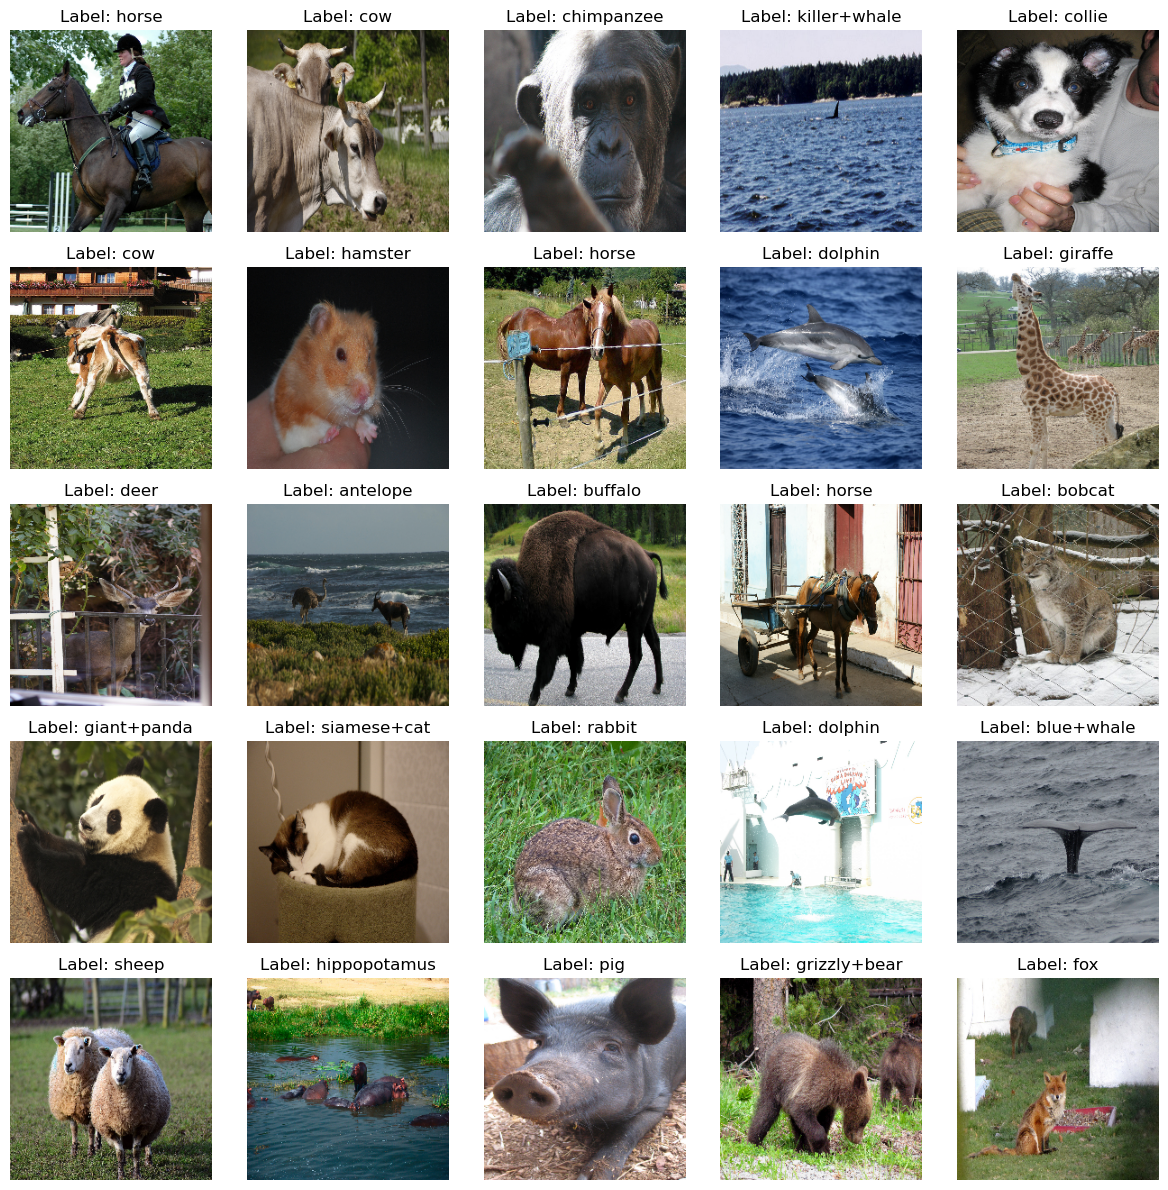

Animal Attributes Included - Binary Vector
Execution time: 679.2202084064484 seconds


In [6]:
Final_Images_df, predicate_df = ut.AWA2DataLoader(data_dir, data_type = "Images", 
                                                  Resnet101Type = None, 
                                                  animal_attributes = 'AwA2', 
                                                  VectorType = 'Binary')

#data_type options
#1. "ResNet101-Features" to load Extracted Resnet101 features Avg. Time - 12 secs
#2. "Images"

#Resnet101Type
# 1 - Using Resnet Features provided with data
# 2 - Using Resnet Features extracted by Abhimanyu Acharya using a pretrainied Resnet101

# animal_attribute
#1. "AwA2" - As provided with AwA2 data
#2. "Custom Animal Attribute KG" - Custom KGs
#3. "Custom KG Extended 01" - Custom KGs with ontology alignment
#3. "Custom KG Extended 02" - Custom KGs with ontology alignment + vector combination
#4. "Word2Vec" - word2vec-google-news-300
#4. "Word2Vec Extended" - Extended Word2Vec
#5. "Dbnary" - Dbnary Knowledge Graph/Wiktionary (KGVec2Go Wiktionary/DBnary)
#6. "DBpedia" - DBPedia Knowledge Graph (KGVec2Go Classic RDF2vec: 500 walks, depth: 4, SG, 200 dimensions)
#7. "WordNet" - WordNet Knowledge Graph (KGVec2Go WordNet)
#8. "Custom Animal Attribute KG Extended" - Extended Custom KGs

# 2 Define Attribute List

In [7]:
predicates = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicates.txt", sep = '\t',header = None, names = ['predicates'])
predicate_list = predicates['predicates'].tolist()
print(predicate_list)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


# 3. Split Data in Predefined Test, Train & Validation for ZSL

In [8]:
trainval_df, TrainData01, ValData01, TrainData02, ValData02, TrainData03, ValData03, Seen_test_df, Unseen_test_df = ut.TestTrainValsplitdata_dir(data_dir, Final_Images_df)

  Training - Validation Split 01 
 Train Classes  
 Number of Classes 27 
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 

 Validation Classes  
 Number of Classes 13 
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 

  Training - Validation Split 02 
 Train Classes  
 Number of Classes 27 
 ['buffalo' 'chimpanzee' 'collie' 'cow' 'deer' 'elephant' 'german+shepherd'
 'giant+panda' 'gorilla' 'hamster' 'hippopotamus' 'humpback+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'polar+bear' 'rabbit' 'raccoon'
 'rhinoceros' 'siamese+cat' 'spider+monkey' 'squirrel' 'tiger' 'weasel'
 'wolf'] 

 Validation Classes  
 Number of Classes 13 
 ['antelope' 'beaver' 'chihua

# 4. Define Dependent and Independent variables 

In [9]:
X1 = TrainData01.iloc[:,2:150530].values
X1 = X1.reshape(-1, 224, 224,3) #reshape back into an image
y1 = TrainData01.iloc[:,150531:150616]

# Pre defined Test split 02
X2 = TrainData02.iloc[:,2:150530].values
X2 = X2.reshape(-1, 224, 224,3) #reshae back into an image
y2 = TrainData02.iloc[:,150531:150616]

# Pre defined Test split 03
X3 = TrainData03.iloc[:,2:150530].values
X3 = X3.reshape(-1, 224, 224,3) #reshae back into an image
y3 = TrainData03.iloc[:,150531:150616]

X_finaltrain = trainval_df.iloc[:,2:150530].values
X_finaltrain = X_finaltrain.reshape(-1, 224, 224,3) #reshae back into an image
y_finaltrain = trainval_df.iloc[:,150531:150616]

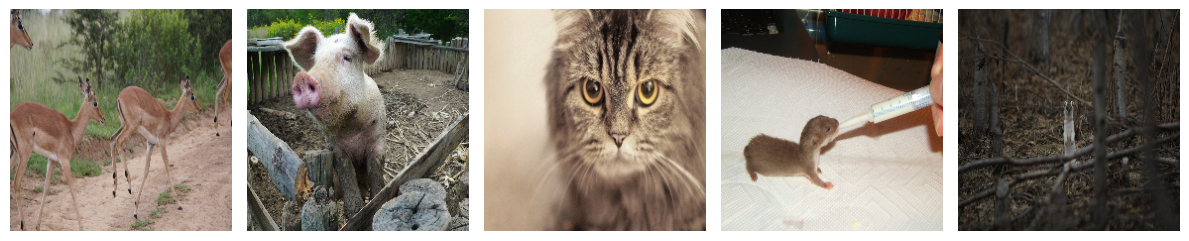

In [10]:
import random

#print 5 random images
randomimages = random.sample(list(X1), 5)

#show the images
fig, axes = plt.subplots(nrows= 1, ncols=5, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(5):
    ax[i].imshow(randomimages[i])
    ax[i].set_axis_off()     
fig.tight_layout()
plt.show() 

### 4.1 Split in test val sets for attribute prediction stage and to stratify y due to imbalanced data

In [11]:
from sklearn.model_selection import train_test_split

#Train val split for testing projection network
X_train1,X_val_seen_classes1,y_train1,y_val_seen_classes1 = train_test_split(X1,y1,stratify=y1,test_size=0.1,random_state = 0)

X_train2,X_val_seen_classes2,y_train2,y_val_seen_classes2 = train_test_split(X2,y2,stratify=y2,test_size=0.1,random_state = 0)

X_train3,X_val_seen_classes3,y_train3,y_val_seen_classes3 = train_test_split(X3,y3,stratify=y3,test_size=0.1,random_state = 0)

#Stratify Final train data 
X_train_final,X_val_seen_classes_final,y_train_final,y_val_seen_classes_final = train_test_split(X_finaltrain,y_finaltrain,stratify=y_finaltrain,test_size=0.002,random_state = 0)

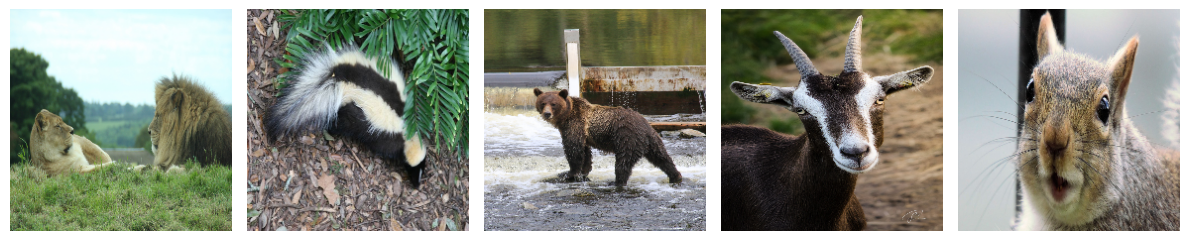

In [12]:
import random
randomimages = random.sample(list(X_train1), 5)

#show the images
fig, axes = plt.subplots(nrows= 1, ncols=5, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(5):
    ax[i].imshow(randomimages[i])
    ax[i].set_axis_off()     
fig.tight_layout()
plt.show()    

# 5. Load Resnet101 for Transfer learning

In [13]:
ResNet101_Model = resnet101(weights="IMAGENET1K_V1")

# 6. Prepare Data for Resnet101

In [32]:
#Adapted from various responses on Stackexchange and CV Lab 8
class dataTransform():
  def __init__(self, data, targets, transform=None):
    self.data = data
    self.targets = targets

    self.transform = transform

  def __getitem__(self,index):
    x = self.data[index]
    y = self.targets[index]

    if self.transform:
      x = self.transform(x)
    
    return x, y
  
  def __len__(self):
    return len(self.data)

data = X_train1
targets = np.array(y_train1).astype(np.float32).tolist()

transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = dataTransform(data, targets, transform=transform)
dataloader = DataLoader(train_dataset, batch_size=32)

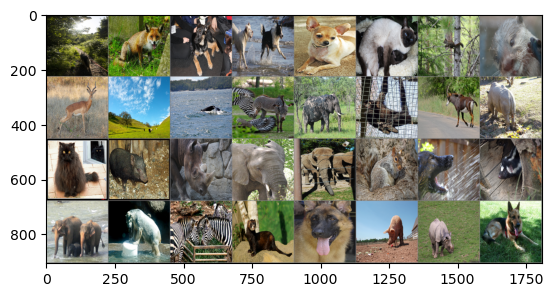

In [33]:
# function to show an image
#adapted from CV Lab 8
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize: back to range [0, 1] just for showing the images
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     # Reshape: C, H, W -> H, W, C
    plt.show()

# get some random training images
dataiter = iter(dataloader)
images, labels = dataiter.next()

# show images and print labels
imshow(torchvision.utils.make_grid(images[:,:,:]))
first_labels = [label for label in labels]
#print('Ground-truth:', first_labels)

In [34]:
from skorch.helper import SliceDataset
torch.manual_seed(0)
X1_train_tensor = np.array(SliceDataset(train_dataset, idx=0))  # idx=0 is the default
y1_train_tensor = np.array(SliceDataset(train_dataset, idx=1))

#X2_train_tensor = np.array(SliceDataset(train_dataset2, idx=0))  # idx=0 is the default
#y2_train_tensor = np.array(SliceDataset(train_dataset2, idx=1))

#X3_train_tensor = np.array(SliceDataset(train_dataset3, idx=0))  # idx=0 is the default
#y3_train_tensor = np.array(SliceDataset(train_dataset3, idx=1))

#Xfinal_train_tensor = np.array(SliceDataset(train_dataset_final, idx=0))  # idx=0 is the default
#yfinal_train_tensor = np.array(SliceDataset(train_dataset_final, idx=1))

# 7. Set up Neural Network for multilabel classifciation

In [35]:
# adapted from https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Transfer_Learning.ipynb#scrollTo=MbrJfENYFkPX

class PretrainedResNet101(nn.Module):
    def __init__(self):
        super().__init__()
        model = ResNet101_Model
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features,85) # Change the last fully connected layer
        self.model = model
                
    def forward(self, x):
        return self.model(x)

### 7.1 Define evaluation criterea and checkpoint for projection network

In [36]:
# Create Skorch EPOCHScoring   
train_macro_recall_score = EpochScoring(scoring='recall_macro', lower_is_better=False, name = 'train_recall_macro', on_train = True)
valid_macro_recall_score = EpochScoring(scoring='recall_macro', lower_is_better=False, name = 'valid_recall_macro', on_train = False)

# Create Checkpoint
#CP1 = Checkpoint(monitor='valid_loss_best',dirname='exp1_e2e')
#CP2 = Checkpoint(monitor='valid_loss_best',dirname='exp2_e2e')
#CP3= Checkpoint(monitor='valid_loss_best',dirname='exp3_e2e')
CP_final= Checkpoint(monitor='valid_loss_best',dirname='exp_final_e2e')

### 7.2 Check GPU usage

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
torch.cuda.empty_cache()
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

#print(torch.cuda.memory_summary(device=None, abbreviated=False))

Using device: cuda
NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.3 GB
Cached:    0.5 GB


### 7.2 Define SKORCH model parameters for Train Model 01

In [38]:
# adapted from #https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Transfer_Learning.ipynb#scrollTo=OSH6C5hjyIIn

from skorch import NeuralNetClassifier
#torch.manual_seed(0)
CNN_Resnet101_model = NeuralNetClassifier(
    PretrainedResNet101,
    #iterator_train__shuffle=True,
    batch_size=8,
    max_epochs=5,
    lr=0.1,
    criterion = torch.nn.modules.loss.BCEWithLogitsLoss, 
    optimizer=torch.optim.SGD,    
    #optimizer__momentum = 0.98,
    #optimizer__weight_decay = 0.005,
    train_split = ValidSplit(5),
    callbacks=[CP_final, train_macro_recall_score, valid_macro_recall_score],
    callbacks__valid_acc=None,
    device='cuda'
)

In [39]:
torch.manual_seed(0)
CNN_Resnet101_model.fit(X1_train_tensor,y1_train_tensor)

  epoch    train_loss    train_recall_macro    valid_loss    valid_recall_macro    cp       dur
-------  ------------  --------------------  ------------  --------------------  ----  --------
      1        0.2370                0.6876        0.0833                0.8930     +  227.8049
      2        0.1042                0.8782        0.0578                0.9268     +  208.2657
      3        0.0565                0.9324        0.0582                0.9323        203.6280
      4        0.0370                0.9521        0.0818                0.9188        195.4802
      5        0.0311                0.9576        0.0590                0.9327        210.0481


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=PretrainedResNet101(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tru

In [40]:
CNN_Resnet101_model.load_params(checkpoint=CP_final)

### 7.3 Plot Training and Validation Error

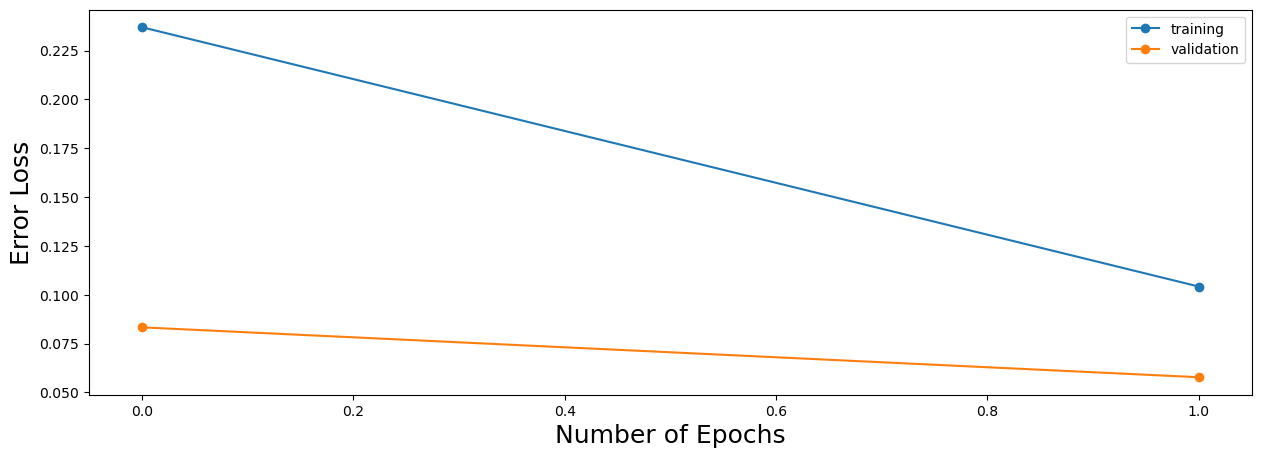

In [41]:
valid_loss = CNN_Resnet101_model.history[:, 'valid_loss']
train_loss = CNN_Resnet101_model.history[:, 'train_loss']

plt.figure(figsize=(15,5))
plt.plot(train_loss, 'o-', label='training')
plt.plot(valid_loss, 'o-', label='validation')
plt.xlabel('Number of Epochs', fontsize=18)
plt.ylabel('Error Loss', fontsize=18)
plt.legend()
plt.show()

### 7.4 Predict attributes for seen classes validation data

In [42]:
data = X_val_seen_classes1
targets = np.array(y_val_seen_classes1).astype(np.float32).tolist()

val_dataset = dataTransform(data, targets, transform=transform)
X_val_tensor = np.array(SliceDataset(val_dataset, idx=0))  # idx=0 is the default

In [43]:
predicted_attributes_seen_val_01 = CNN_Resnet101_model.predict(X_val_tensor)

### 7.5 Assess NNs ability to predict class attributes

In [44]:
print(classification_report(y_val_seen_classes1.astype(np.float32).values, predicted_attributes_seen_val_01, target_names=predicate_list))

              precision    recall  f1-score   support

       black       0.96      0.96      0.96       882
       white       0.93      0.95      0.94       678
        blue       0.88      0.88      0.88       117
       brown       0.97      0.99      0.98       950
        gray       0.95      0.97      0.96       739
      orange       0.98      0.97      0.98       124
         red       0.96      0.91      0.93        54
      yellow       0.98      0.99      0.98        82
     patches       0.92      0.92      0.92       390
       spots       0.91      0.91      0.91       187
     stripes       1.00      0.98      0.99       180
       furry       0.99      1.00      1.00      1288
    hairless       0.98      0.98      0.98       331
   toughskin       0.99      0.97      0.98       826
         big       0.99      0.98      0.98      1188
       small       0.94      0.98      0.96       512
     bulbous       0.98      0.95      0.97       863
        lean       0.96    

# 8. Perform Conventional ZSL

### 8.1 Predict class attributes for  Validation Data 01 - UnSeen Classes

In [67]:
data = ValData01.iloc[:,2:150530].values.reshape(-1,224,224,3)
targets = ValData01.iloc[:,150531:150616].astype(np.float32).values

val_unseen_dataset = dataTransform(data, targets, transform=transform)
Val_unseen_tensor = np.array(SliceDataset(val_unseen_dataset, idx=0))  # idx=0 is the default

In [68]:
y_pred_val_unseen_01 = CNN_Resnet101_model.predict(Val_unseen_tensor)

### 8.2 Assign class label by measuring distance between predicted attribute vectors and true attribute vectors


### 8.3 Limit dataset to unseen validation classes

In [78]:
 #limit search space to unseen classes 
predicatedf_CZSL = predicate_df[predicate_df['classes'].isin((ValData01.classes.unique()).tolist())]
animal_attributes = np.array(predicatedf_CZSL.iloc[:,2:87])
animal_attributes_labels = predicatedf_CZSL['labels'].unique()
print('Unseen Class Labels')
print(animal_attributes_labels)

Unseen Class Labels
[ 4  5 12 15 16 20 21 25 26 29 39 40 48]


### 8.4 Calculate distance between predicted attributes and unseen class attributes to assign class

In [79]:
 #assign classes to unseen data by assigning label from closest class using Cosing Distance
dist_CZSL = 1-distance.cdist(y_pred_val_unseen_01, animal_attributes, 'cosine')
CZSL_label_prediction = np.array([np.argmax(output) for output in dist_CZSL])

### 8.5 Update predicted labels to match dataset

In [80]:
CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
  , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
  , CZSL_label_prediction == 8, CZSL_label_prediction == 9, CZSL_label_prediction == 10, CZSL_label_prediction == 11
  , CZSL_label_prediction == 12], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
  , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
  , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]
  , animal_attributes_labels[10], animal_attributes_labels[11], animal_attributes_labels[12]], CZSL_label_prediction)

# 9. ZSL class prediction on UnSeen validation data 01

In [81]:
class_labels = ValData01[['labels','classes', 'order', 'family']]
class_labels.sort_values(by=['labels'], inplace=True)
animal_classes = class_labels['classes'].unique()

In [82]:
print(classification_report(ValData01['labels'], CZSL_label_prediction, target_names=animal_classes))

              precision    recall  f1-score   support

      beaver       0.69      0.53      0.60       152
   dalmatian       0.48      0.61      0.54       442
        mole       0.02      0.17      0.03        75
     leopard       0.48      0.79      0.60       568
       moose       0.53      0.32      0.40       554
     gorilla       0.43      0.10      0.16       709
          ox       0.52      0.90      0.66       588
  chimpanzee       0.38      0.58      0.46       566
     hamster       0.65      0.72      0.68       640
      rabbit       0.45      0.04      0.07       877
 giant+panda       0.23      0.01      0.02       692
        deer       0.79      0.80      0.80      1069
     raccoon       0.24      0.43      0.31       408

    accuracy                           0.47      7340
   macro avg       0.45      0.46      0.41      7340
weighted avg       0.50      0.47      0.43      7340



Top_1_accuracy for UnSeen Validation split 01 per class -  [0.52631579 0.60859729 0.17333333 0.79225352 0.32129964 0.09873061
 0.8962585  0.58303887 0.7171875  0.03990878 0.00867052 0.80074836
 0.43137255]
Top_1_accuracy for UnSeen Validation split 01 -  0.4613627122520449


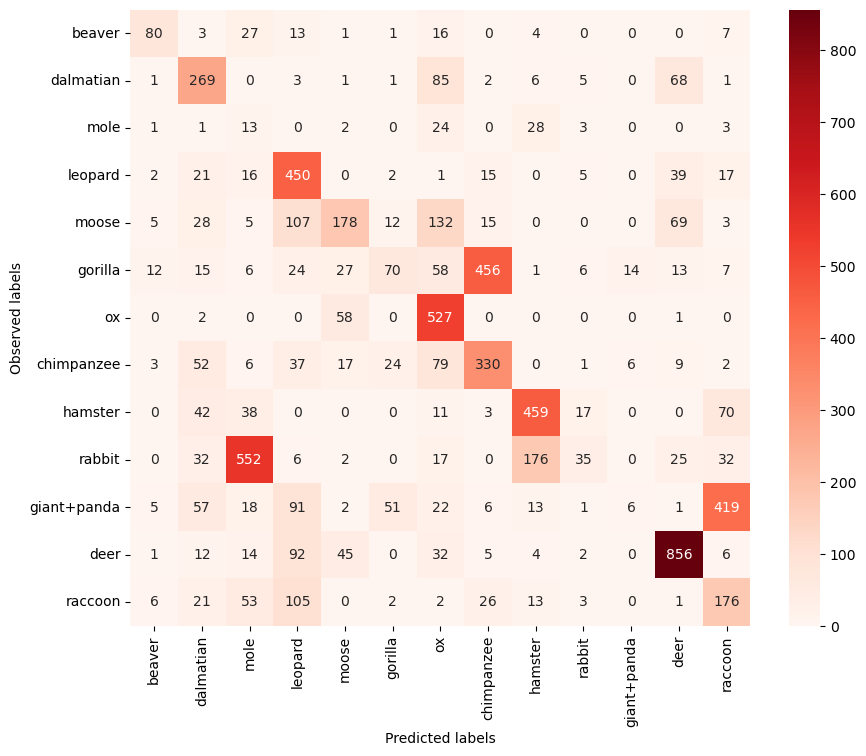

In [87]:
cm = confusion_matrix(ValData01['labels'], CZSL_label_prediction)
correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

# Visualize it as a heatmap
plt.figure(figsize=(10,8))
a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
label_font = {'size':'10'}  # Adjust to fit
a.set_xlabel('Predicted labels', fontdict=label_font);
a.set_ylabel('Observed labels', fontdict=label_font);
a.set_yticklabels(animal_classes)
a.set_xticklabels(animal_classes)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [52]:
def CZSL(mode, split,epochs, bs, lr, optimiser, device, checkpoint, pred_type, dist_type):
    torch.manual_seed(0)    
    
    data = X_train1
    targets = np.array(y_train1).astype(np.float32).tolist()
        
    if mode == "Train":
        if split == 1:
            data = X_train1
            targets = np.array(y_train1).astype(np.float32).tolist()
            SeenClassFeatures = X_val_seen_classes1
            SeenClassAttributes = y_val_seen_classes1
            UnseenData = ValData01                       
                       
        if split == 2:
            data = X_train2
            targets = np.array(y_train2).astype(np.float32).tolist()
            SeenClassFeatures = X_val_seen_classes2
            SeenClassAttributes = y_val_seen_classes2
            UnseenData = ValData02
            
        if split == 3:
            data = X_train3
            targets = np.array(y_train3).astype(np.float32).tolist()
            SeenClassFeatures = X_val_seen_classes3
            SeenClassAttributes = y_val_seen_classes3
            UnseenData = ValData03
       
        
    if mode == "Test":
        data = X_train1
        targets = np.array(y_train1).astype(np.float32).tolist()  
        UnseenData = Unseen_test_df
        
    transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    train_dataset = dataTransform(data, targets, transform=transform)
    dataloader = DataLoader(train_dataset, batch_size=32)
    X_tensor = np.array(SliceDataset(train_dataset, idx=0))  # idx=0 is the default
    y_tensor = np.array(SliceDataset(train_dataset, idx=1))
    
    #Model 01   
    # adapted from #https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Transfer_Learning.ipynb#scrollTo=OSH6C5hjyIIn
   
    #torch.manual_seed(0)
    CNN_Resnet101_model = NeuralNetClassifier(
    PretrainedResNet101,
    #iterator_train__shuffle=True,
    batch_size=bs,
    max_epochs=epochs,
    lr=lr,
    criterion = torch.nn.modules.loss.BCEWithLogitsLoss, 
    optimizer=torch.optim.SGD,  
    train_split = ValidSplit(5),
    callbacks=[train_macro_recall_score, valid_macro_recall_score, checkpoint],
    callbacks__valid_acc=None,
    device=device)
    
    #Train three models of three Train Val spilts
    print('Training DNN')
    st = time.time()   
    CNN_Resnet101_model.fit(X1_train_tensor,y1_train_tensor)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    
    #Plot training val curves
    print('Training Validation Loss Curve')
    train_loss = CNN_Resnet101_model.history[:, 'train_loss']
    valid_loss = CNN_Resnet101_model.history[:, 'valid_loss']
    plt.figure(figsize=(10,5))
    plt.plot(train_loss, 'o-', label='training')
    plt.plot(valid_loss, 'o-', label='validation')
    plt.xlabel('Number of Epochs', fontsize=10)
    plt.ylabel('Error Loss', fontsize=10)
    plt.legend()
    plt.show() 
    
    print('Trianing Recall Macro Curve')
    train_loss = CNN_Resnet101_model.history[:, 'train_recall_macro']
    valid_loss = CNN_Resnet101_model.history[:, 'valid_recall_macro']
    plt.figure(figsize=(10,5))
    plt.plot(train_loss, 'o-', label='training')
    plt.plot(valid_loss, 'o-', label='validation')
    plt.xlabel('Number of Epochs', fontsize=10)
    plt.ylabel('F1 Score (Macro)', fontsize=10)
    plt.legend()
    plt.show() 
    
    #load best model weights
    CNN_Resnet101_model.load_params(checkpoint=checkpoint)
        
       
    #predict attributes for Unseen classes 
    y_pred_unseen = CNN_Resnet101_model.predict(UnseenData.iloc[:,1:2049].astype(np.float32).values)
    y_pred_unseen_proba = CNN_Resnet101_model.predict_proba(UnseenData.iloc[:,1:2049].astype(np.float32).values)
    
    #limit search space to unseen classes 
    predicatedf_CZSL = predicate_df[predicate_df['classes'].isin((UnseenData.classes.unique()).tolist())]
    animal_attributes = np.array(predicatedf_CZSL.iloc[:,2:87])
    animal_attributes_labels = predicatedf_CZSL['labels'].unique()
    print('Unseen Class Labels')
    print(animal_attributes_labels)    
       
    #assign classes to unseen data by assigning label from closest class using Cosing Distance
    y_pred_unseenprob = []
    for y in y_pred_unseen_proba:
        y_pred_unseenprob.append(y[1])
      
    if pred_type == 'Probabilistic':
        dist_CZSL= (1-distance.cdist(y_pred_unseenprob, animal_attributes, dist_type))
    elif pred_type == 'Deterministic':    
        dist_CZSL= (1-distance.cdist(y_pred_unseen, animal_attributes, dist_type))
        
    CZSL_label_prediction = np.array([np.argmax(output) for output in dist_CZSL])
    
    #replace predicted labels with unseen class labels 
    if mode == "Train":
        CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
          , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
          , CZSL_label_prediction == 8, CZSL_label_prediction == 9, CZSL_label_prediction == 10, CZSL_label_prediction == 11
          , CZSL_label_prediction == 12], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
          , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
          , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]
          , animal_attributes_labels[10], animal_attributes_labels[11], animal_attributes_labels[12]], CZSL_label_prediction)
    
    if mode == "Test":
        CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
          , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
          , CZSL_label_prediction == 8, CZSL_label_prediction == 9], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
          , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
          , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]], CZSL_label_prediction)
        
    #sort class names 
    class_labels = UnseenData[['labels','classes', 'order', 'family']]
    class_labels.sort_values(by=['labels'], inplace=True)
    animal_classes = class_labels['classes'].unique()
    
    #Assess CZSL Model performance
    print(classification_report(UnseenData['labels'], CZSL_label_prediction, target_names = animal_classes))

    cm = confusion_matrix(UnseenData['labels'], CZSL_label_prediction)
    correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
    print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
    print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

    # Visualize it as a heatmap
    plt.figure(figsize=(10,8))
    a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
    label_font = {'size':'10'}  # Adjust to fit
    a.set_xlabel('Predicted labels', fontdict=label_font);
    a.set_ylabel('Observed labels', fontdict=label_font);
    a.set_yticklabels(animal_classes)
    a.set_xticklabels(animal_classes)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()
    
    #predict taxonomy
    predicted_taxonomy_df = pd.DataFrame(CZSL_label_prediction, columns = ['pred_labels'])
    predicted_taxonomy_df = pd.merge(predicted_taxonomy_df, taxonomy_df,  how = 'left', left_on = 'pred_labels' , right_on = 'animal_label' )
    
    Train_family_labels = UnseenData.copy()
    Train_family_labels.sort_values(by=['order'], inplace=True)
    train_animal_family = Train_family_labels['order'].unique()
    
    print(classification_report(UnseenData['order'], predicted_taxonomy_df['order'], target_names=train_animal_family))
    
    cm = confusion_matrix(UnseenData['order'], predicted_taxonomy_df['order'])
    correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
    print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
    print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

    # Visualize it as a heatmap
    plt.figure(figsize=(10,8))
    a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
    label_font = {'size':'10'}  # Adjust to fit
    a.set_xlabel('Predicted labels', fontdict=label_font);
    a.set_ylabel('Observed labels', fontdict=label_font);
    a.set_yticklabels(train_animal_family)
    a.set_xticklabels(train_animal_family)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()
    
    if mode == "Train":
        ce.per_class_top_k_accuracy_score(dist_CZSL, animal_attributes_labels, UnseenData, animal_classes, Train = True)
    if mode == "Test":
        ce.per_class_top_k_accuracy_score(dist_CZSL, animal_attributes_labels, UnseenData, animal_classes, Train = False)
        
    return dist_CZSL, animal_attributes_labels, animal_classes    

In [ ]:
Train01 = CZSL(mode = "Test", 
               split = 1, 
               epochs = 5, 
               bs = 16,                
               lr = 0.1, 
               optimiser = nn.Sigmoid(),
               device = 'cuda', 
               checkpoint = CP_final, 
               pred_type = 'Probabilistic', 
               dist_type = 'cosine')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 3

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

Training DNN
  epoch    train_loss    train_recall_macro    valid_loss    valid_recall_macro    cp       dur
-------  ------------  --------------------  ------------  --------------------  ----  --------
      1        0.0469                0.9703        0.0431                0.9437     +  356.3281
